In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys, time
from skimage import filters

In [2]:
def verify(inp, s, flag):
    if flag:
        tmp = inp==s
        return (s==-1).sum() + (tmp==1).sum() == 9
    for i in range(3):
        for j in range(3):
            if s[i,j] == -1:
                continue
            elif s[i,j] != inp[i,j]:
                return 0
    return 1
    

def apply_filter(img, s, flag=0):
    h, w = img.shape
    copy = img.copy()
    for i in range(1,h-1):
        for j in range(1,w-1):
            mat = img[i-1:i+2, j-1: j+2]
            if verify(mat, s, flag) == 1:
                copy[i,j] = 0
    return copy
                

In [3]:
def skeletonize(input_img, showIters = False):
    s1 = np.array([[0,0,0],[-1,1,-1],[1,1,1]])
    s2 = np.array([[-1,0,0],[1,1,0],[-1,1,-1]])
    inp = input_img.copy()
    
    while 1:
        prev_img = inp.copy()
        inp = apply_filter(inp, s1)
        inp = apply_filter(inp, s2)
        inp = apply_filter(inp, np.rot90(s1, 1))
        inp = apply_filter(inp, np.rot90(s2, 1))
        inp = apply_filter(inp, np.rot90(s1, 2))
        inp = apply_filter(inp, np.rot90(s2, 2))
        inp = apply_filter(inp, np.rot90(s1, 3))
        inp = apply_filter(inp, np.rot90(s2, 3))
        if showIters == True:
            plt.figure(figsize = (20,10))
            plt.imshow(inp, cmap = cm.gray)
            plt.show()
            
        if np.sum(np.abs(inp - prev_img)) == 0:
            break
            
    return inp

In [4]:
def display(inp,  out):
    fig = plt.figure(figsize=(20,10))
    plt.subplot(121)
    plt.axis('off')
    plt.imshow(inp, cmap = cm.gray)
    plt.title('Original Image');

    plt.subplot(122)
    plt.axis('off')
    plt.imshow(out, cmap = cm.gray)
    plt.title('Final Image');


### Part 1

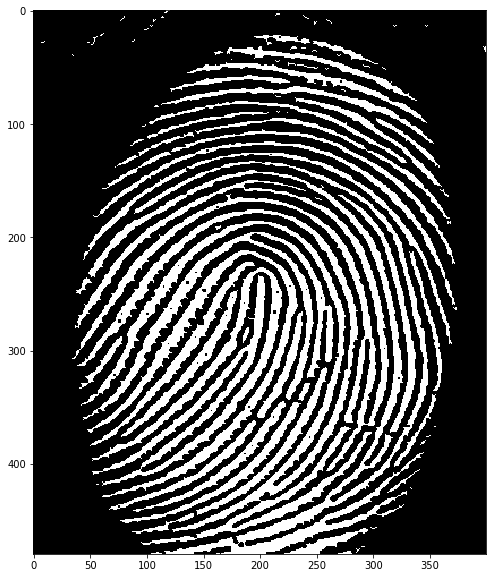

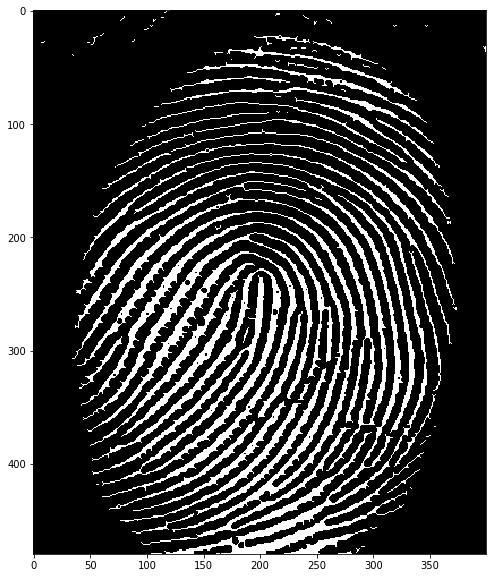

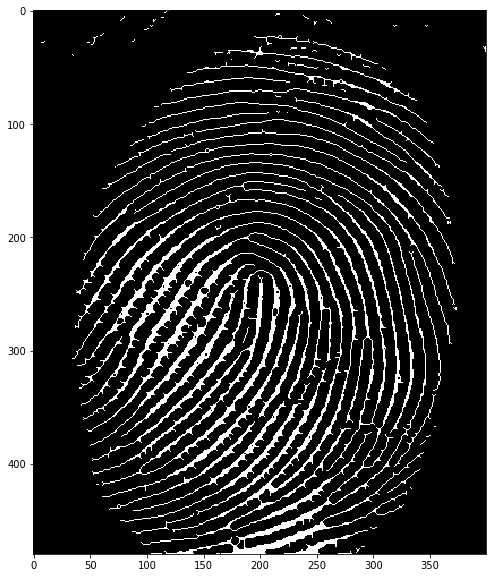

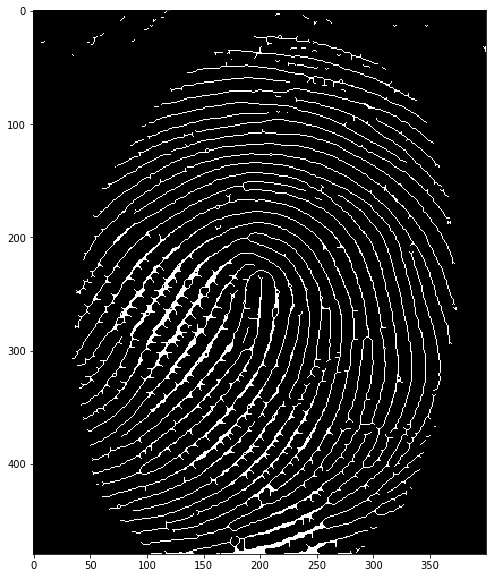

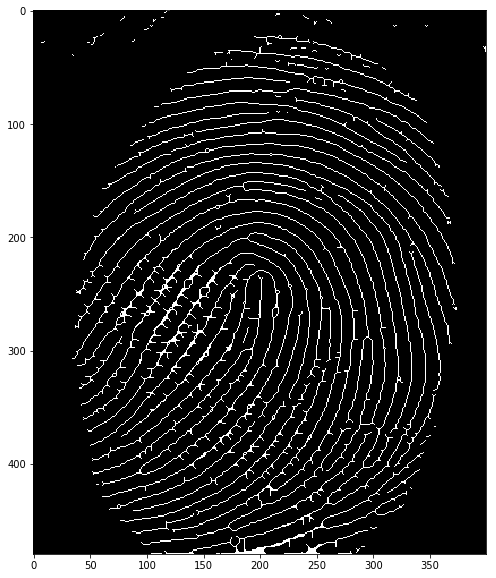

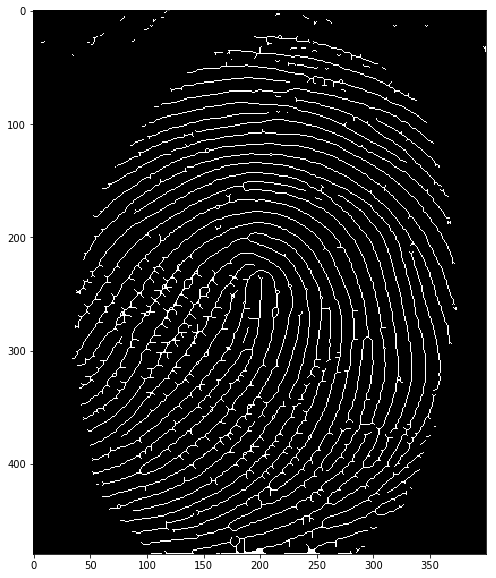

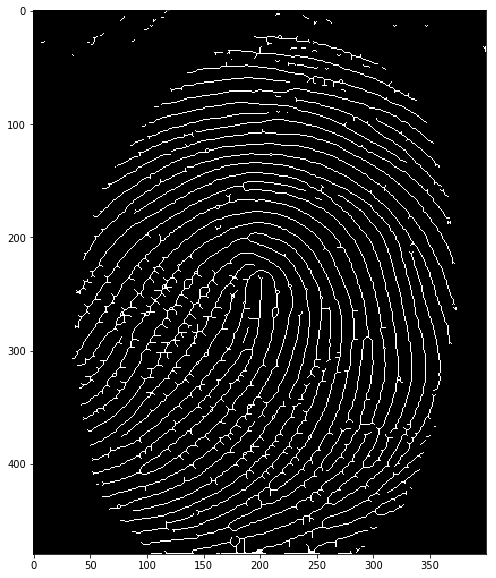

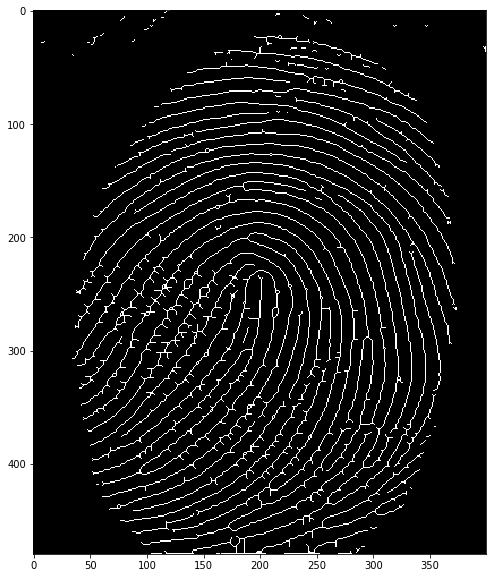

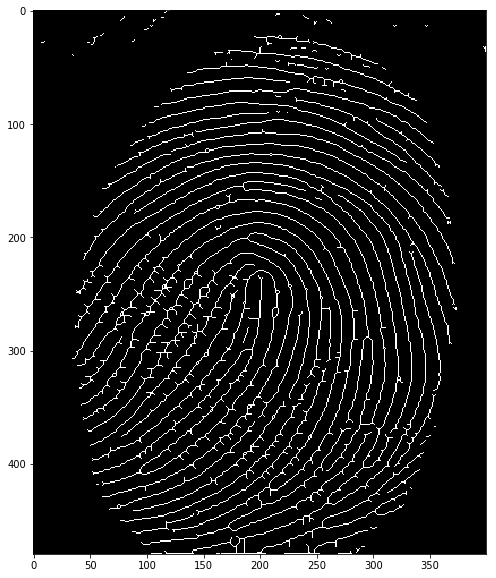

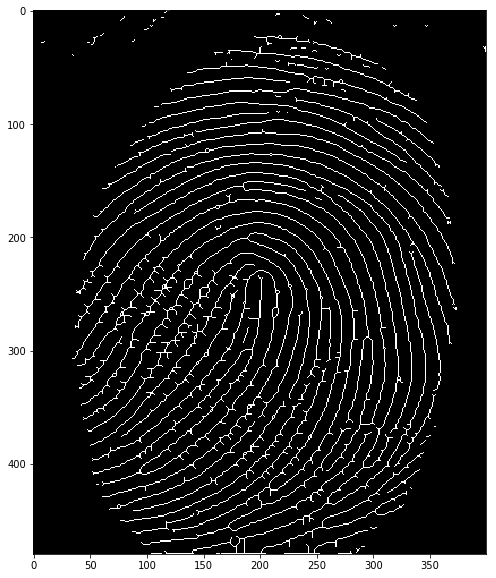

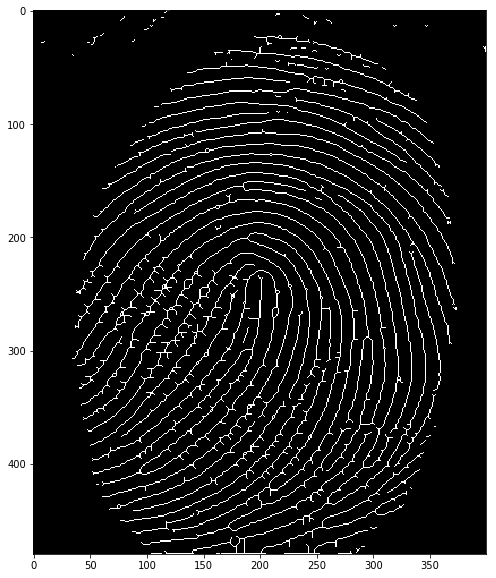

37.747313022613525


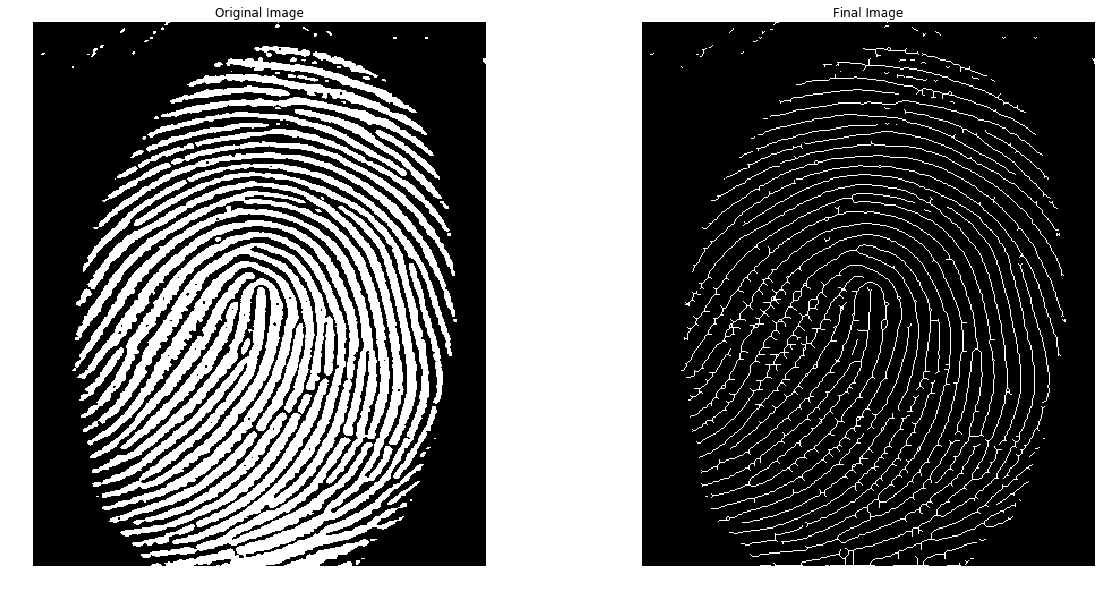

In [5]:
inp = cv2.imread("images/fp.jpg", 0)
i, ret = cv2.threshold(inp,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

ret = 255 - ret
ret = np.uint8(ret/255)
t = time.time()
out = skeletonize(ret, True)
print (time.time()-t)
display(ret, out)

### Part 2

Role Of Structuring Elements
- S1 : It detects horizontal edges on top sides of the object
- S2 : It detects top-right corners of the object

The further rotations help in finding all solid boundary in given R2 space.

### Part 3
Multiple passes are required to have thinner skeletons which would be able to represent the structure better as each pass makes the skeleton thinner.

Each skeletonization pass makes the output thinner only by a small extent i.e. only removing some edge and corner pixels at a time.

As the skeleton is the thinnest structure possible, multiple iterations are required to get the best possible outcome.



### Part 4

In [6]:
# solid = cv2.imread("images/1_1.png",0)
# i,ret = cv2.threshold(solid,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# # ret = 255 - ret
# ret = np.uint8(ret/255)
# out = skeletonize(ret, True)
# display(ret, out)

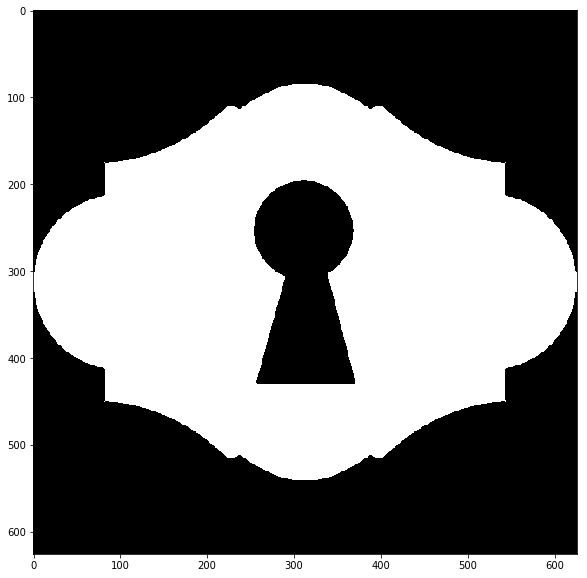

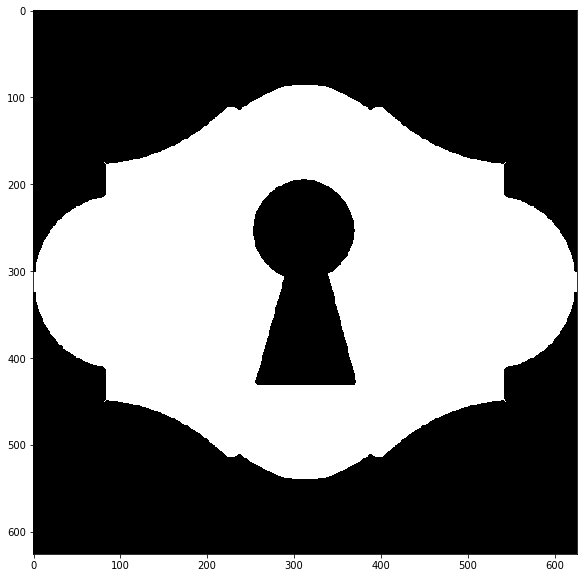

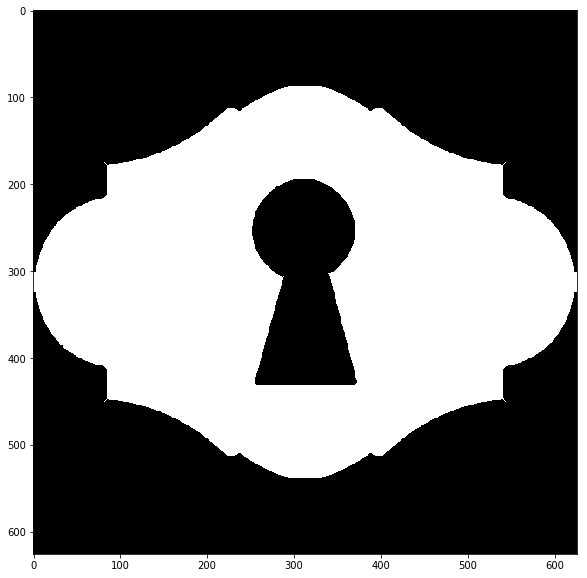

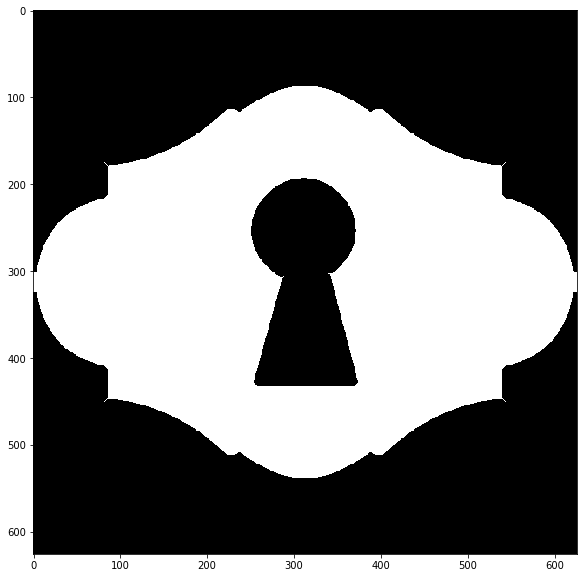

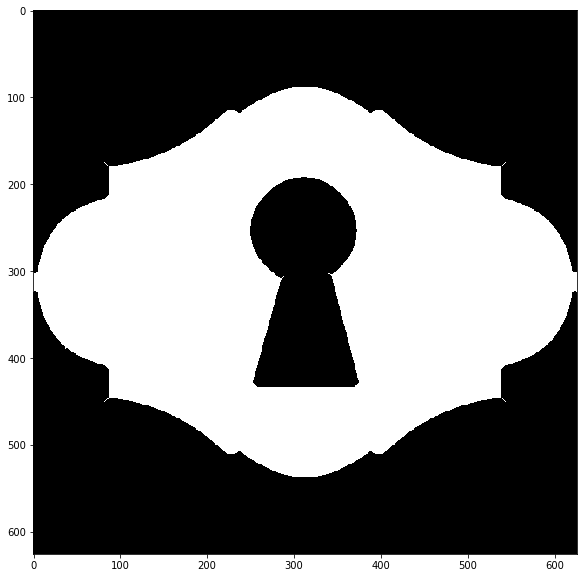

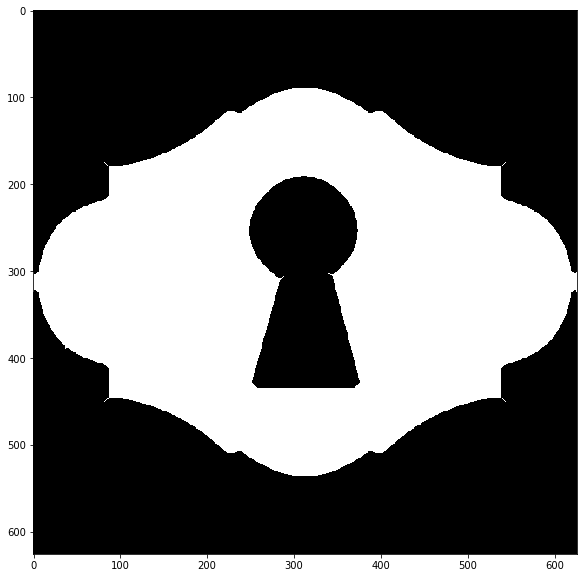

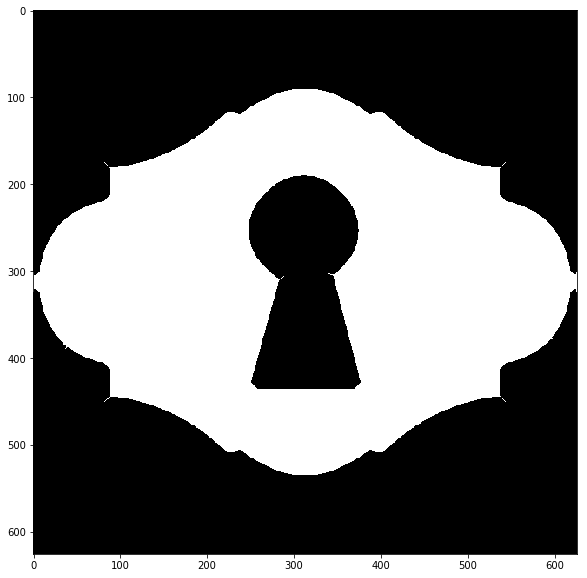

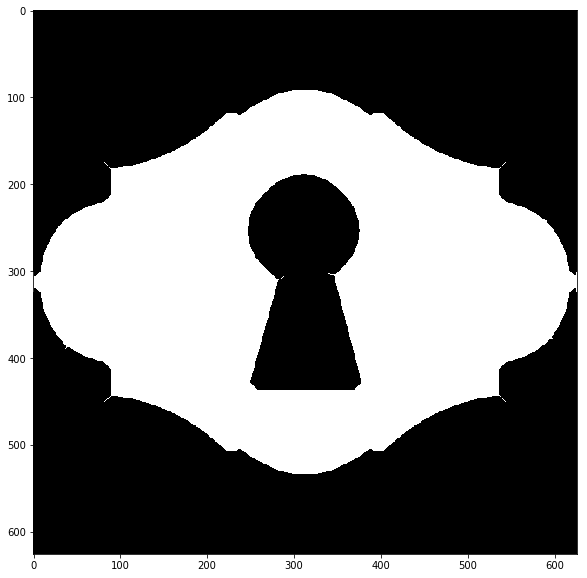

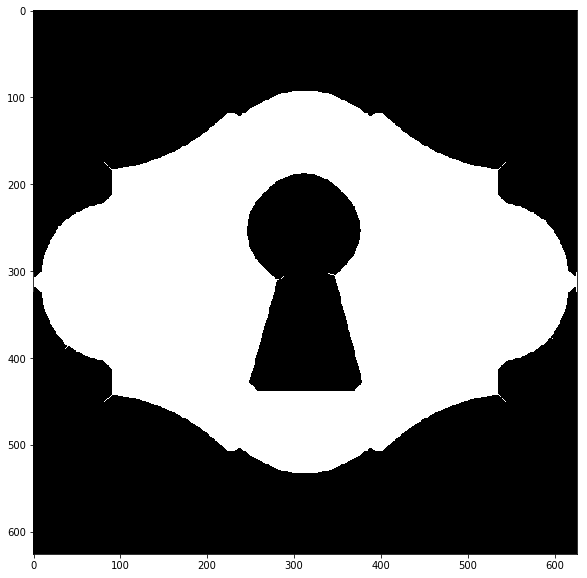

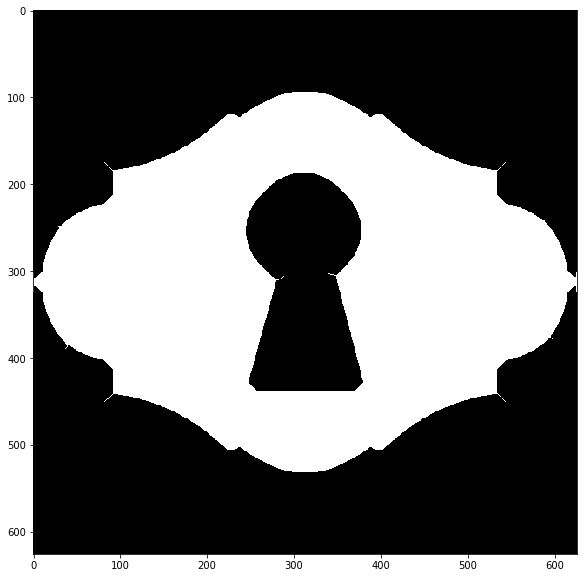

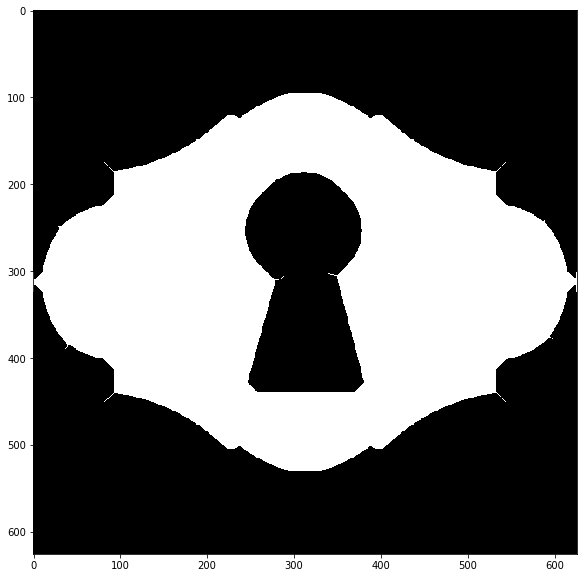

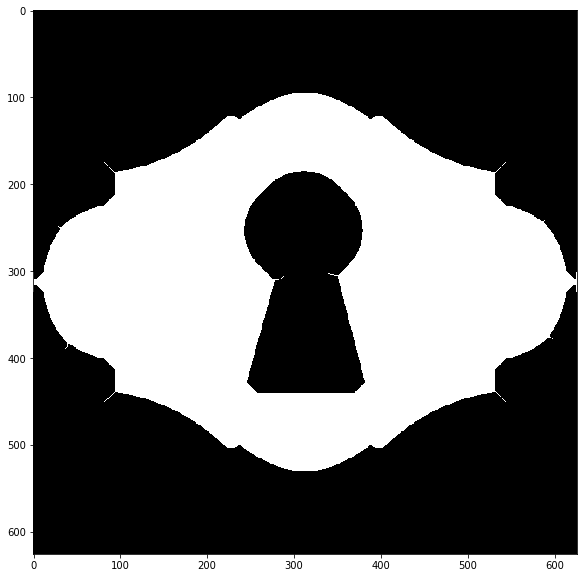

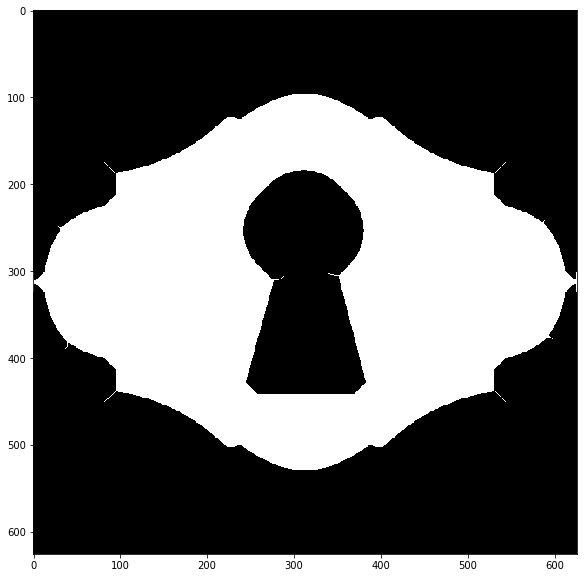

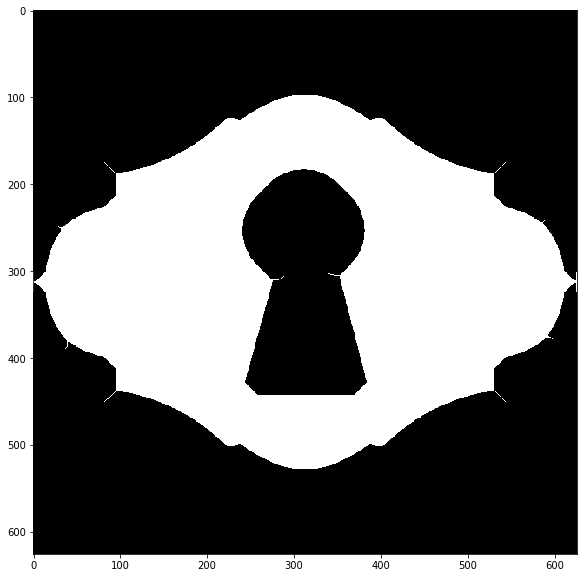

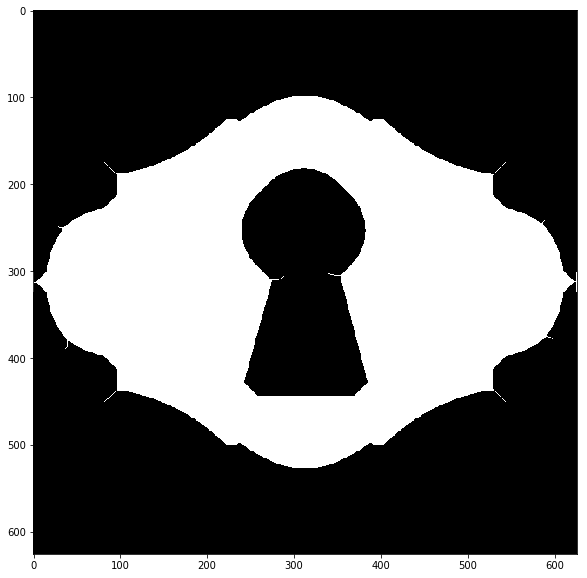

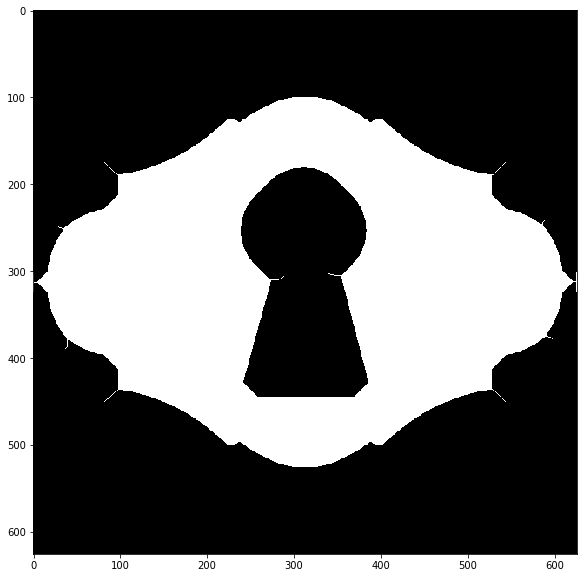

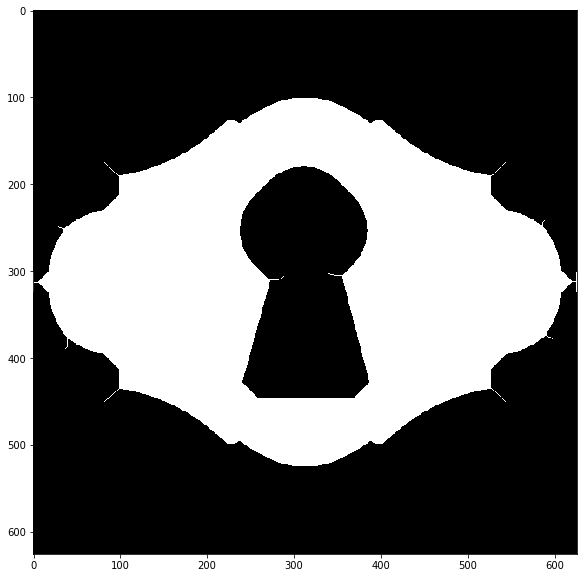

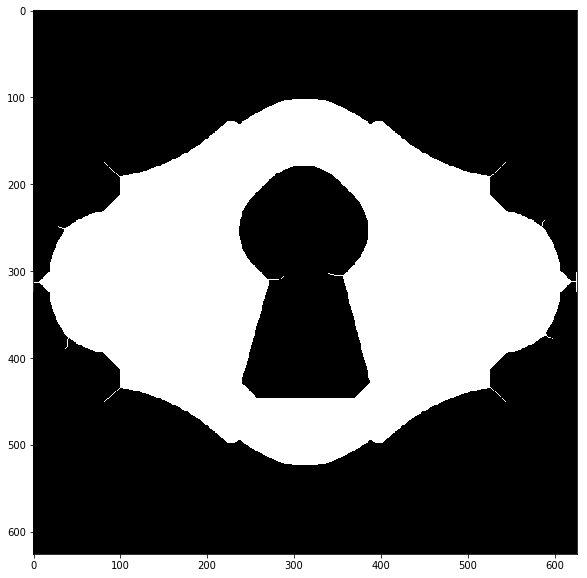

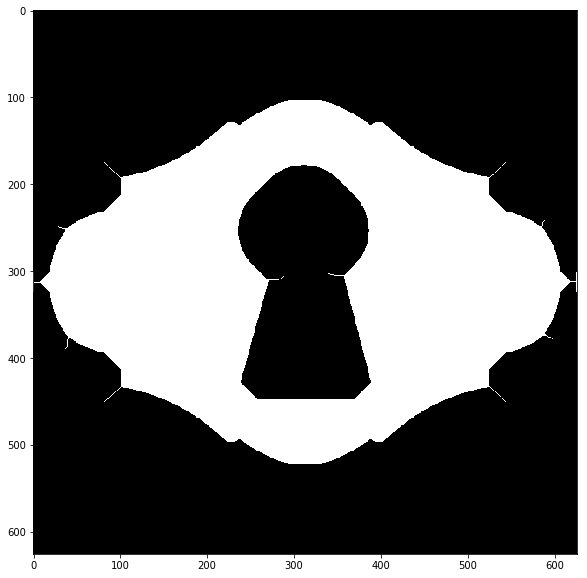

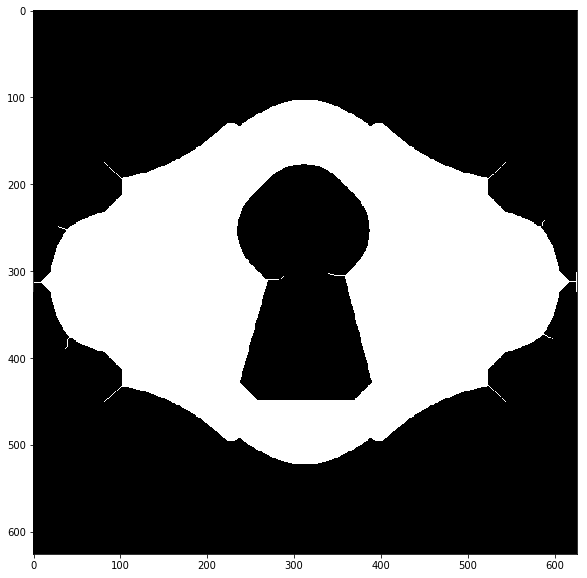

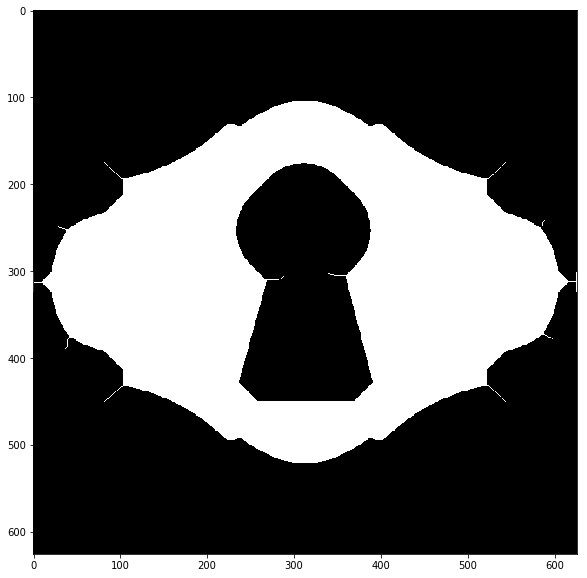

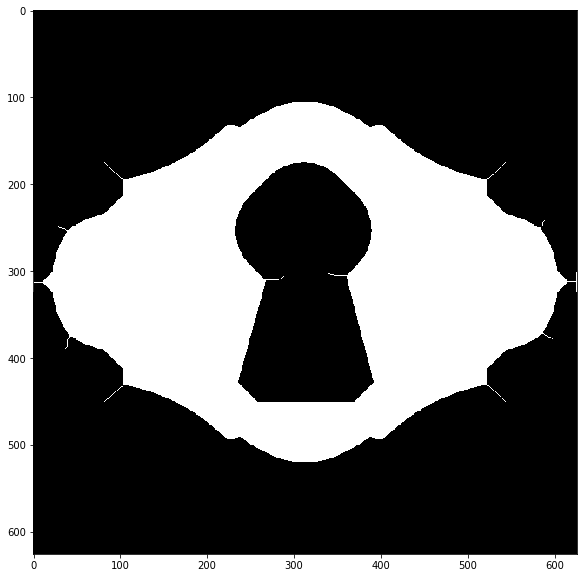

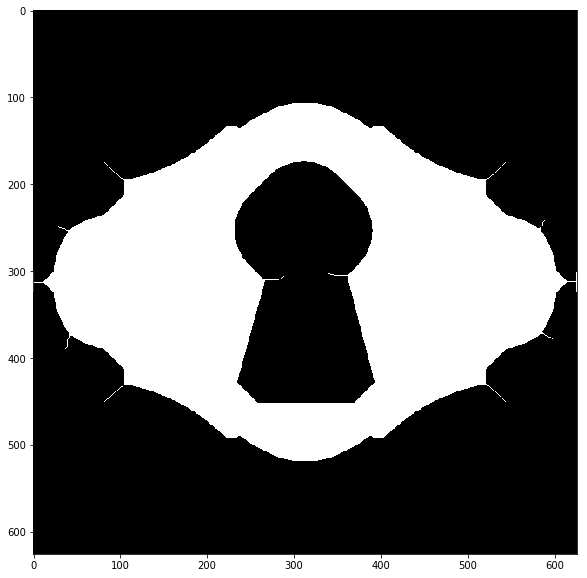

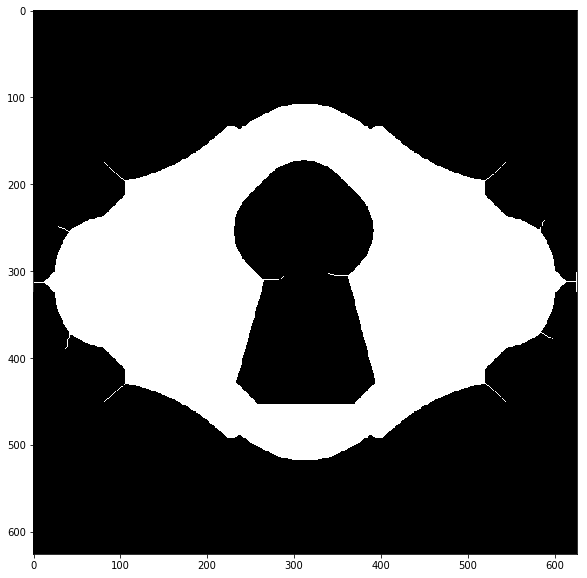

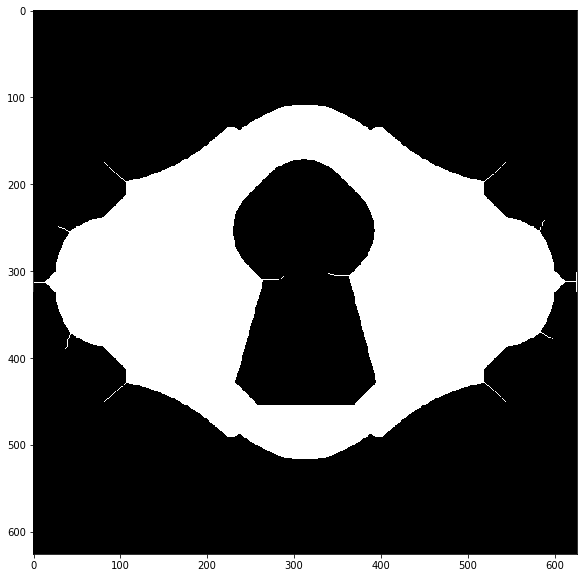

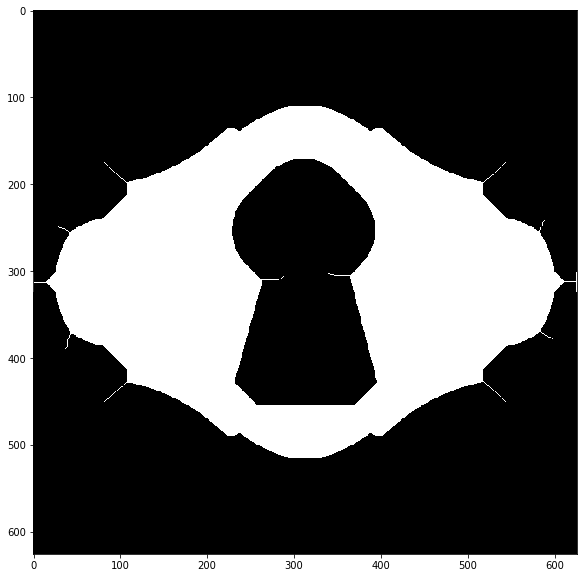

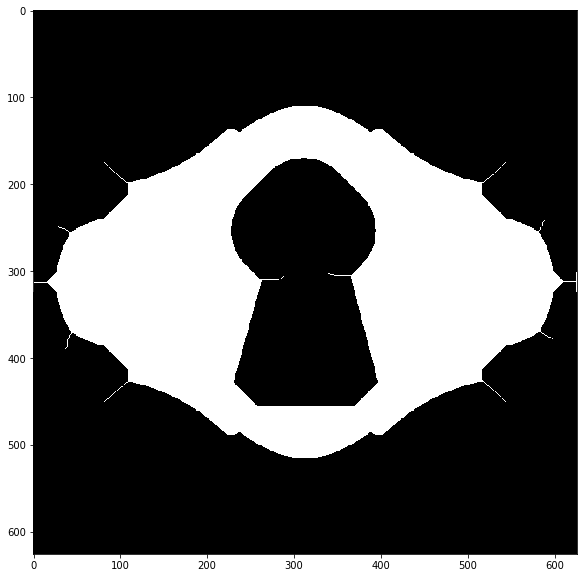

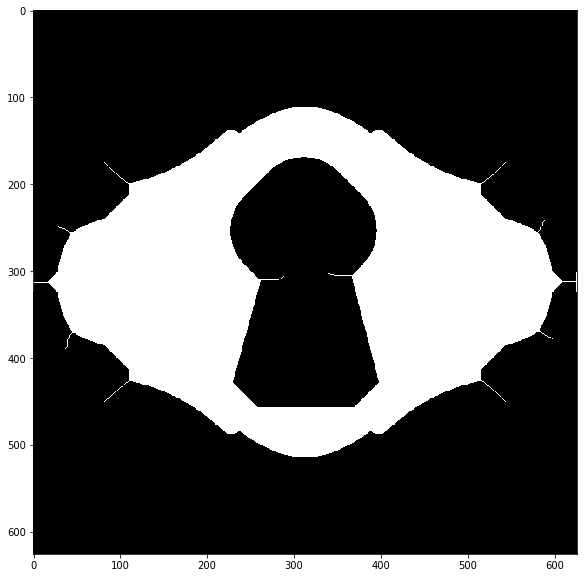

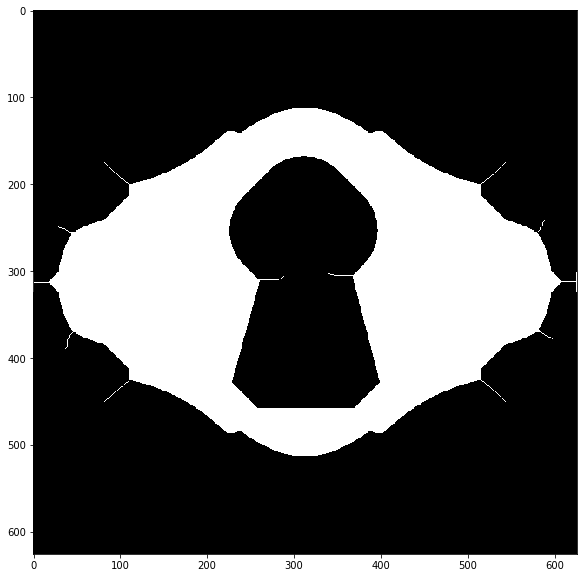

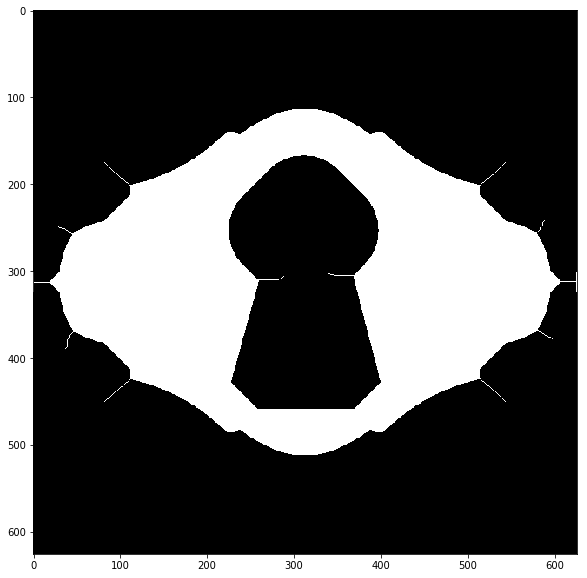

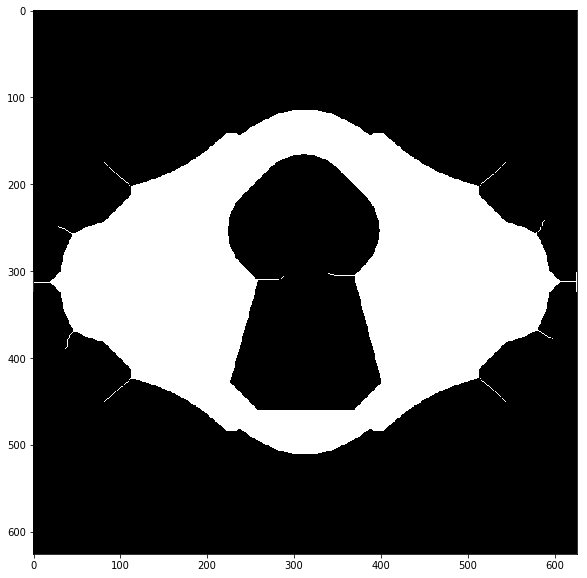

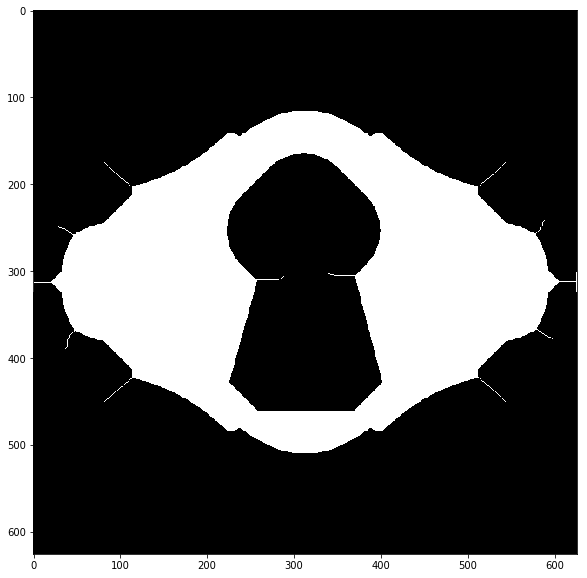

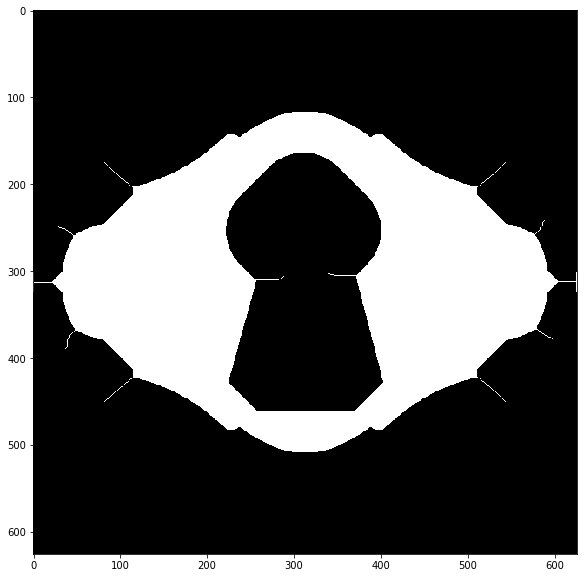

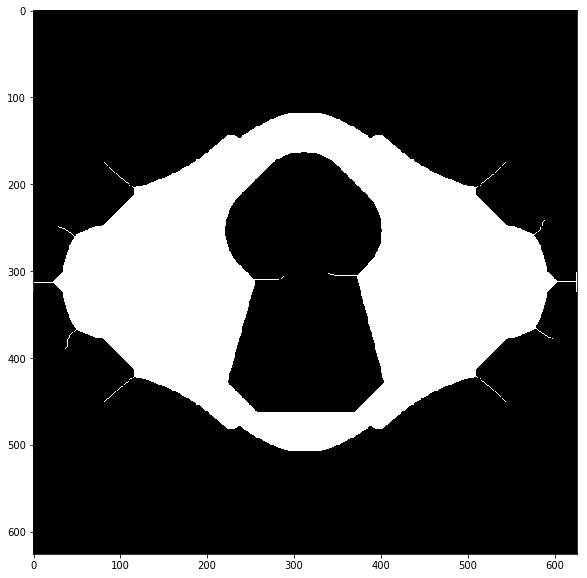

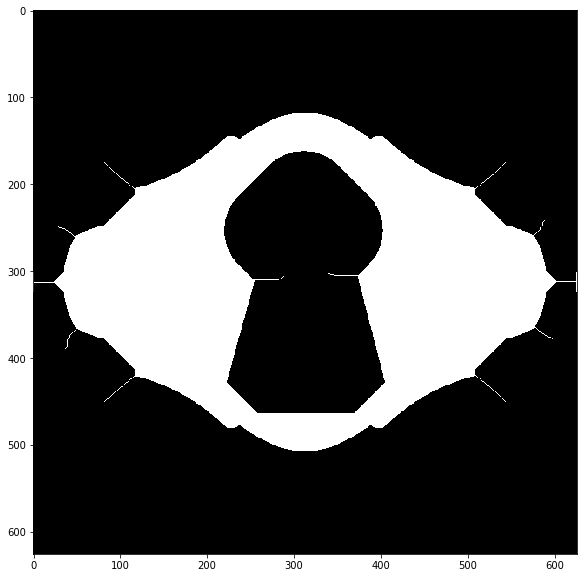

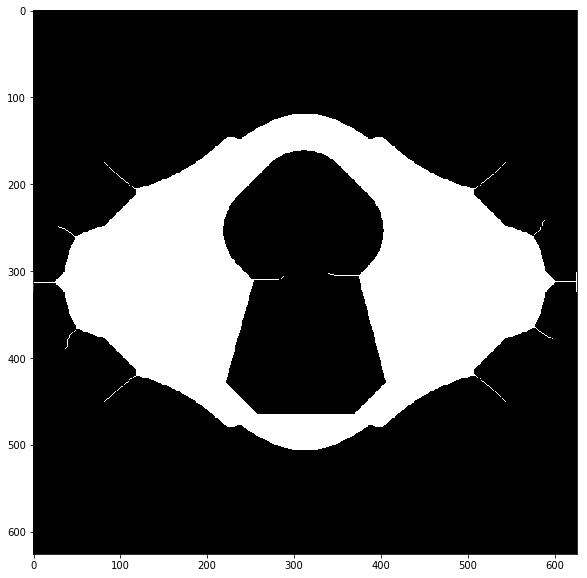

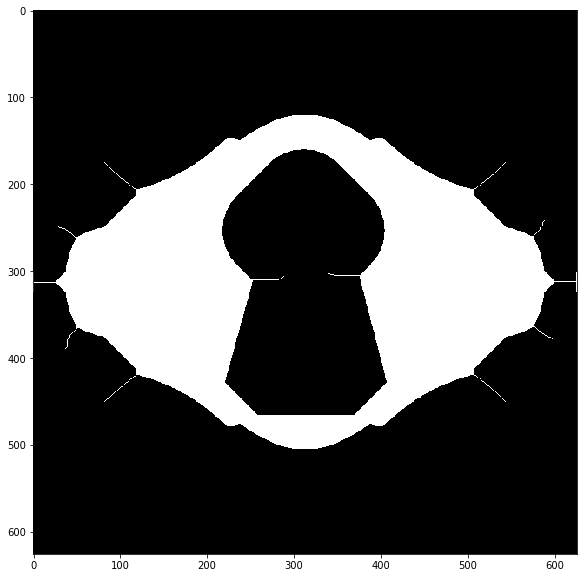

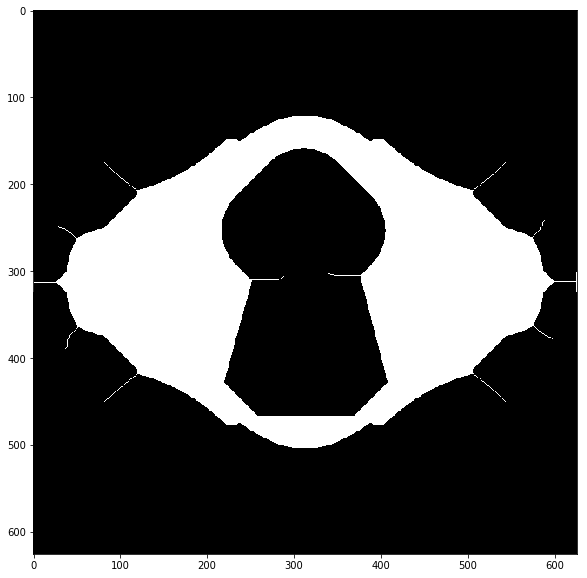

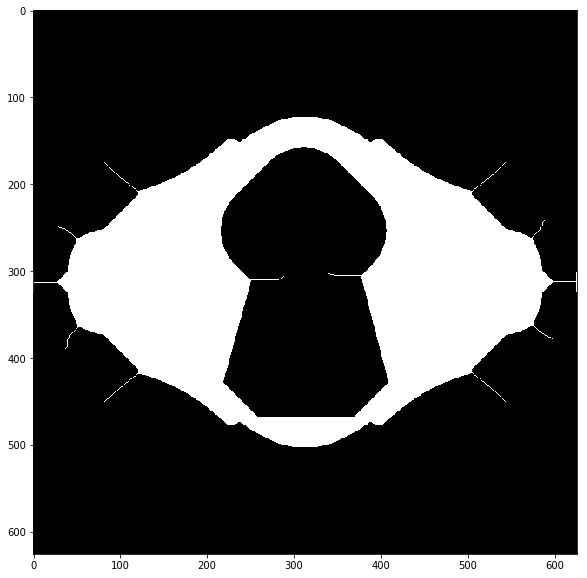

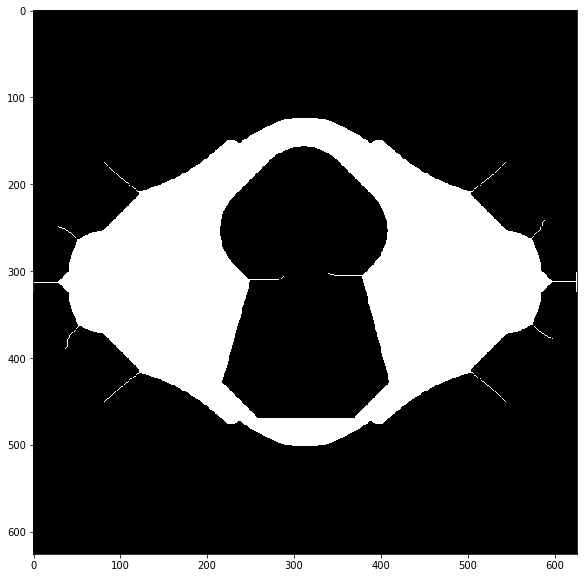

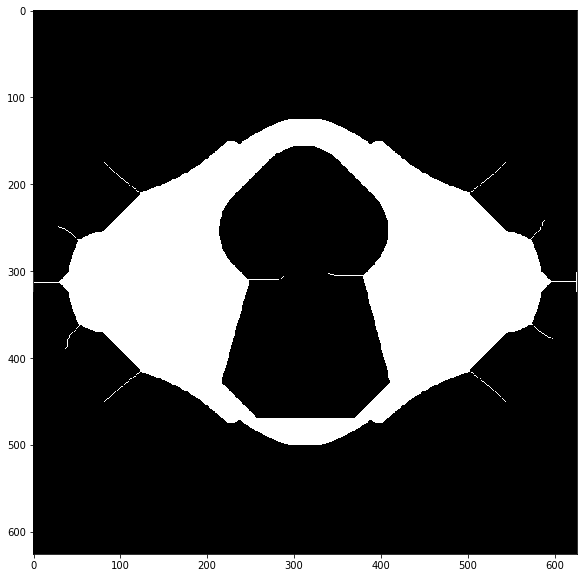

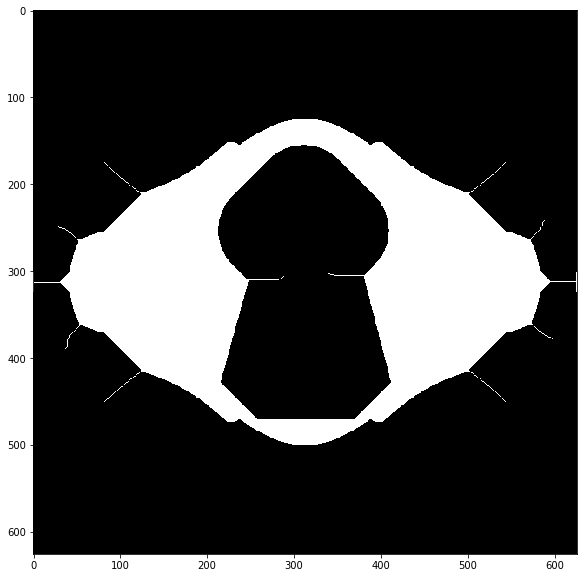

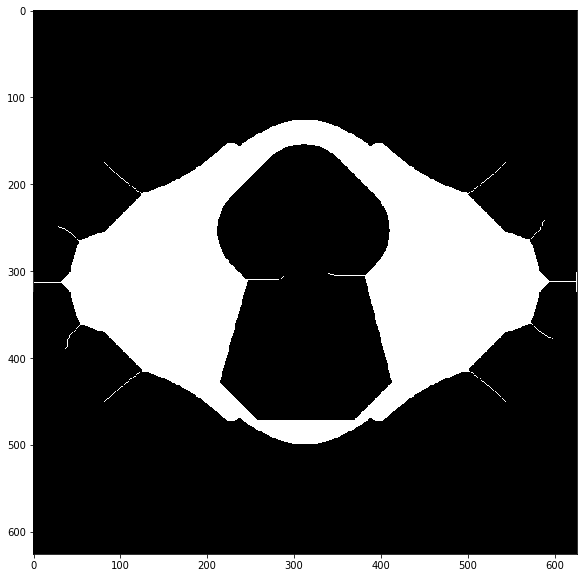

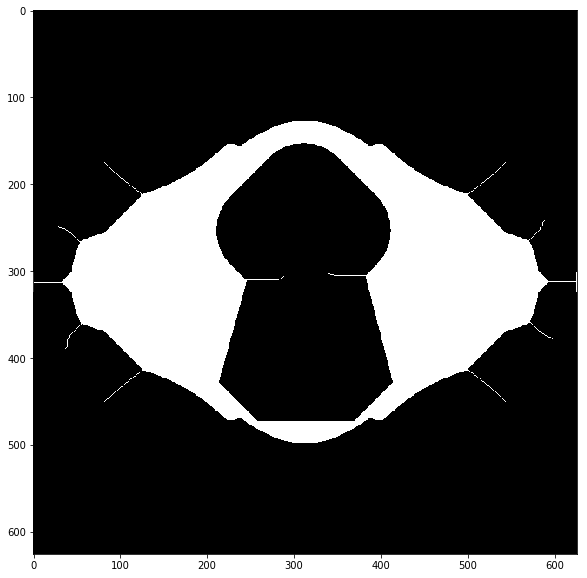

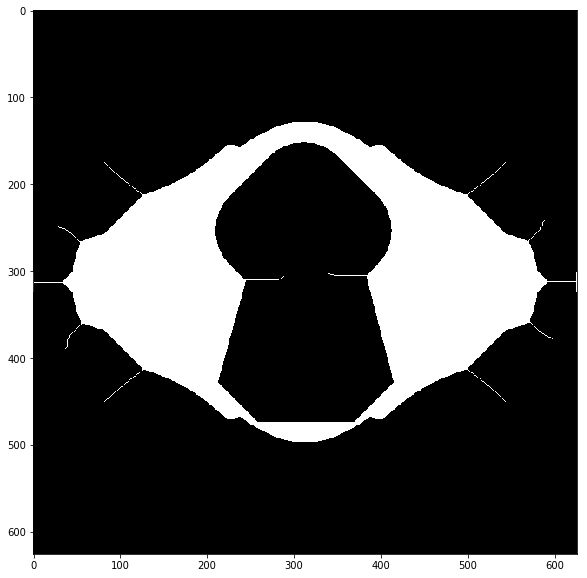

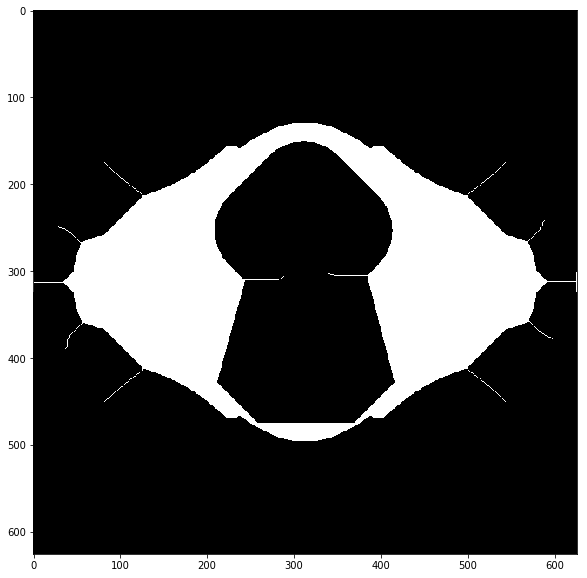

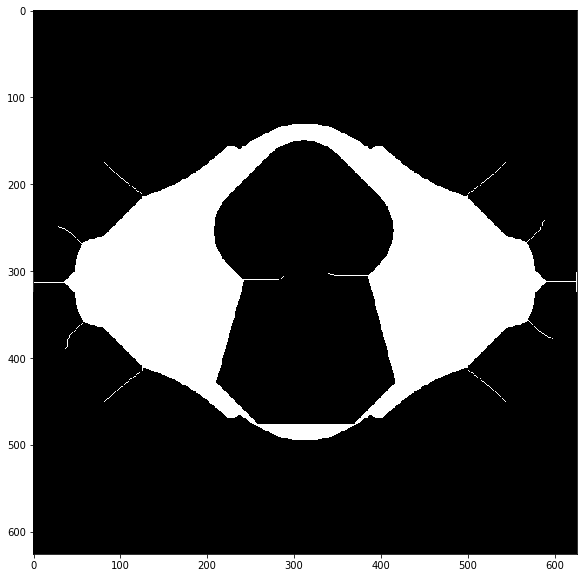

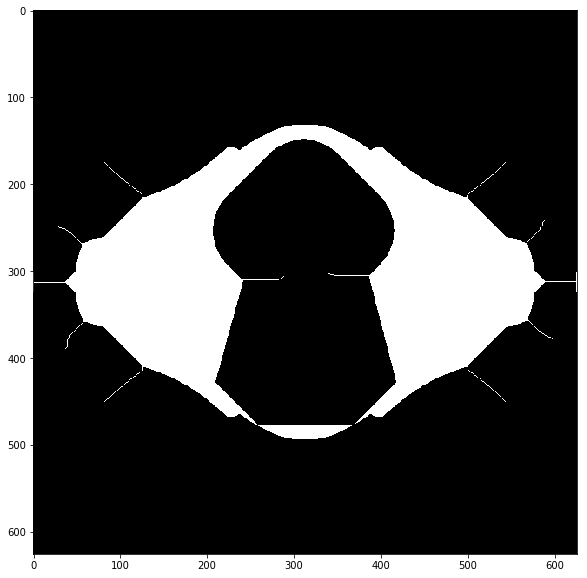

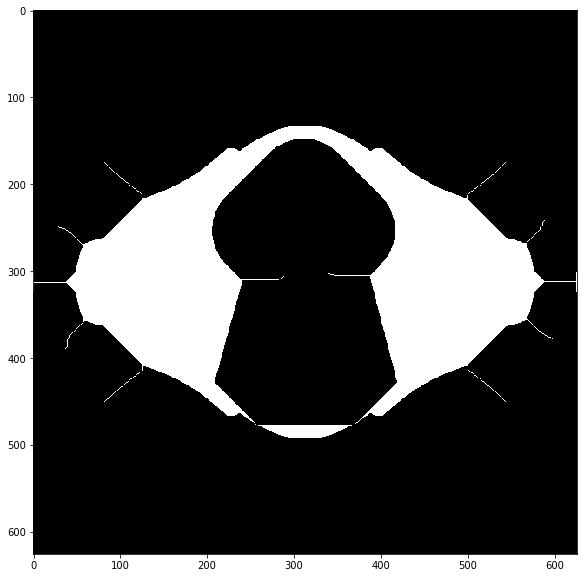

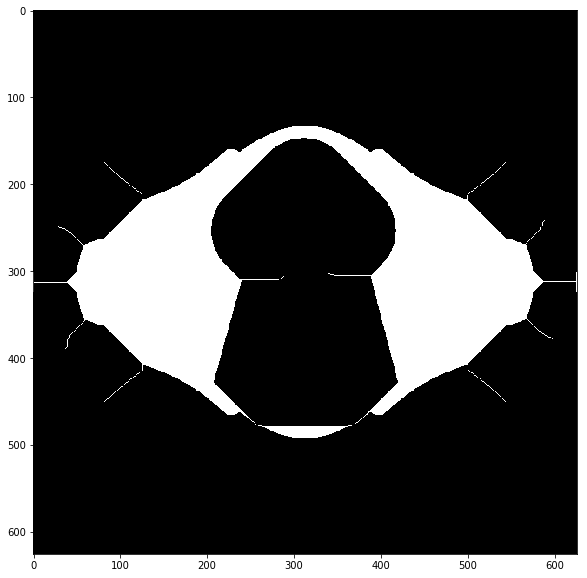

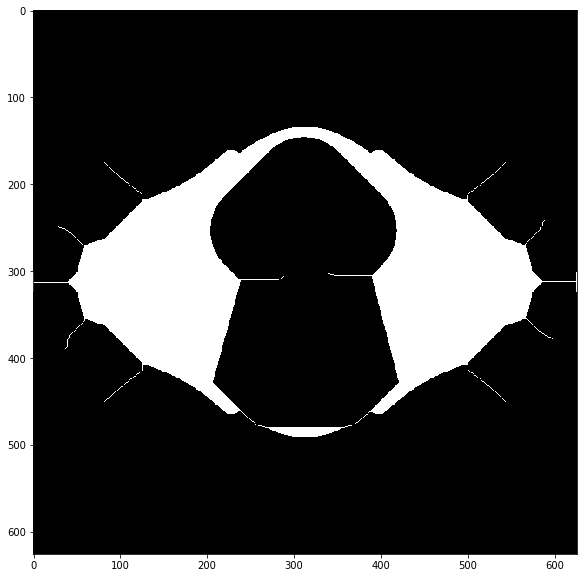

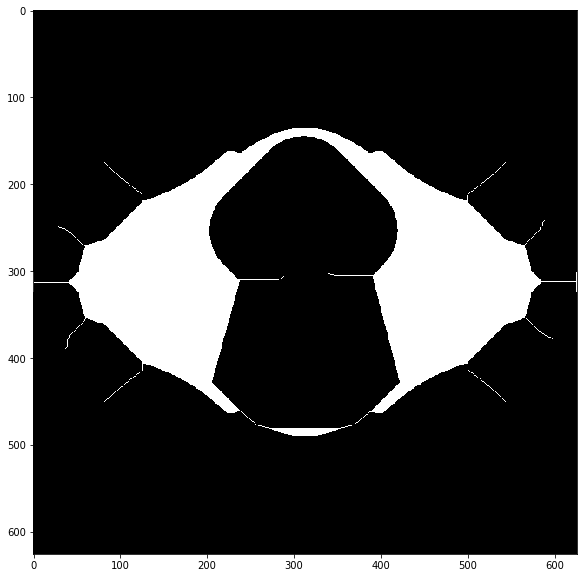

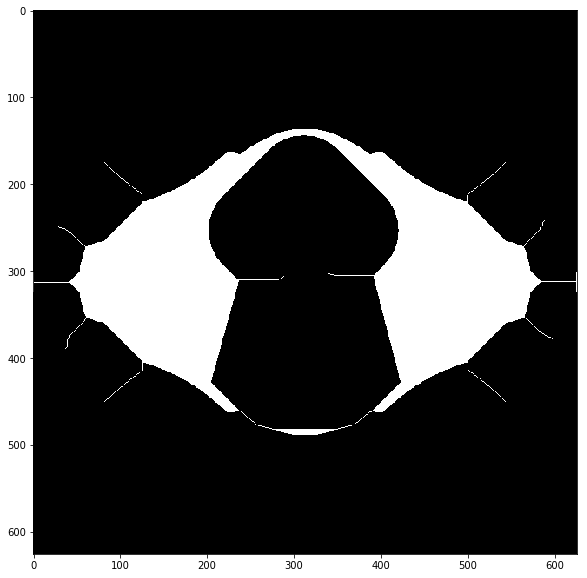

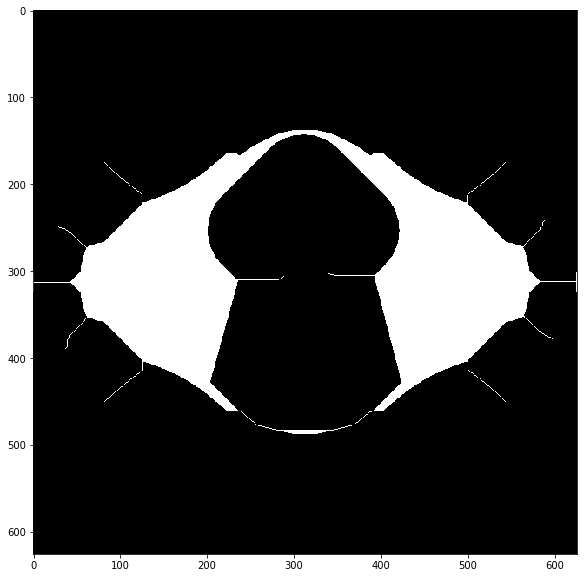

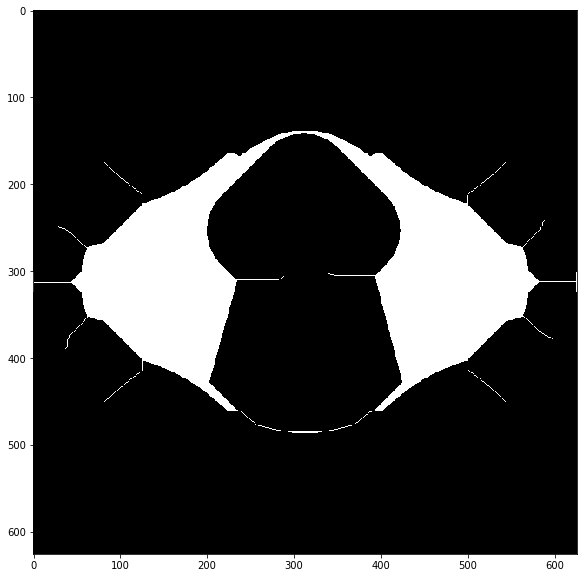

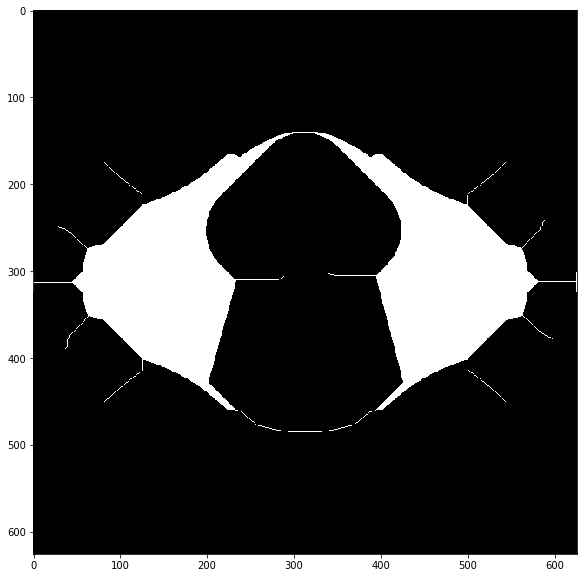

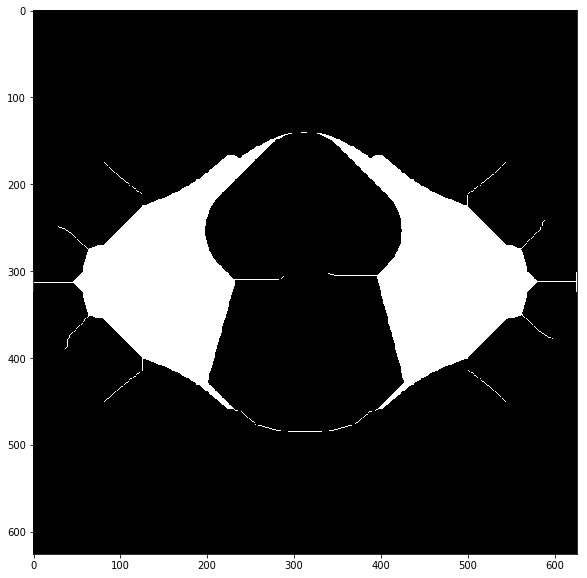

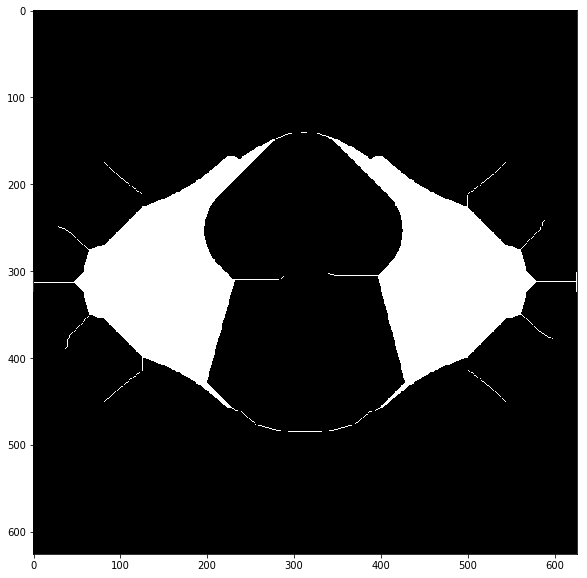

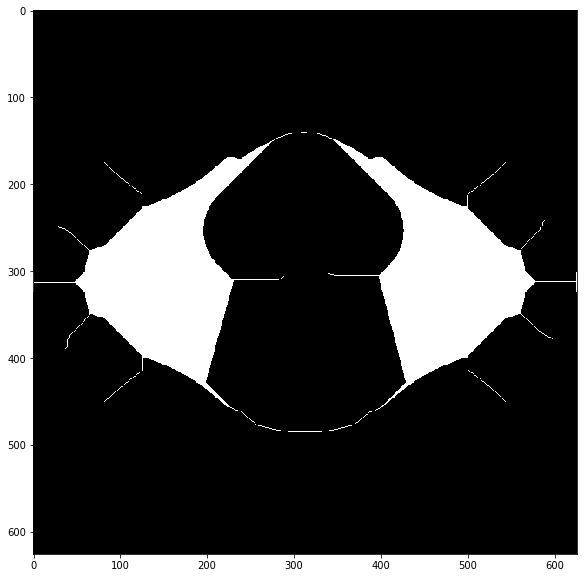

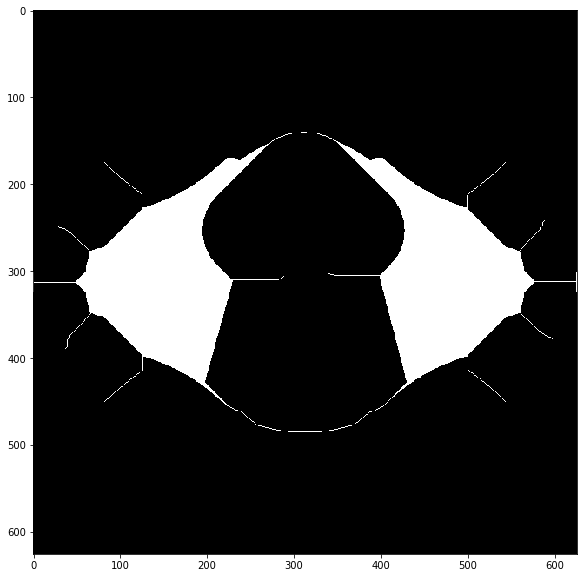

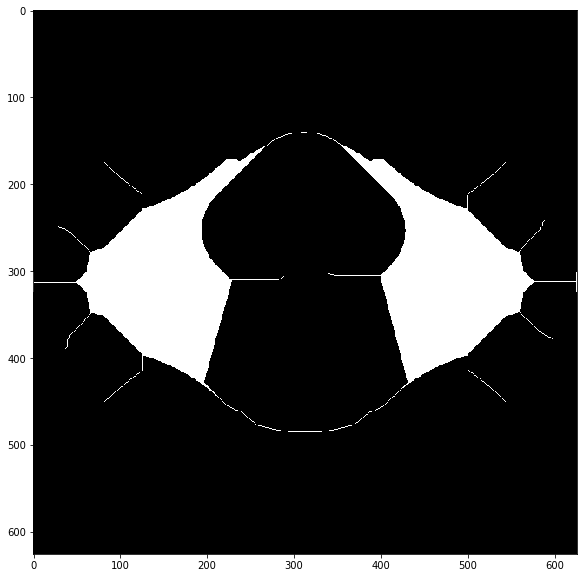

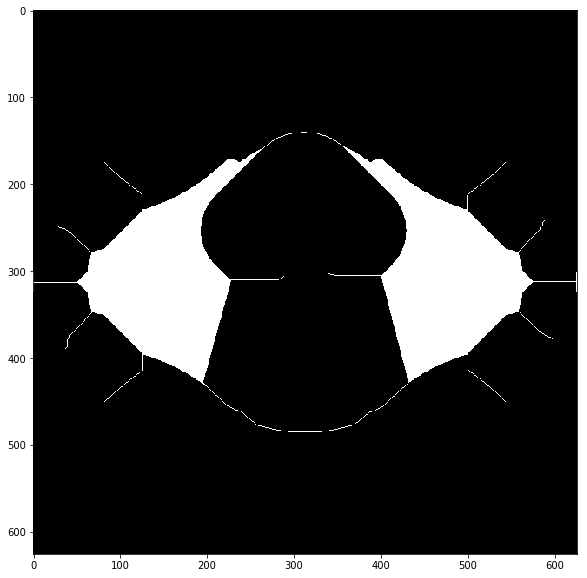

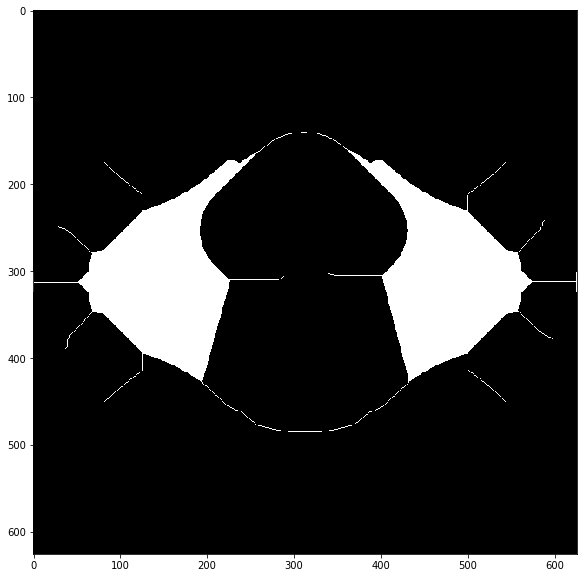

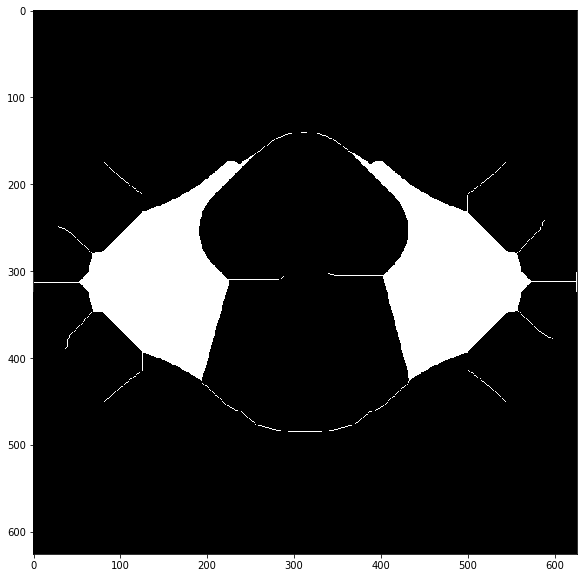

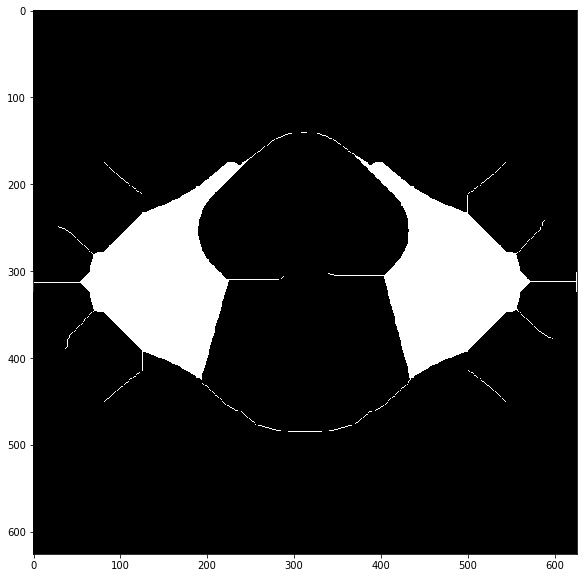

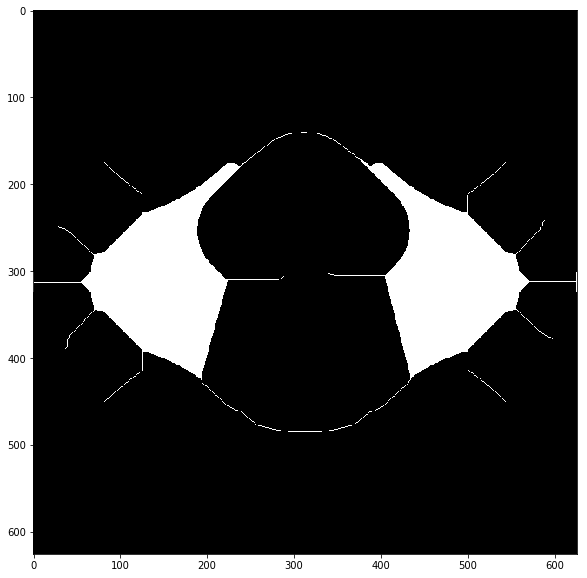

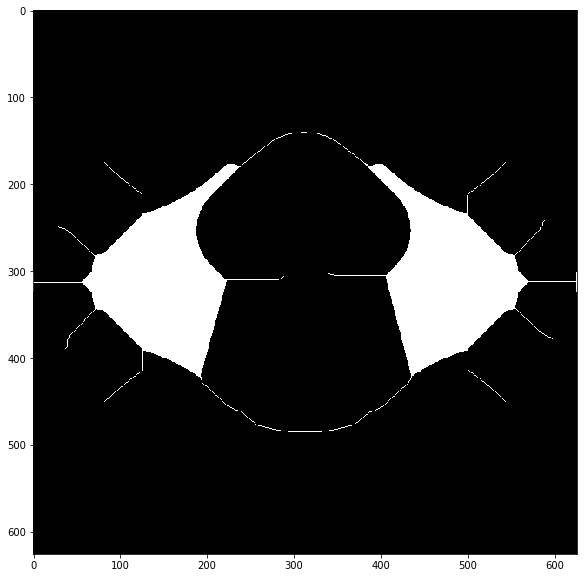

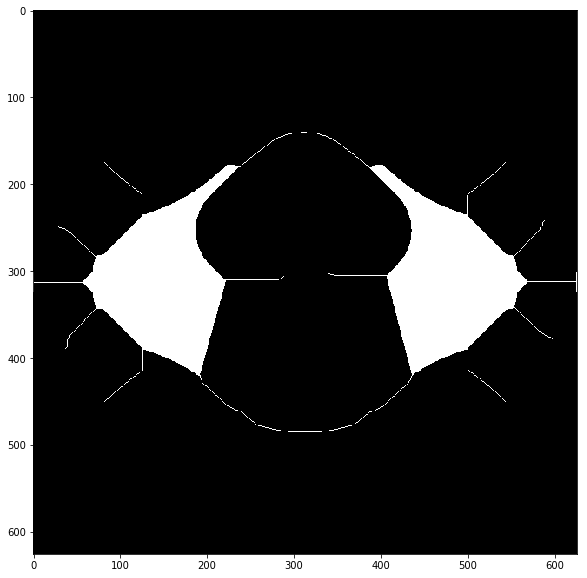

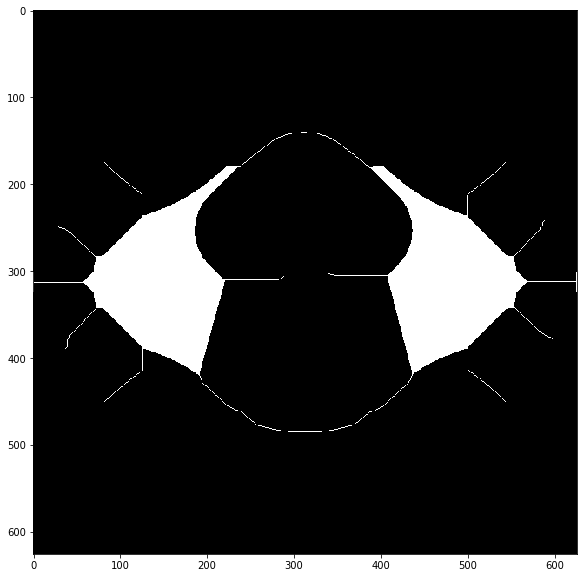

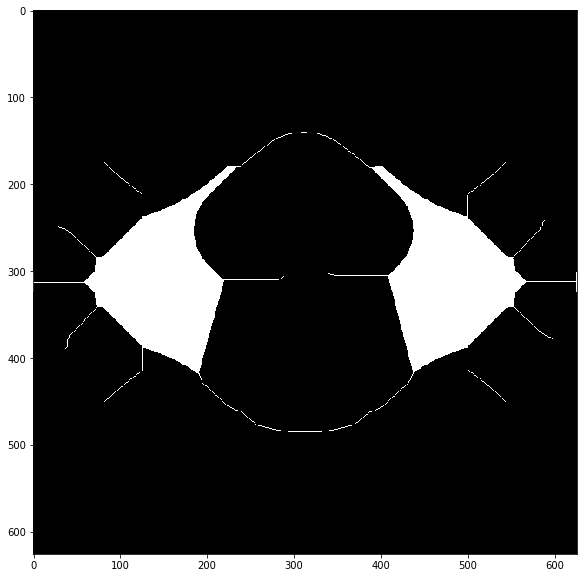

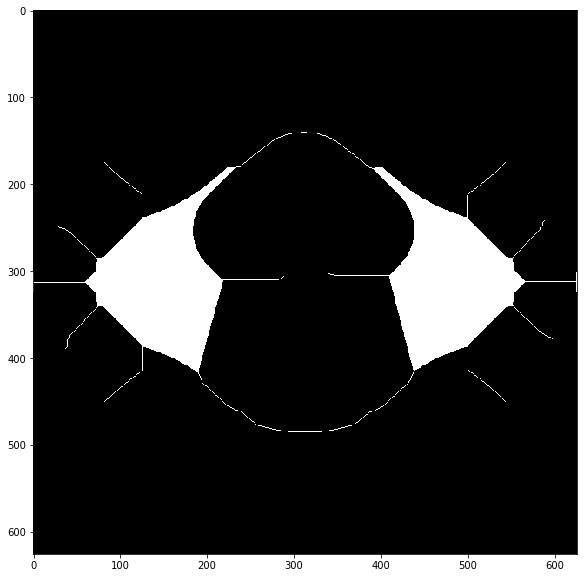

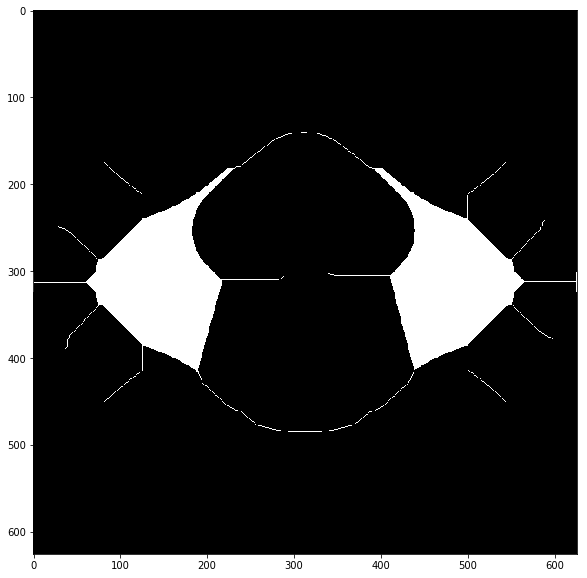

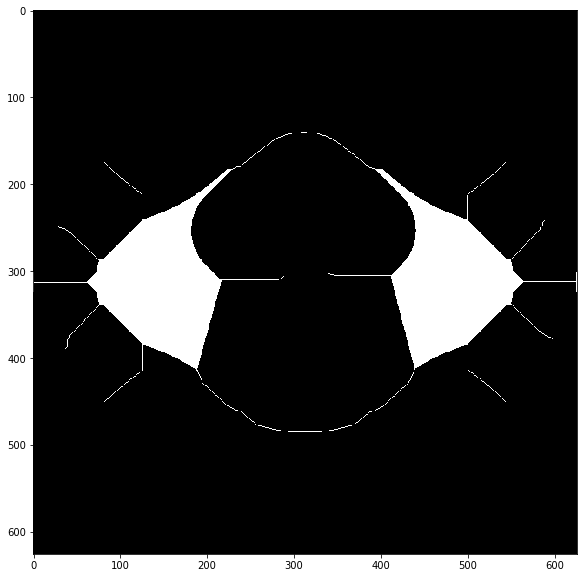

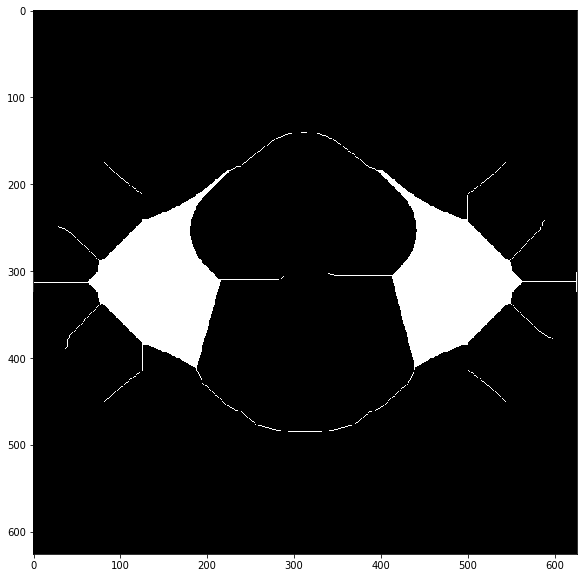

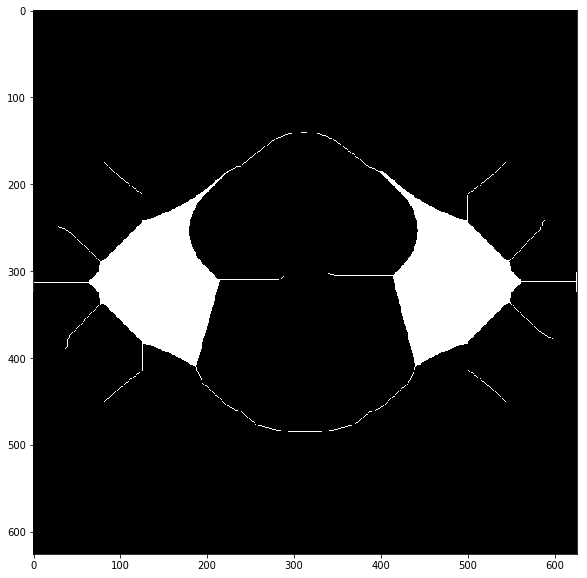

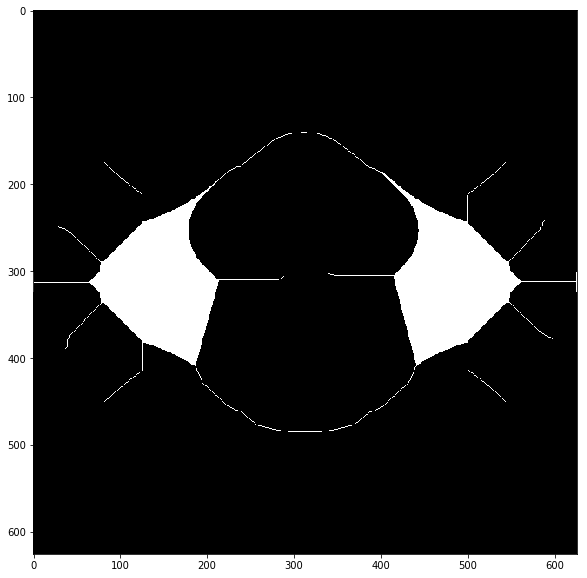

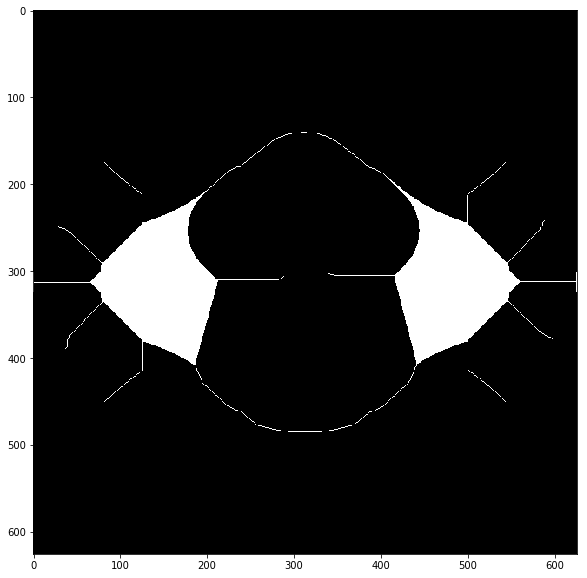

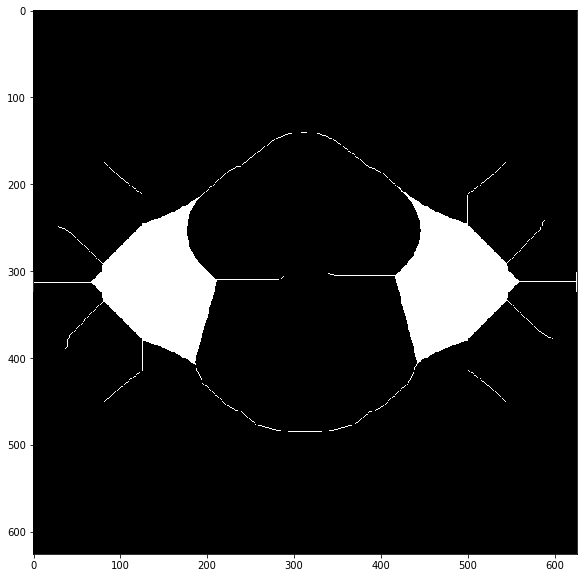

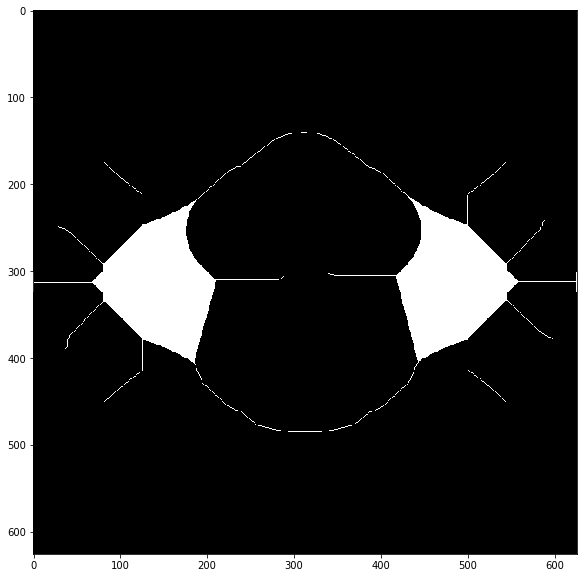

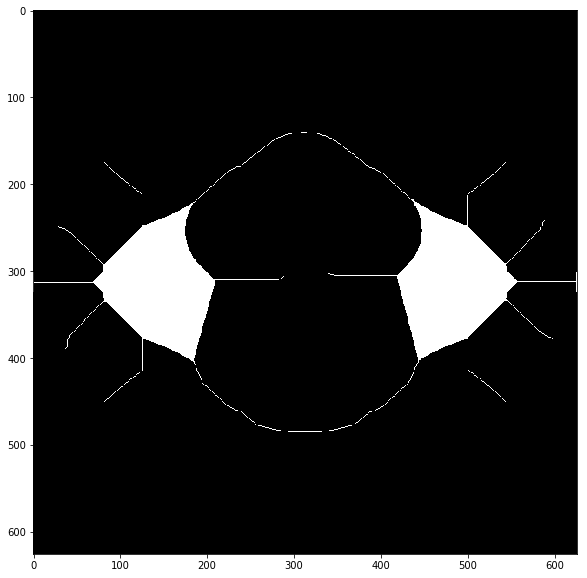

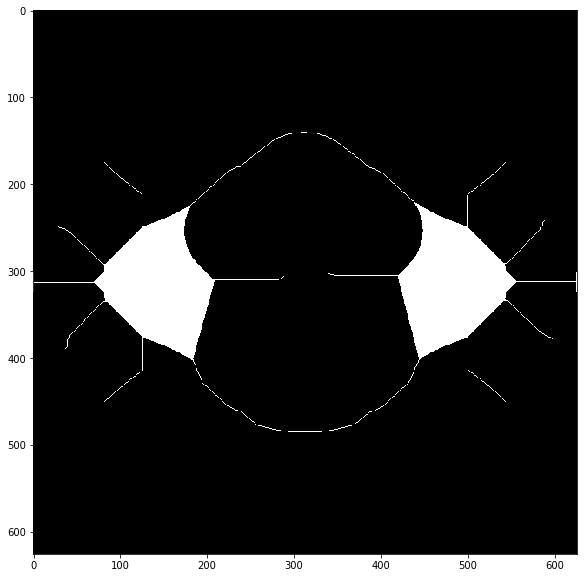

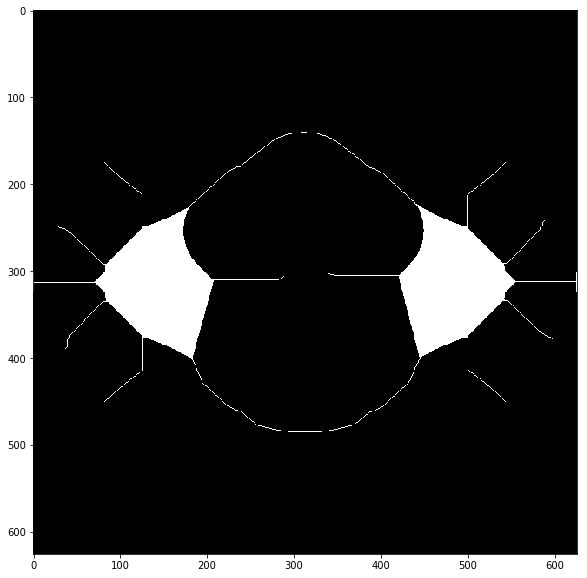

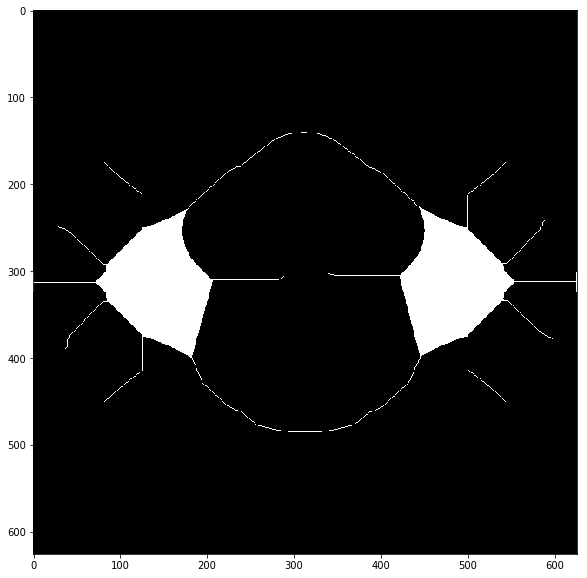

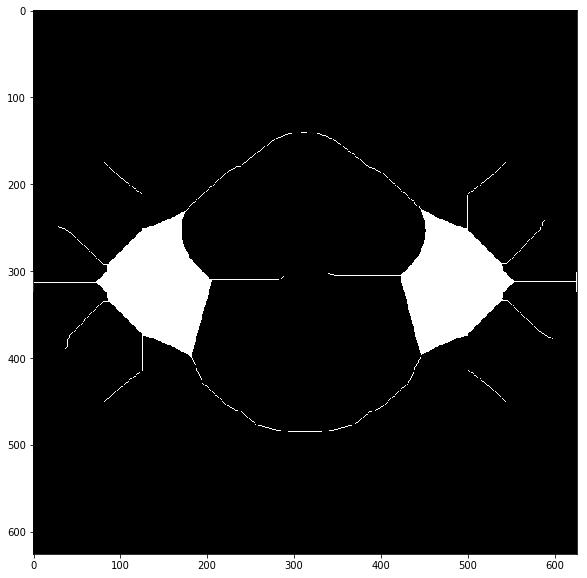

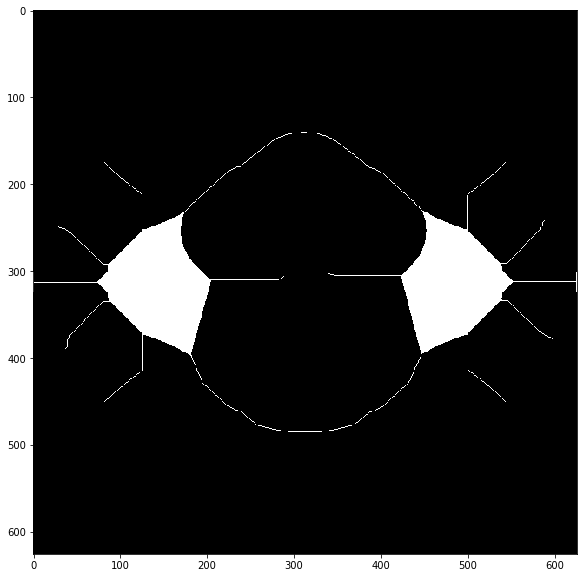

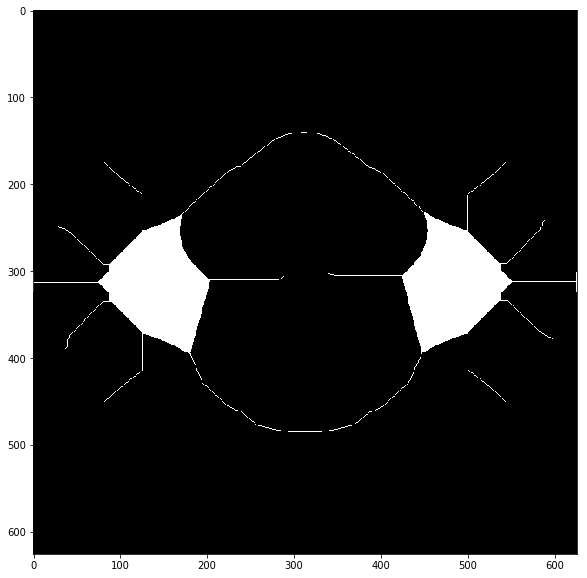

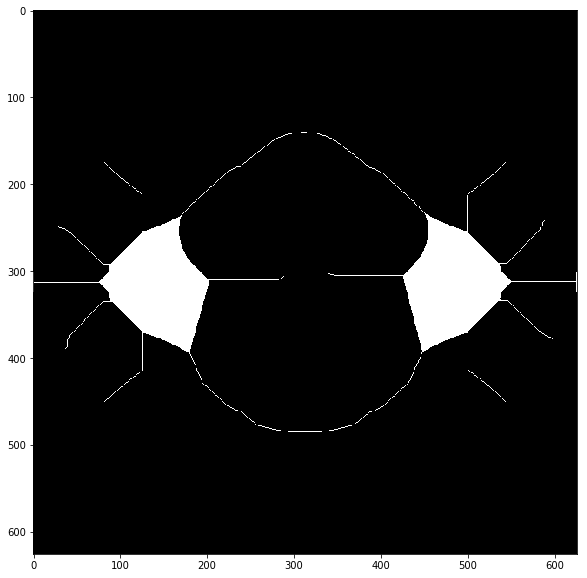

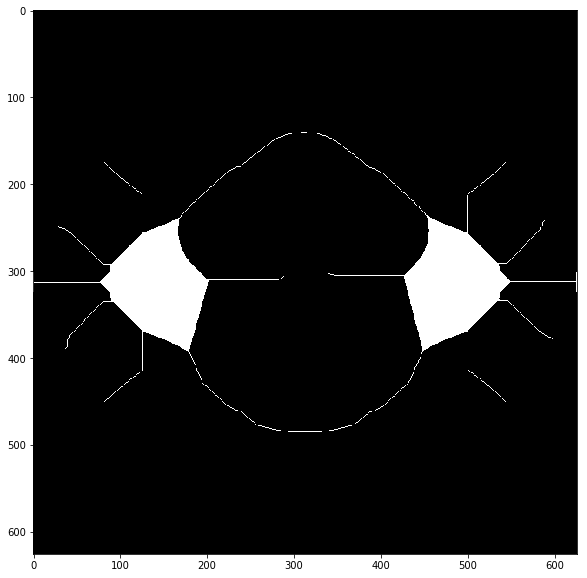

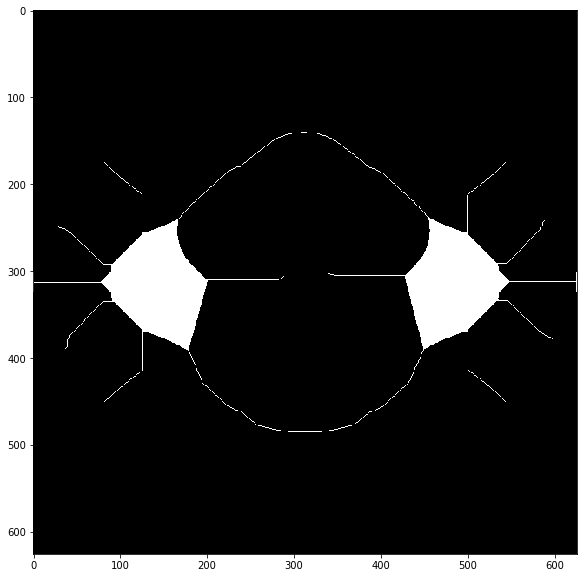

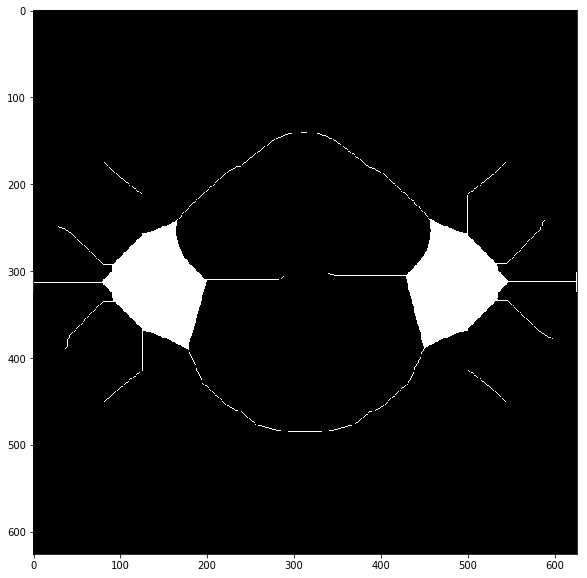

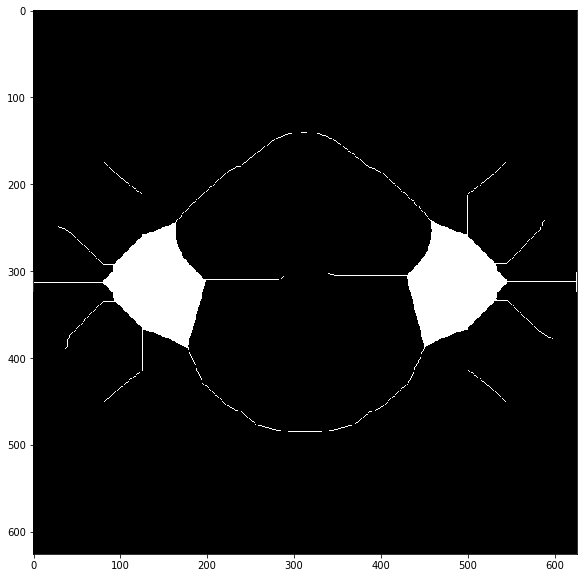

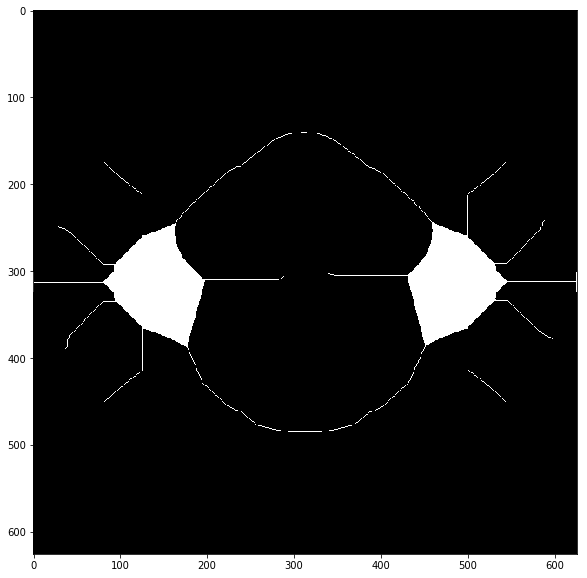

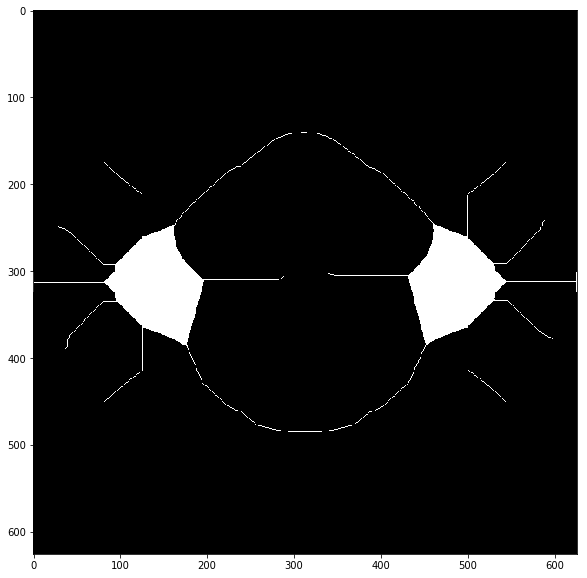

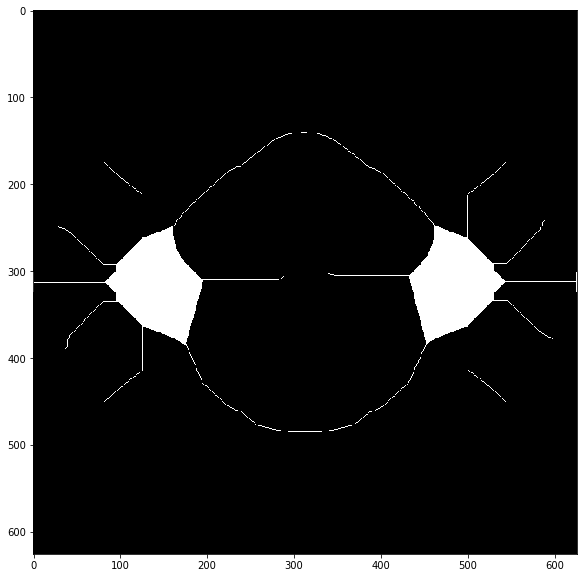

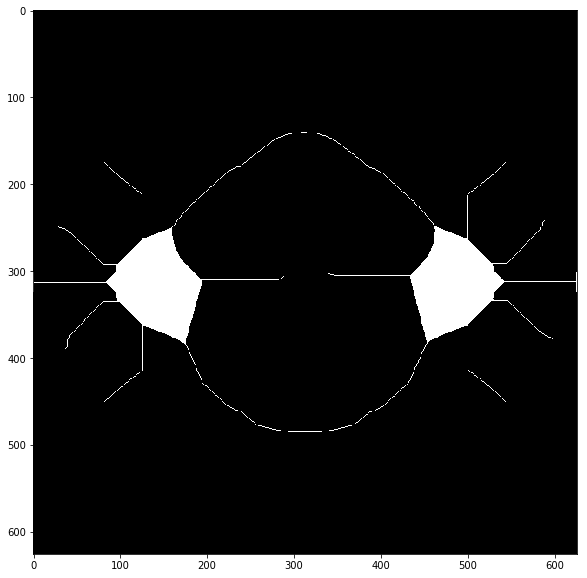

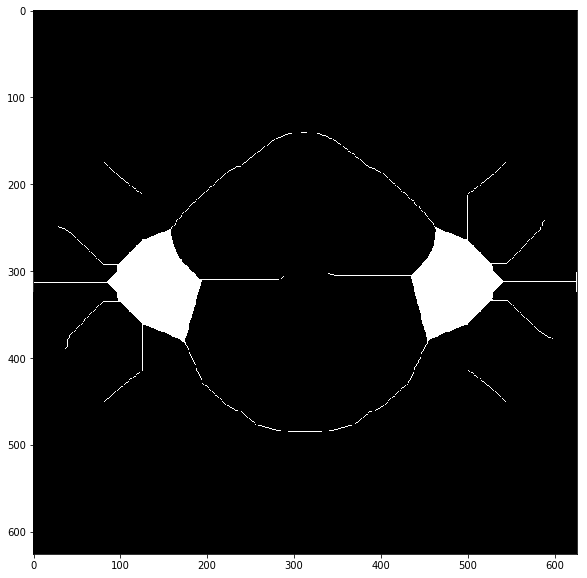

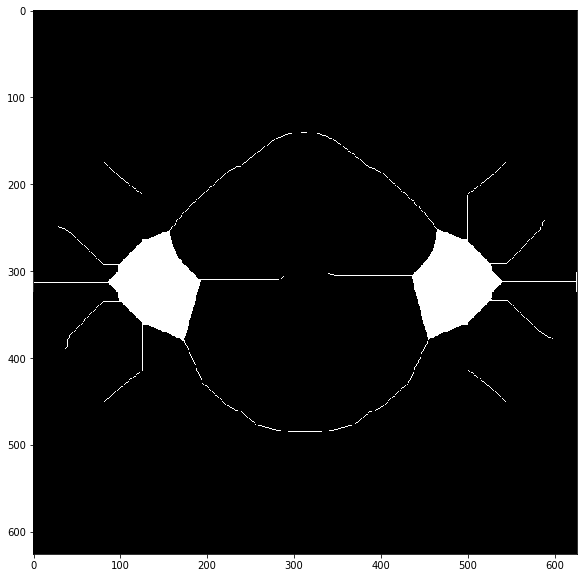

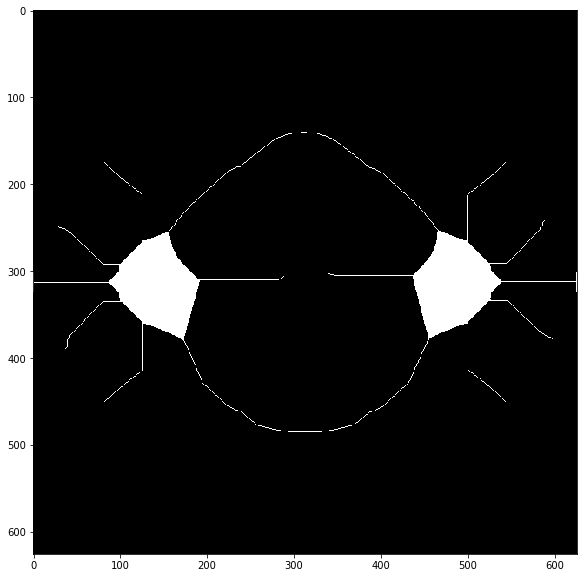

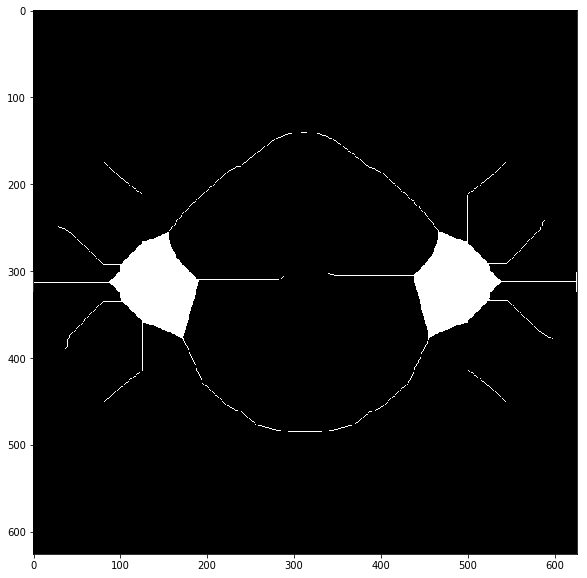

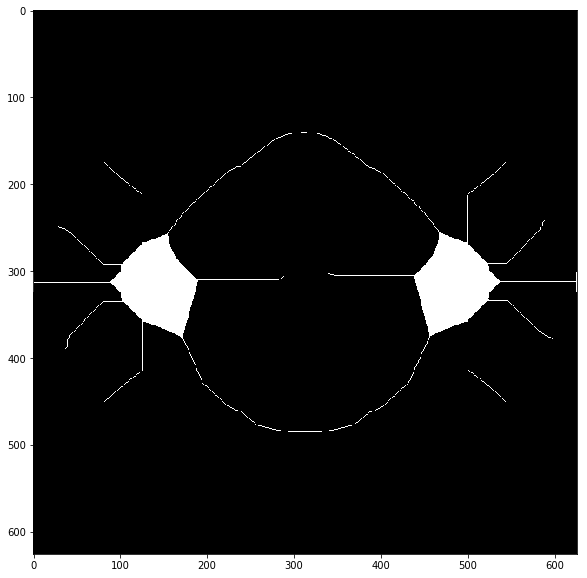

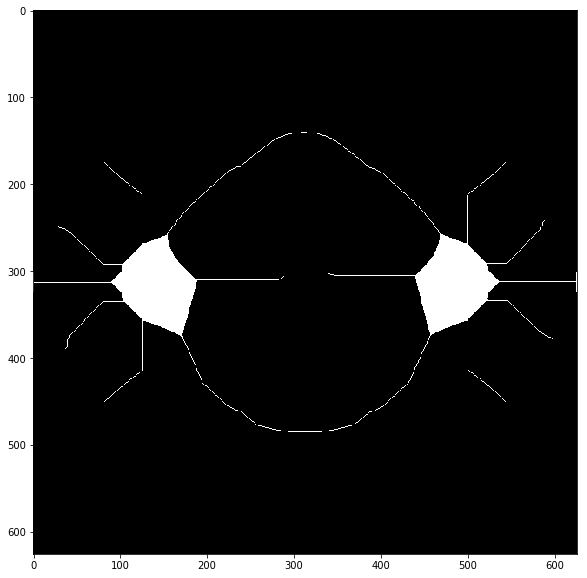

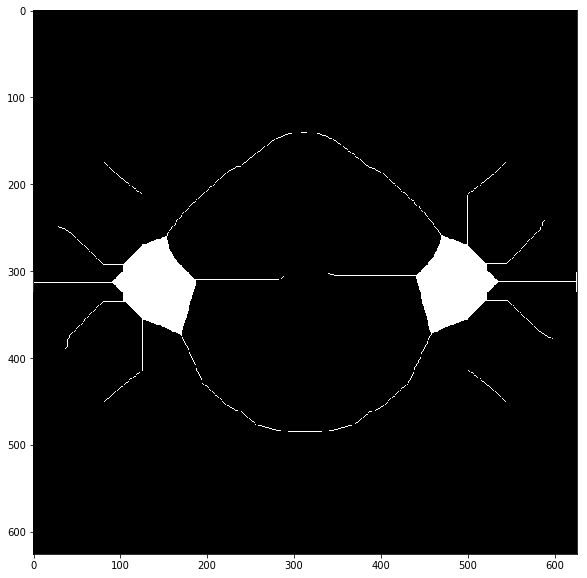

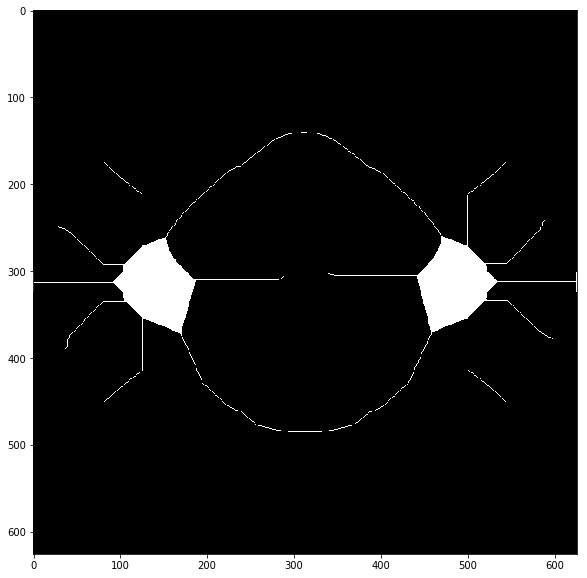

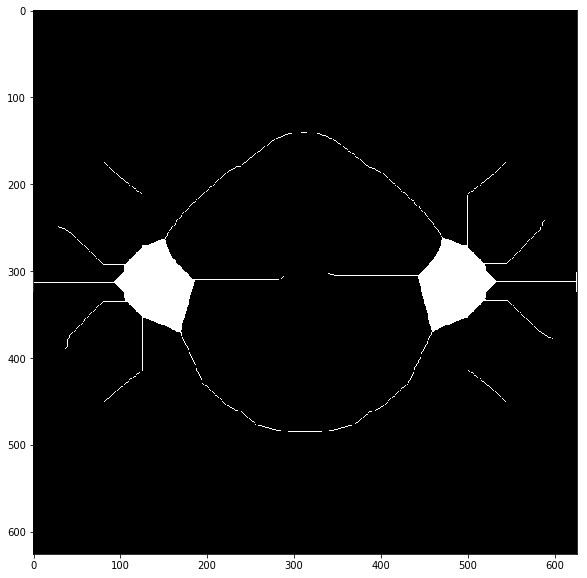

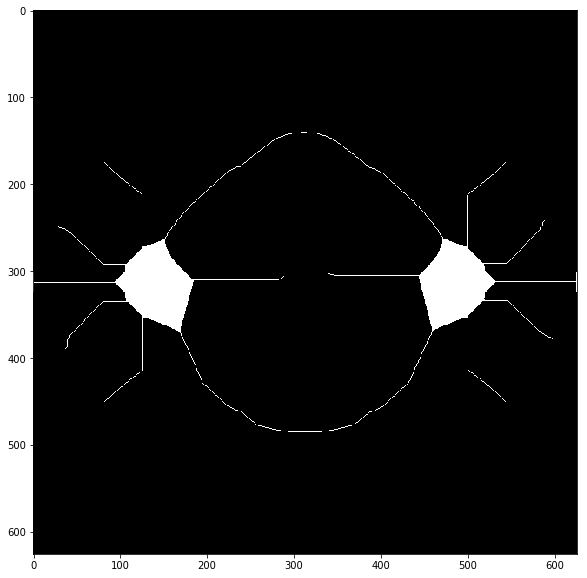

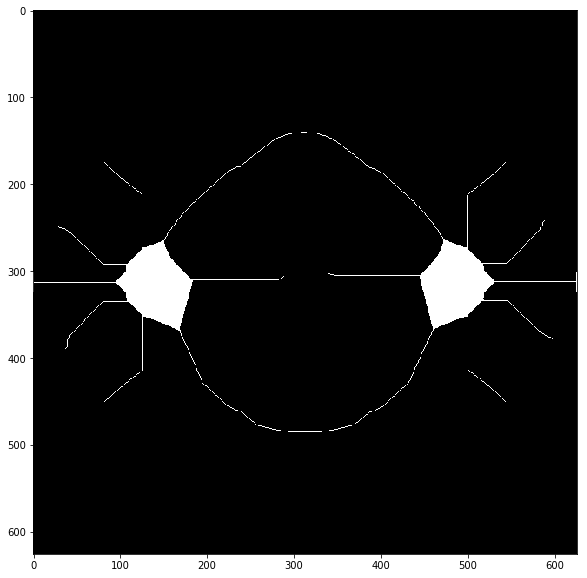

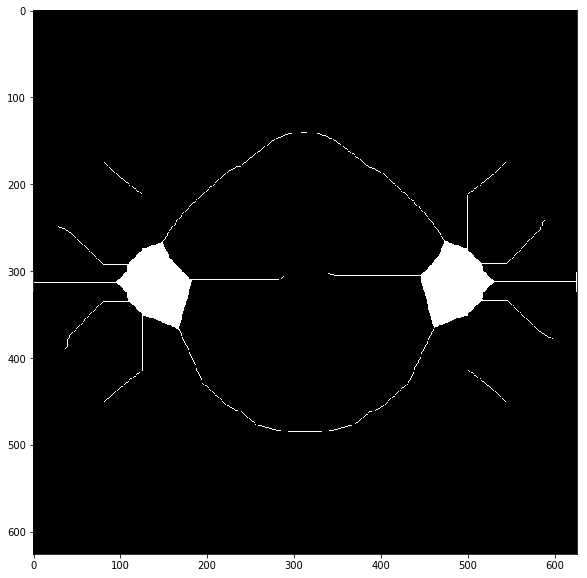

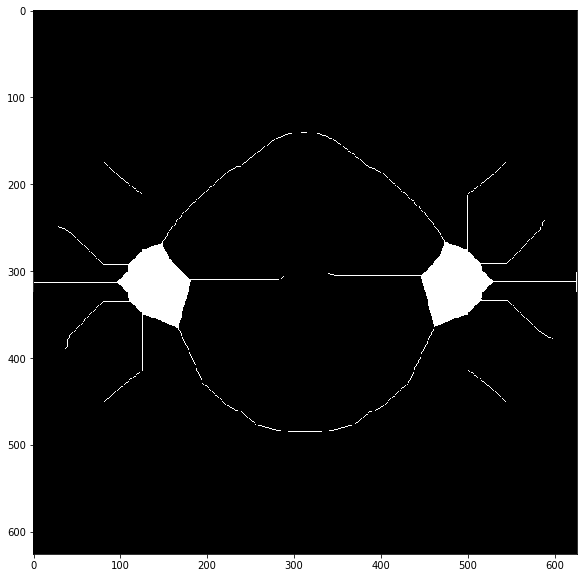

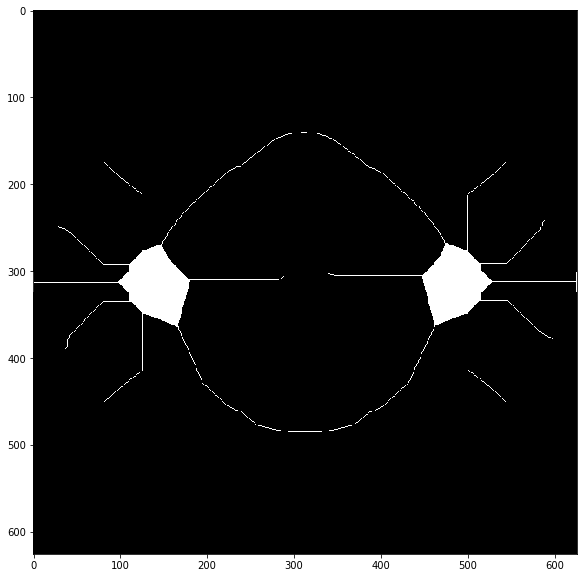

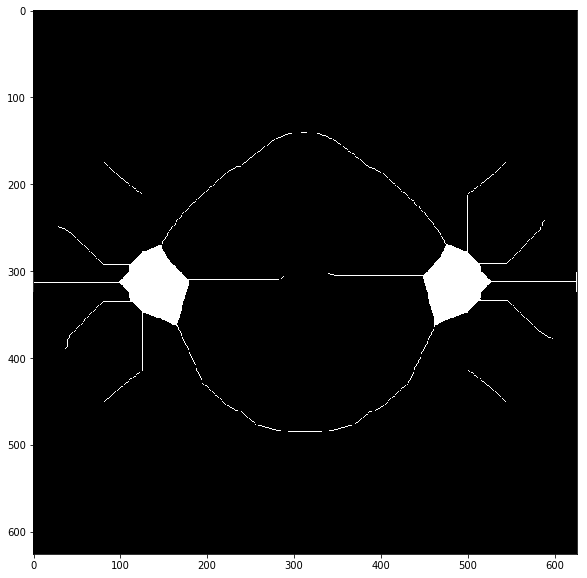

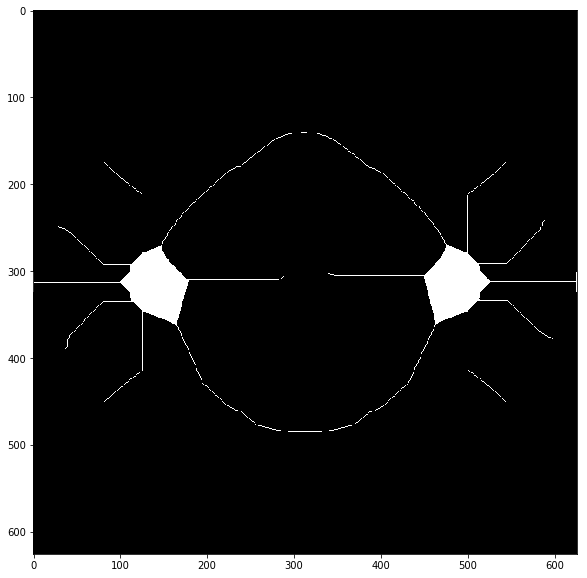

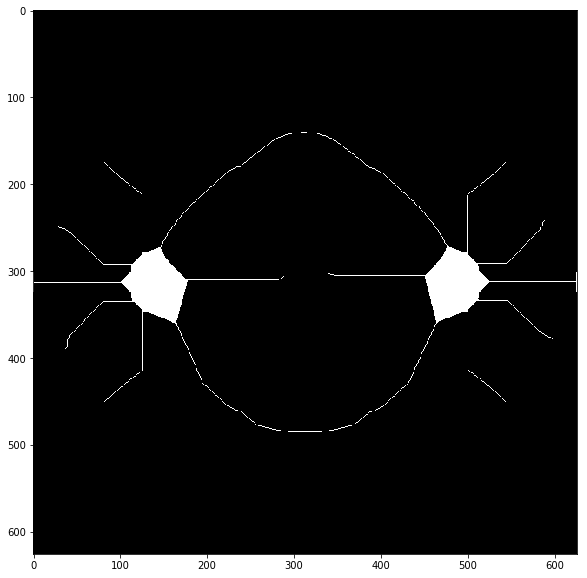

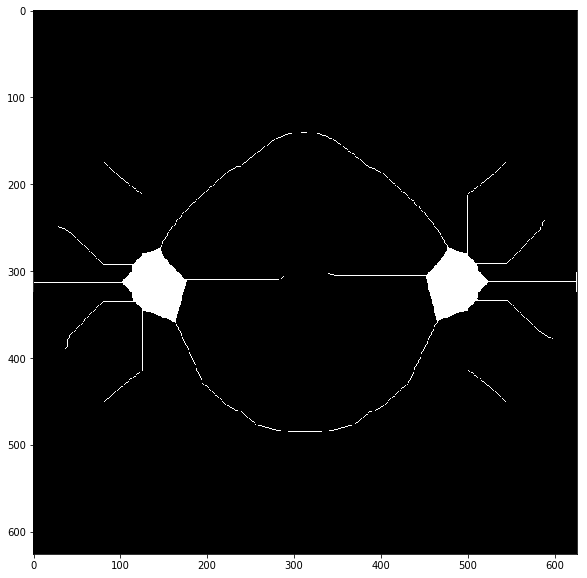

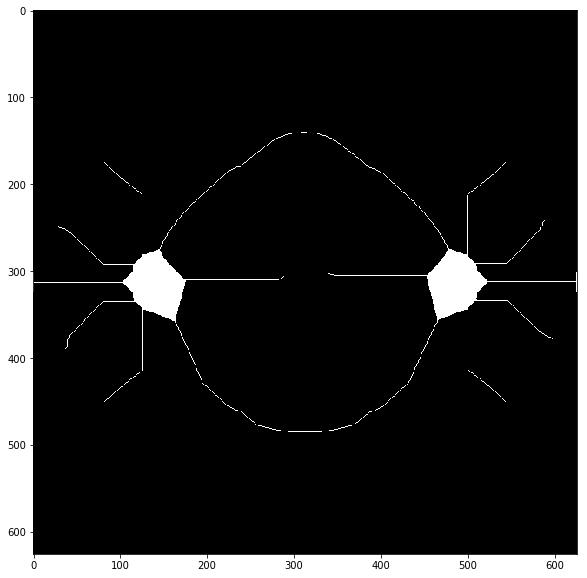

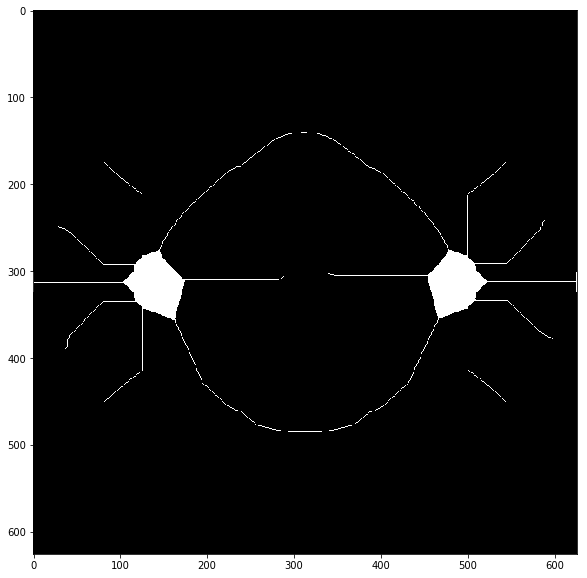

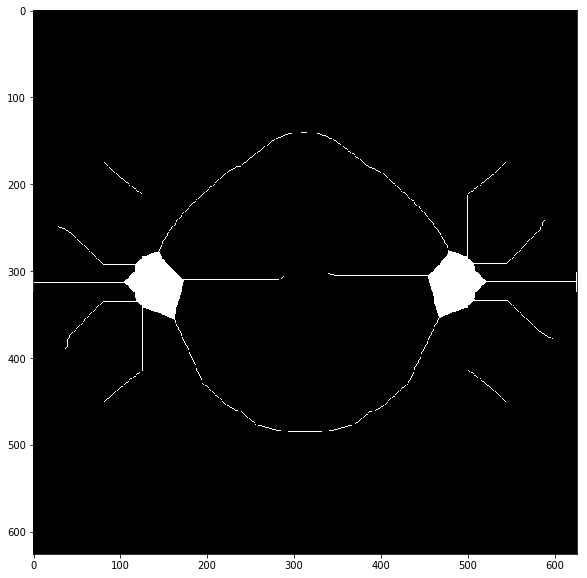

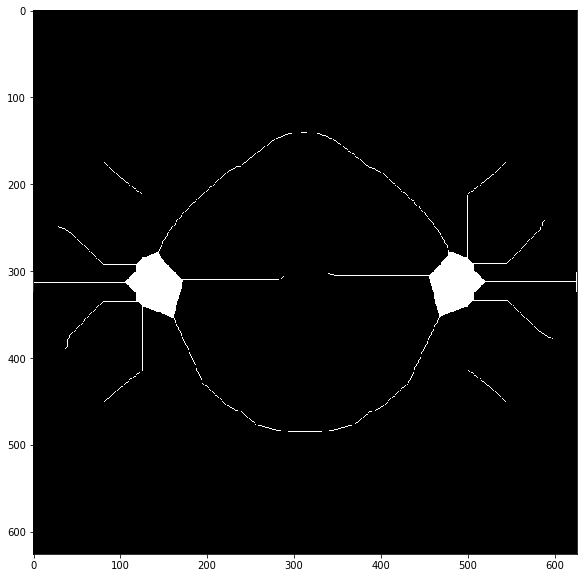

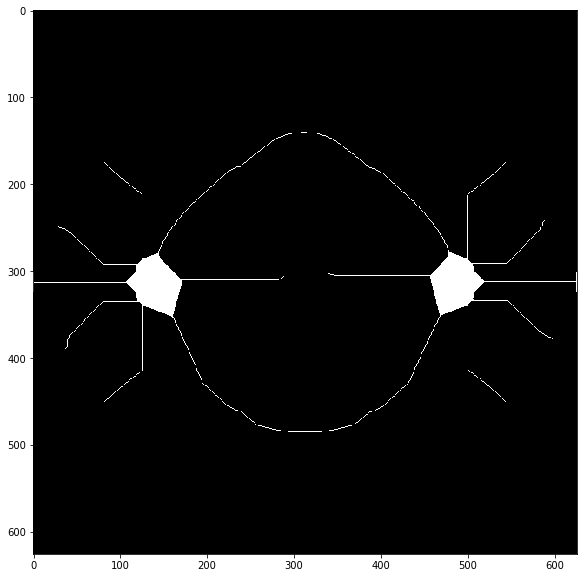

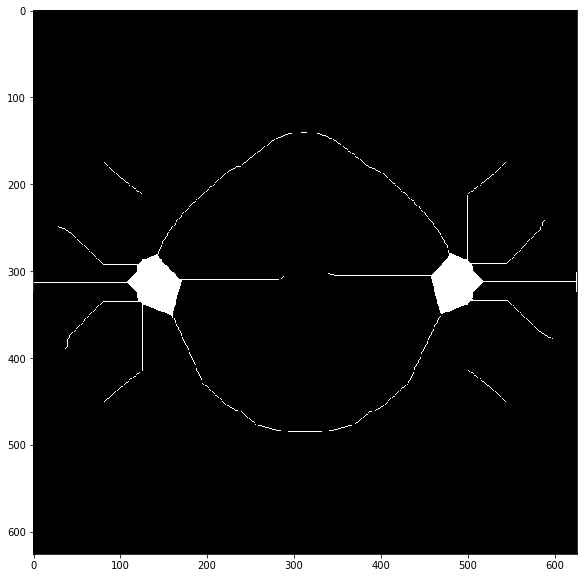

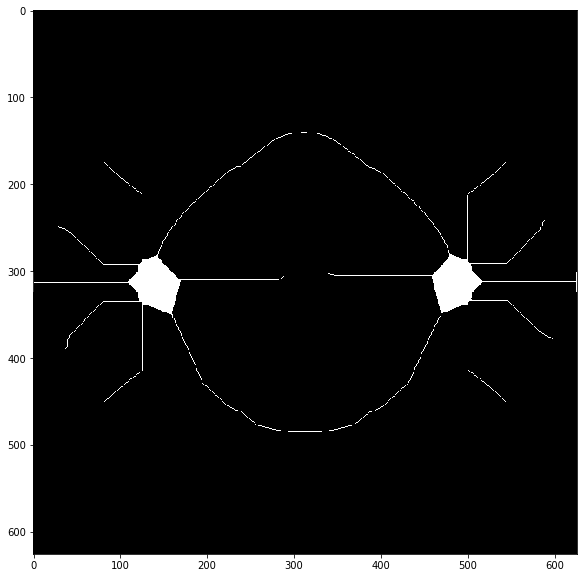

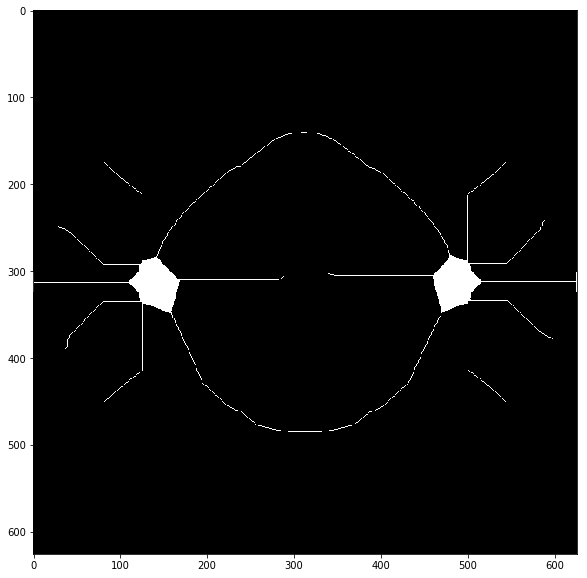

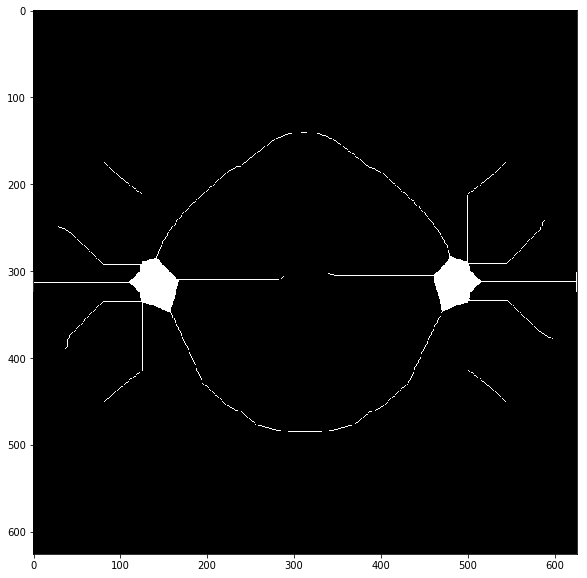

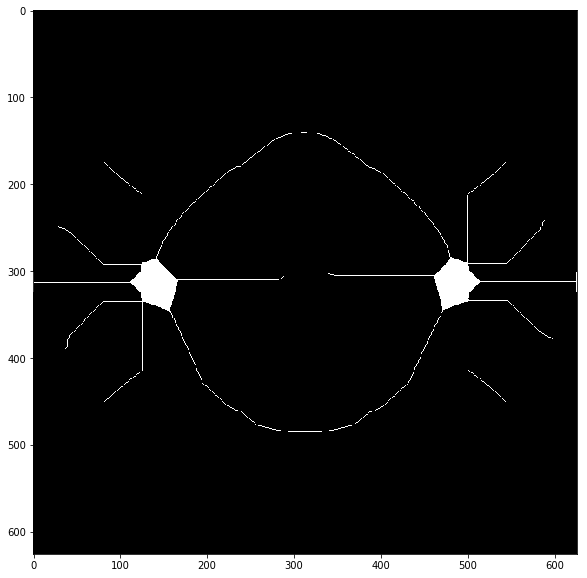

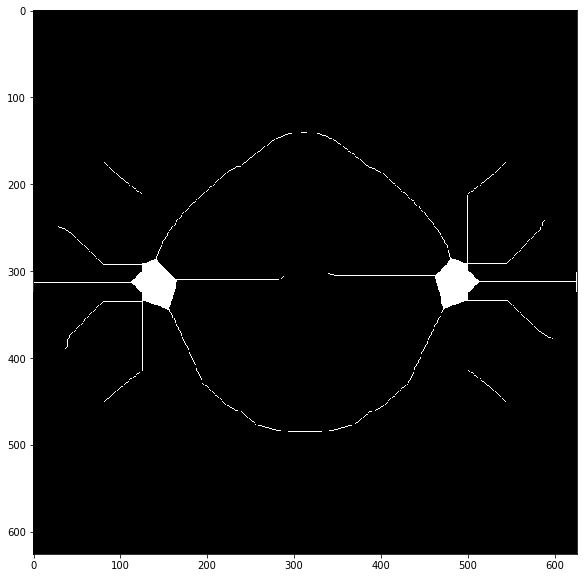

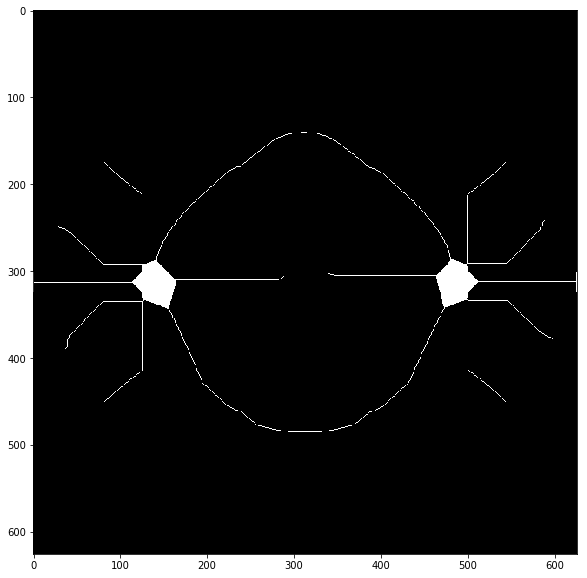

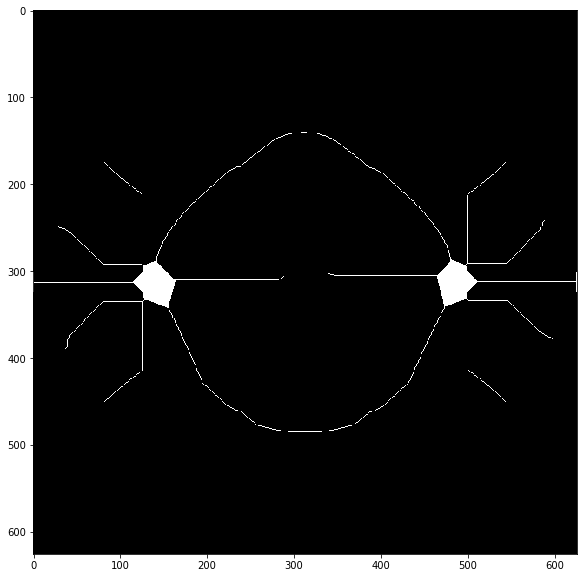

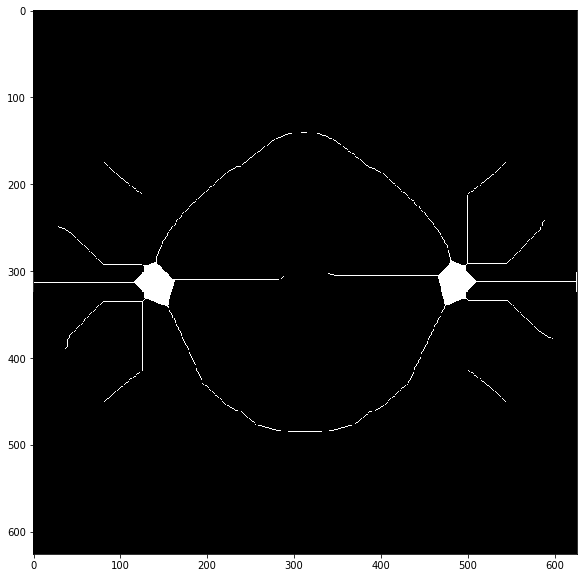

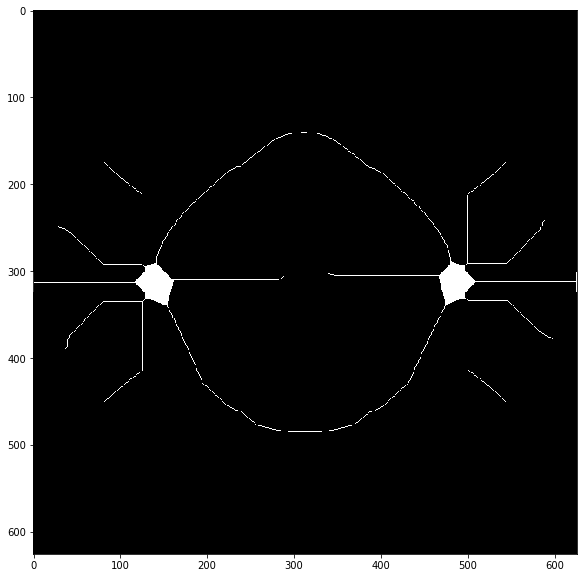

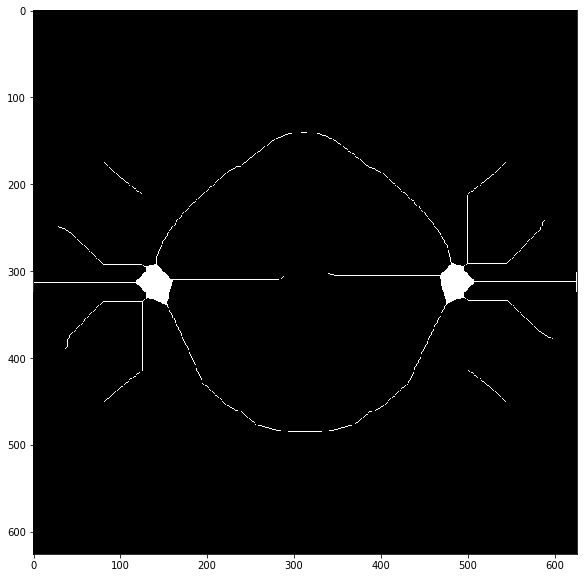

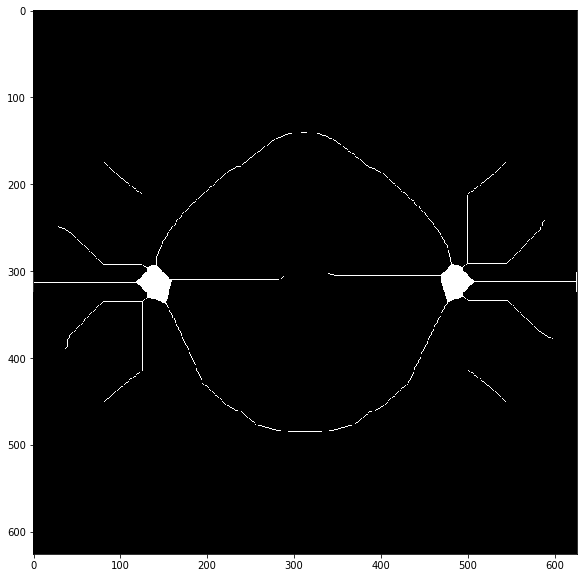

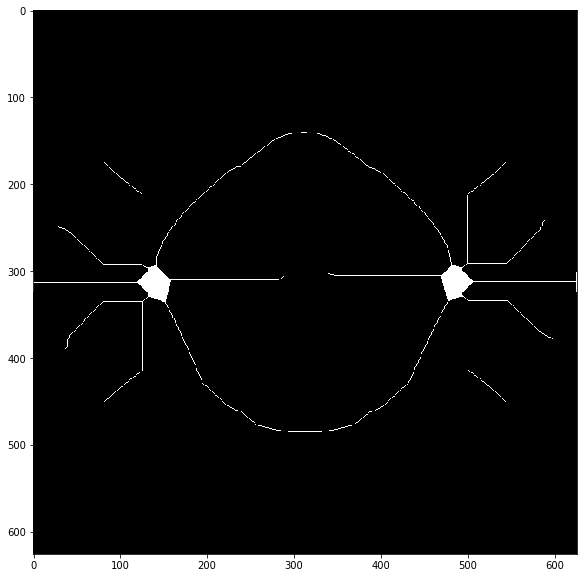

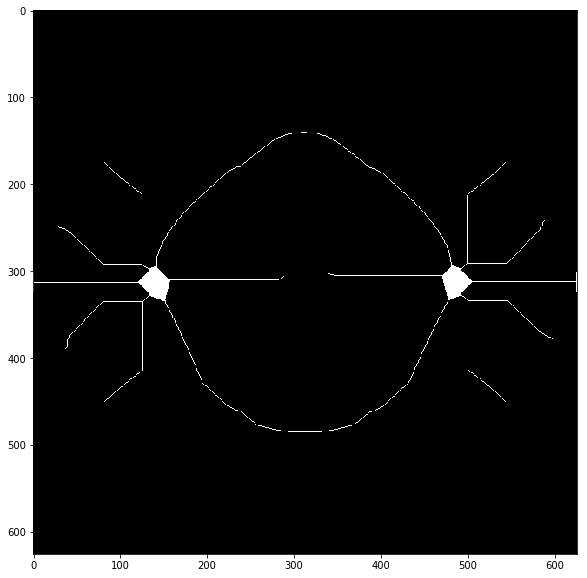

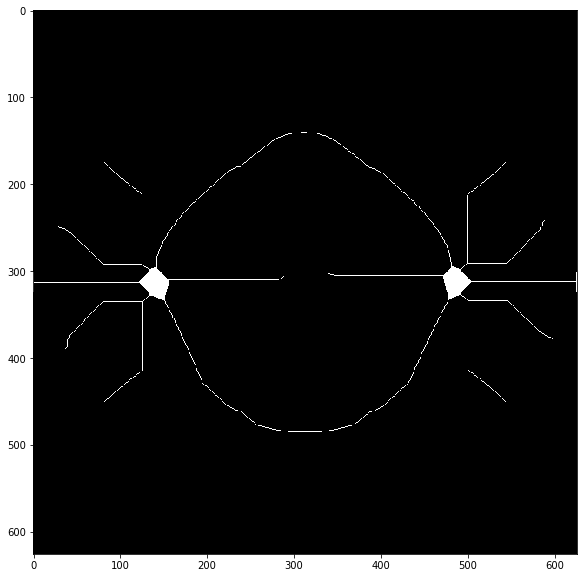

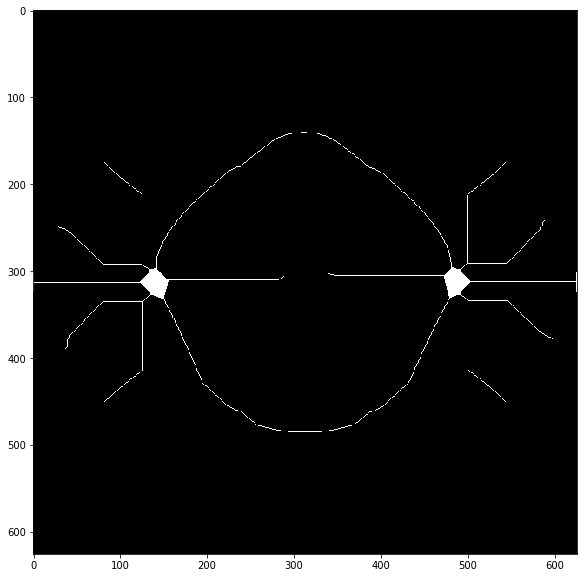

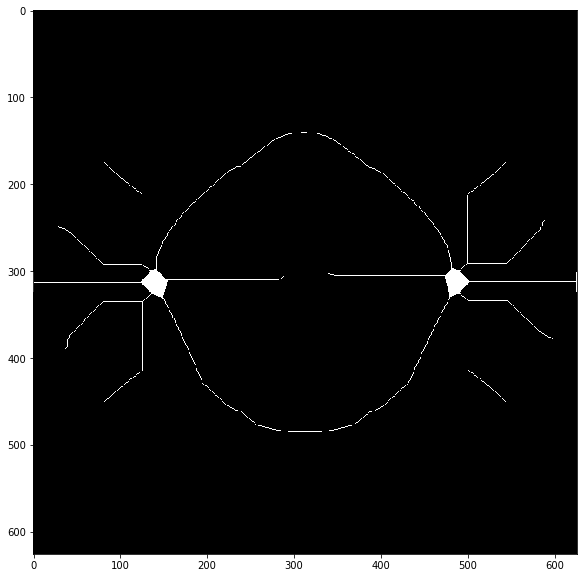

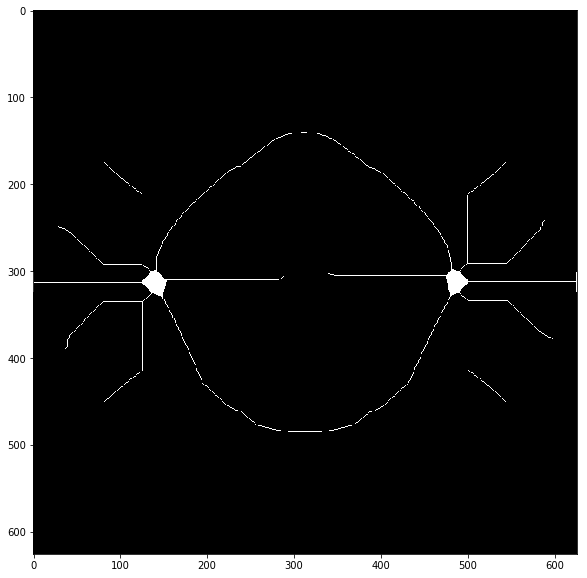

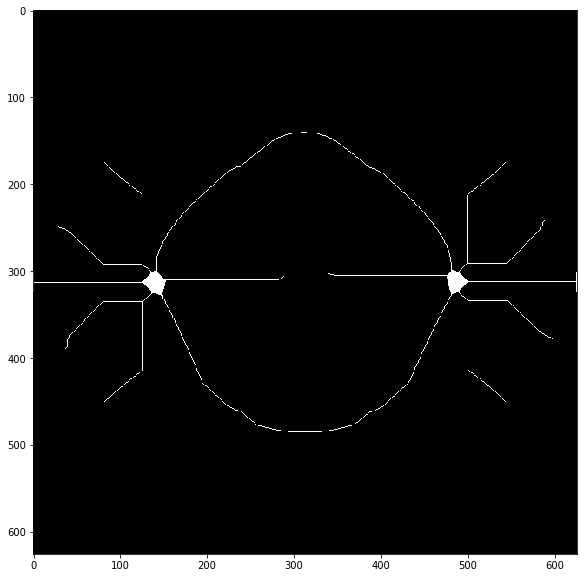

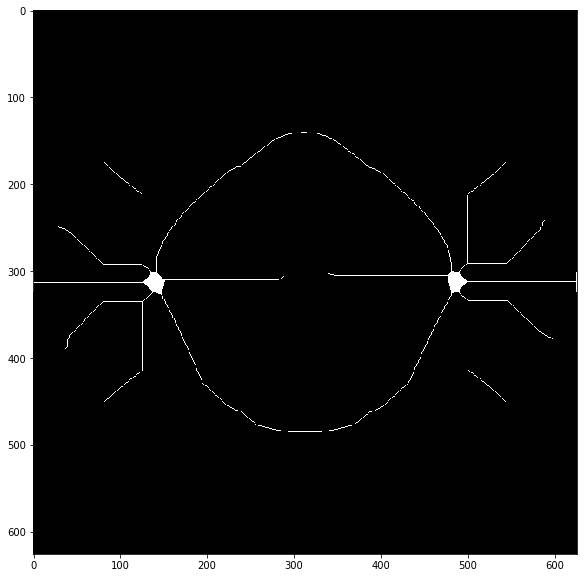

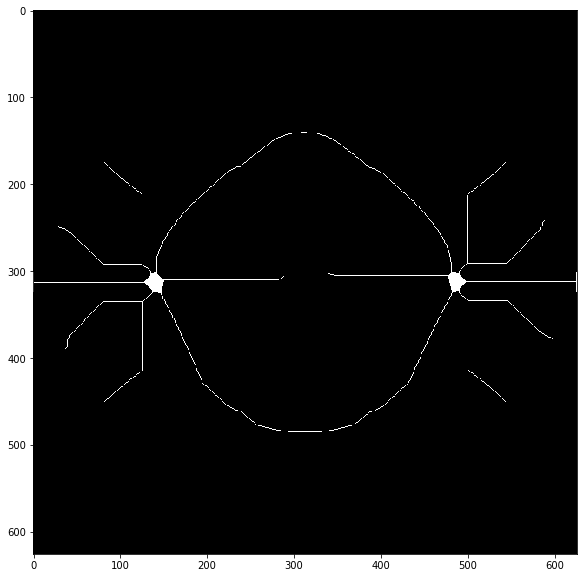

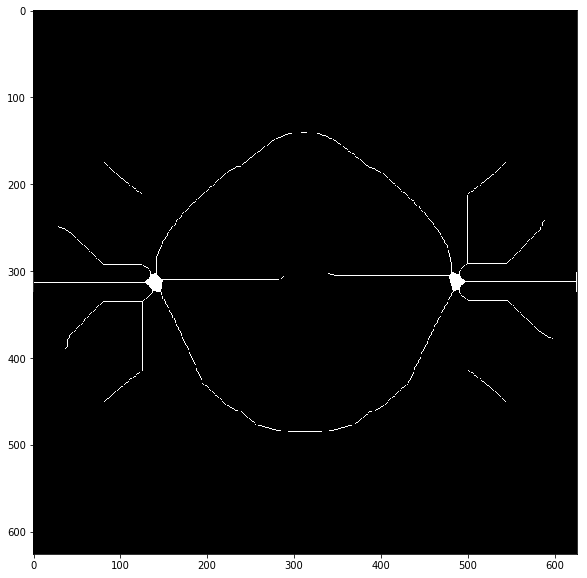

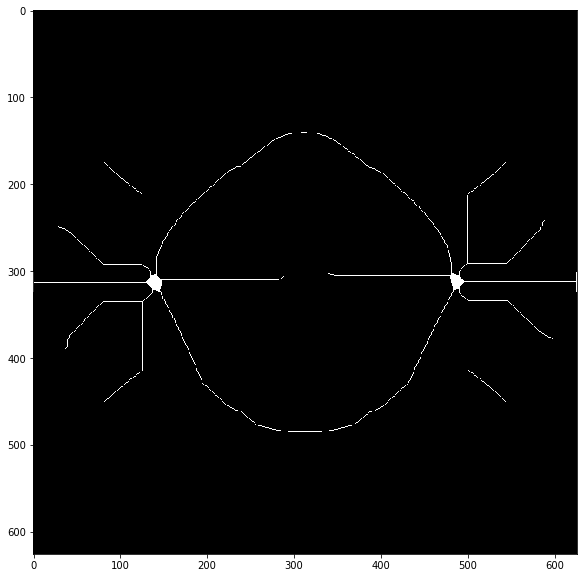

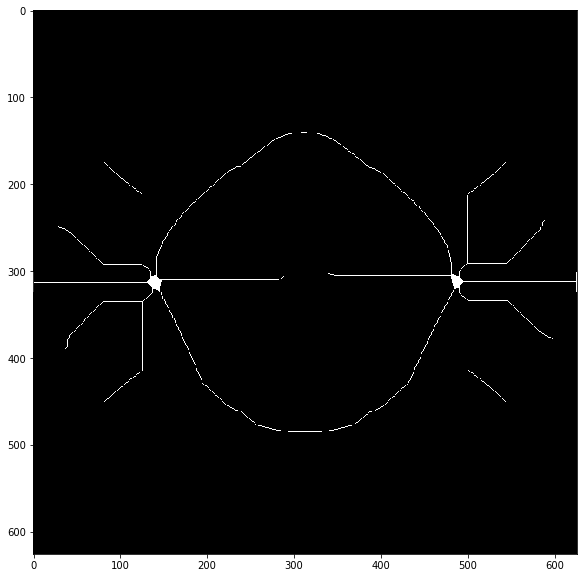

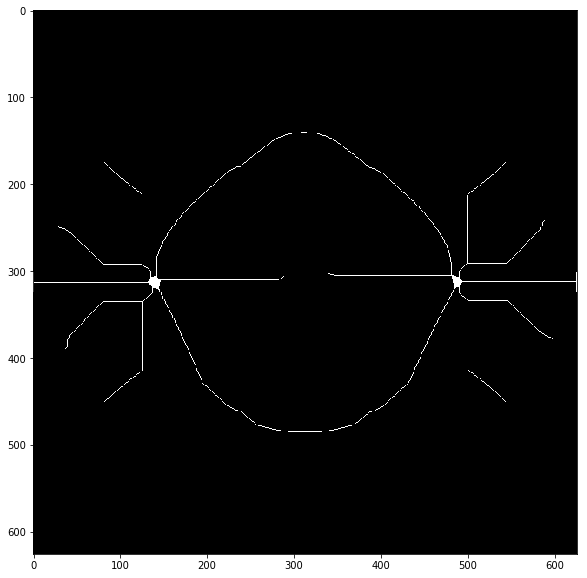

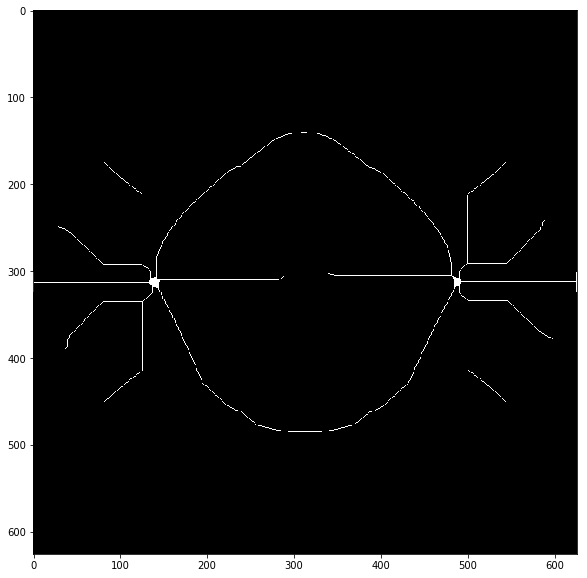

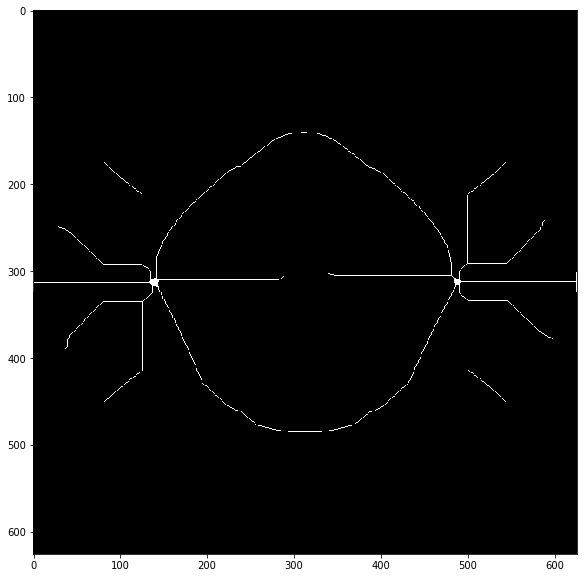

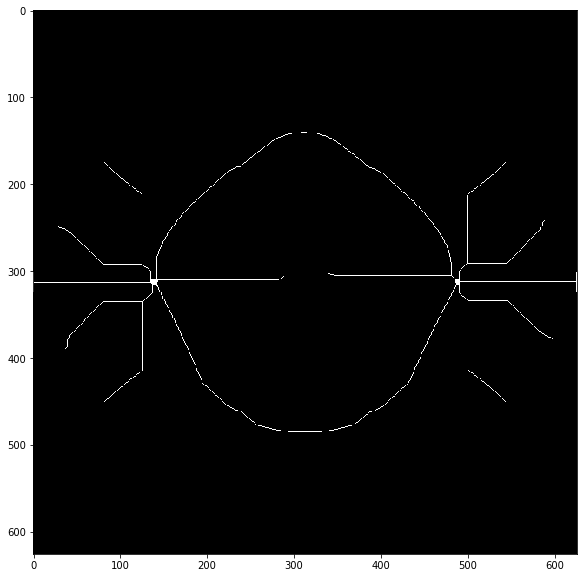

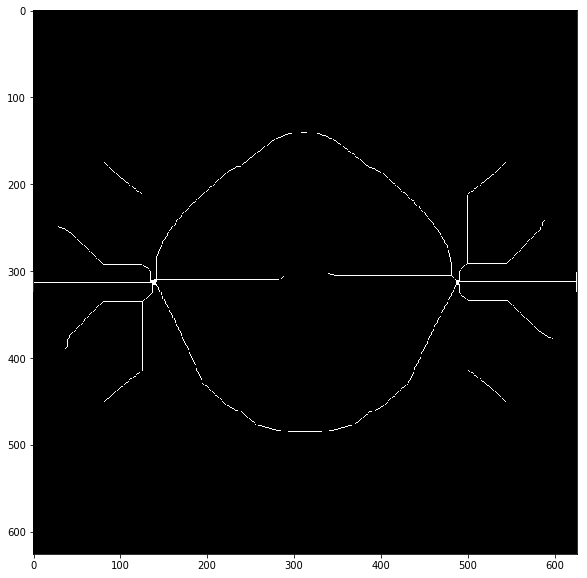

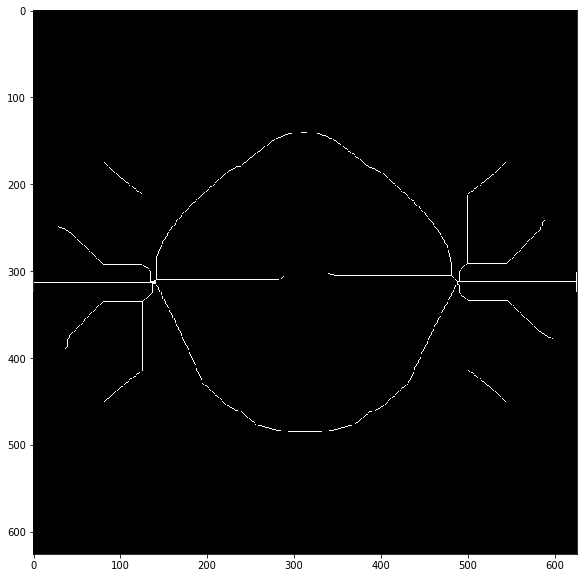

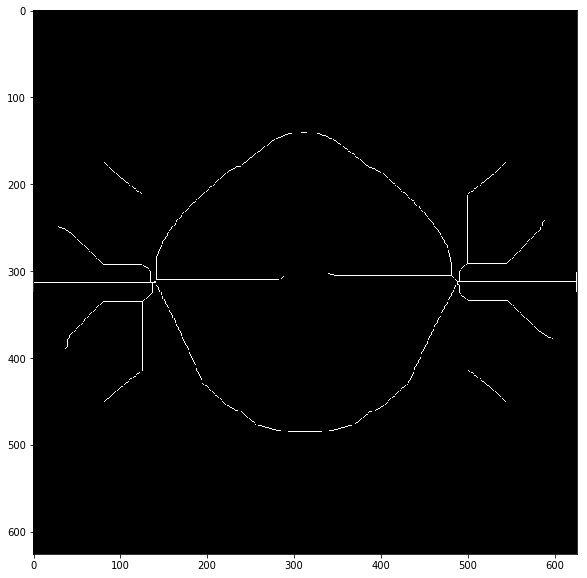

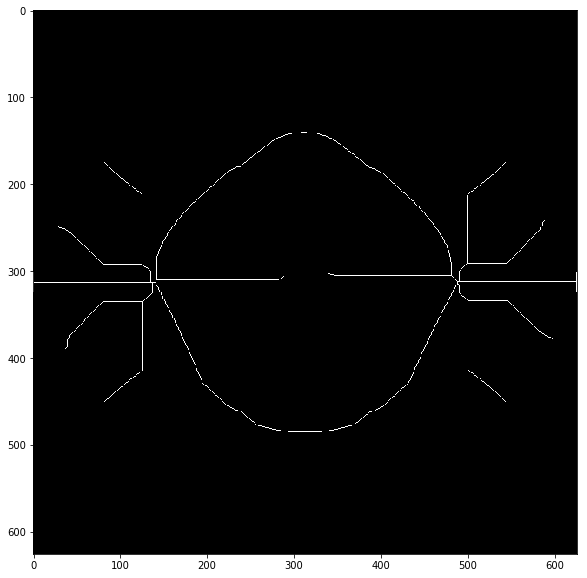

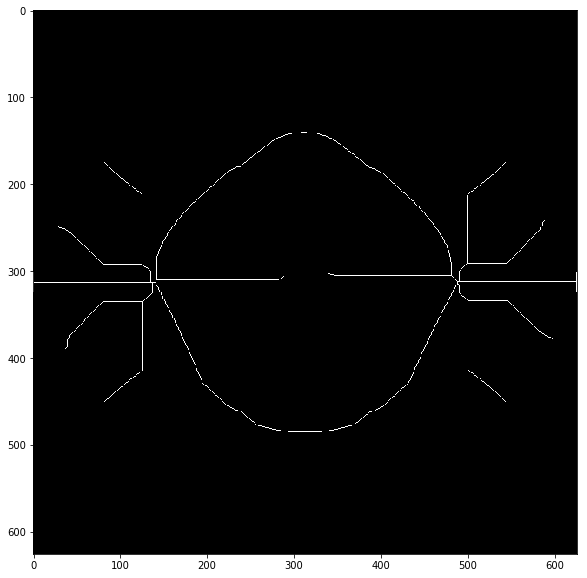

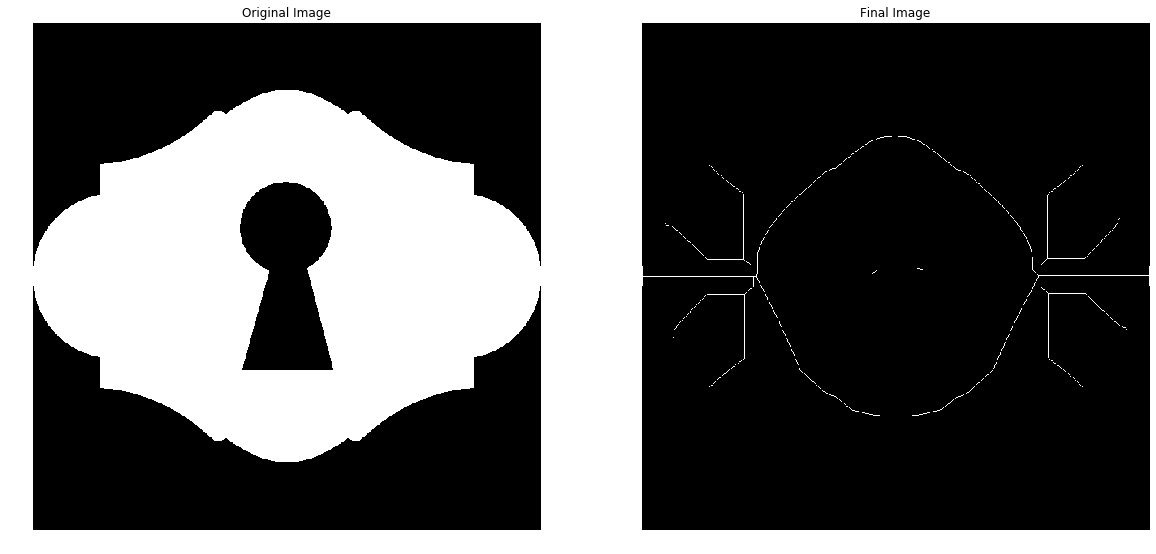

In [7]:
solid = cv2.imread("images/1_2.jpg",0)
i,ret = cv2.threshold(solid,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret = 255 - ret
ret = np.uint8(ret/255)
out = skeletonize(ret, True)
display(ret, out)

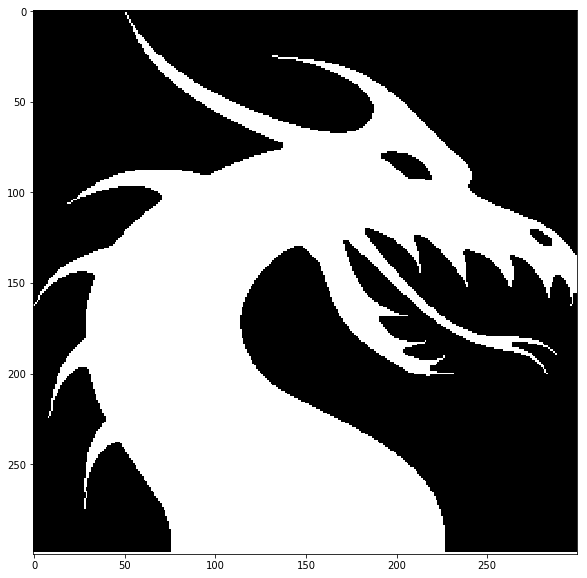

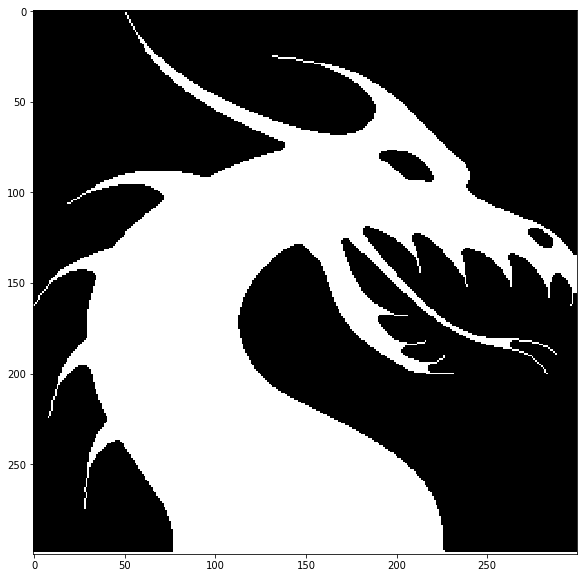

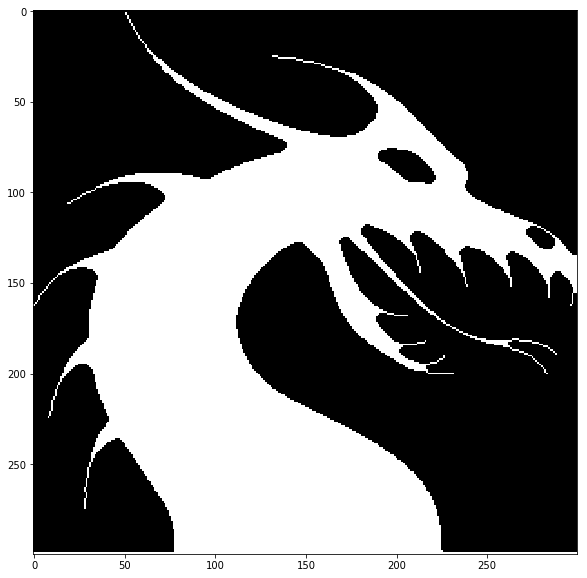

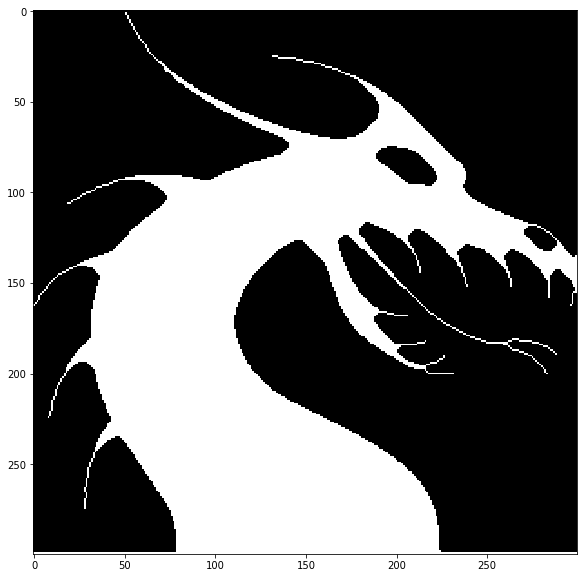

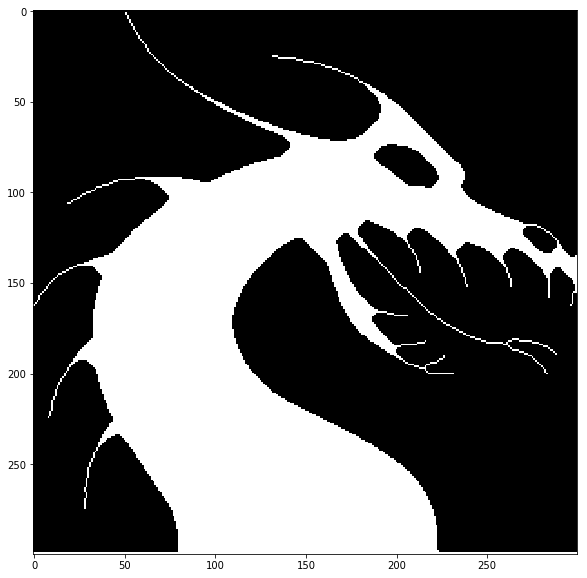

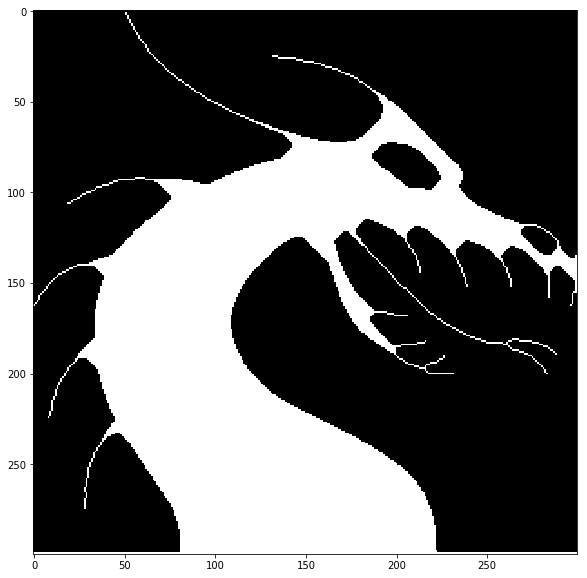

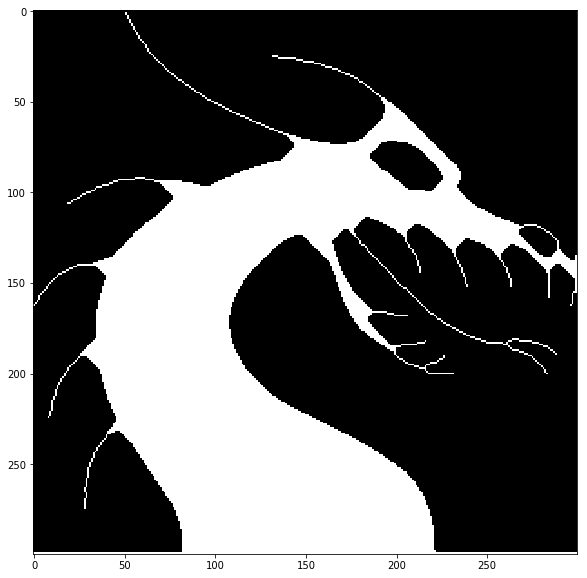

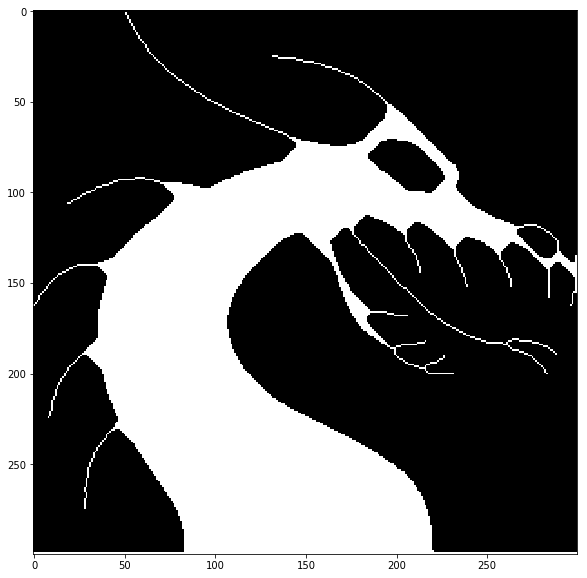

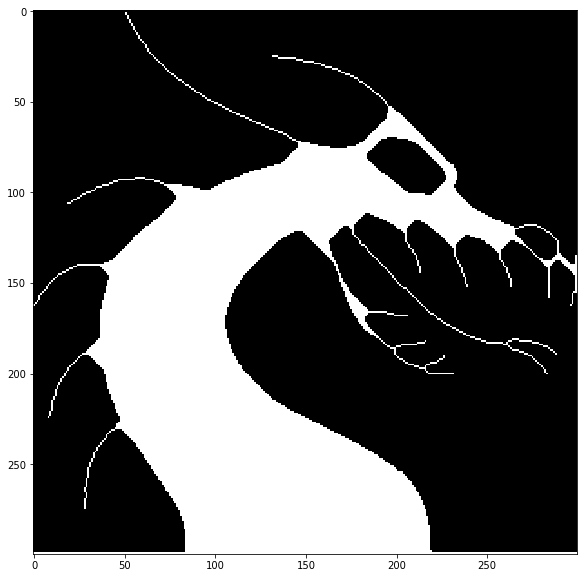

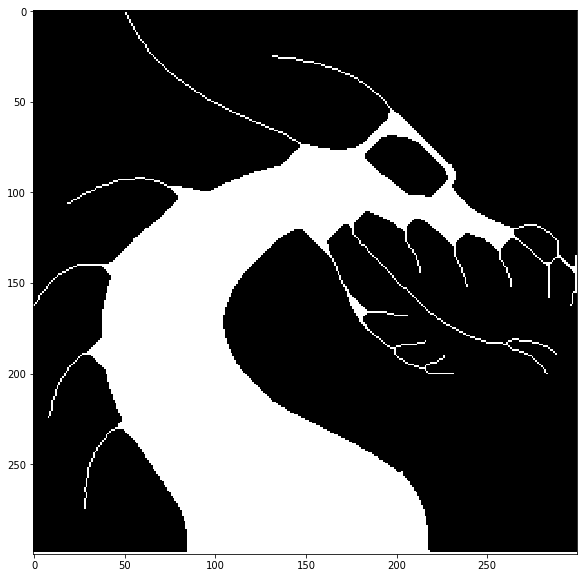

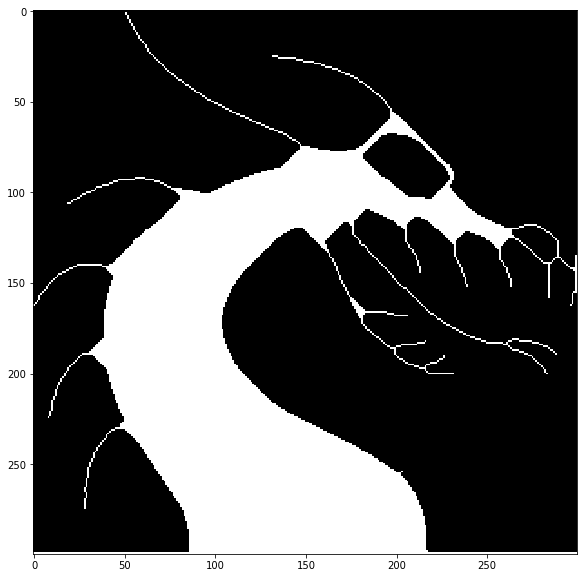

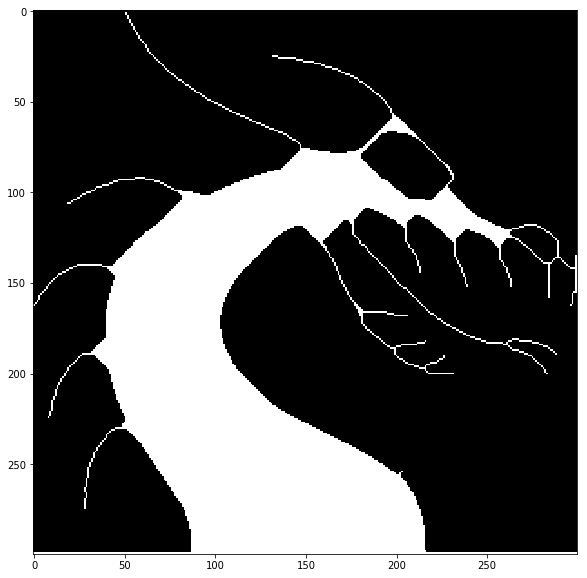

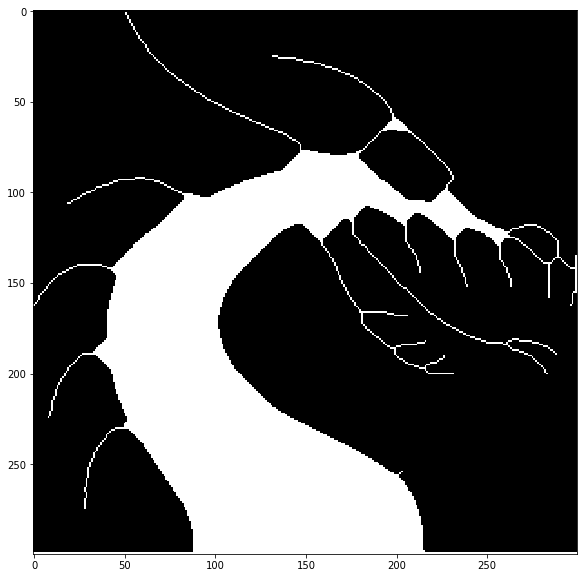

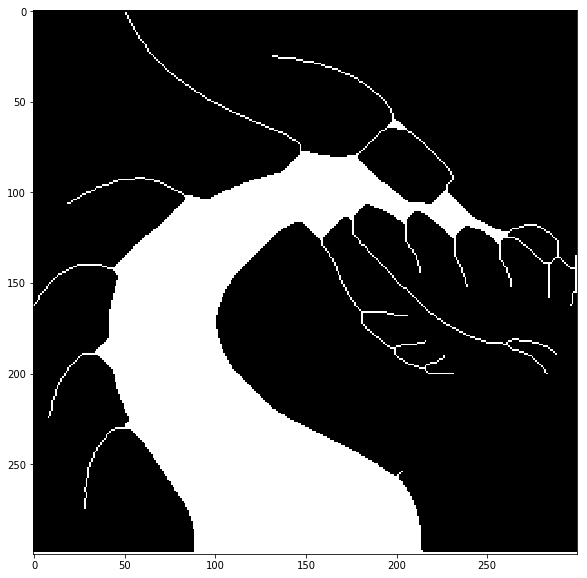

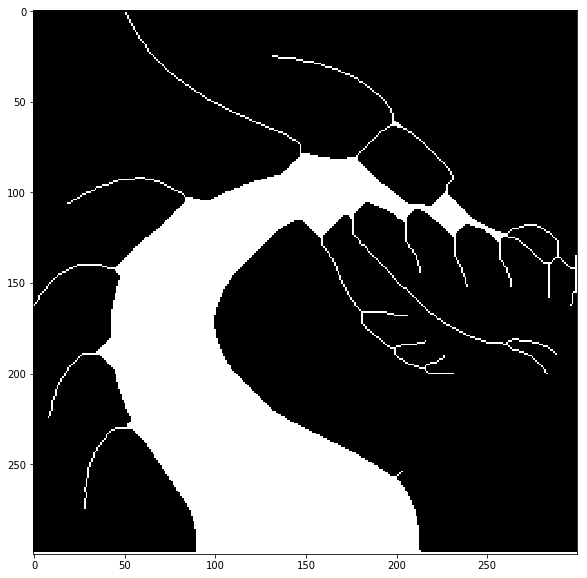

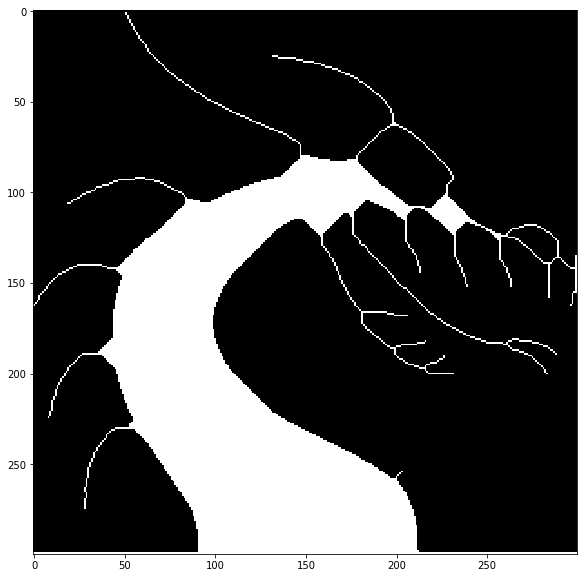

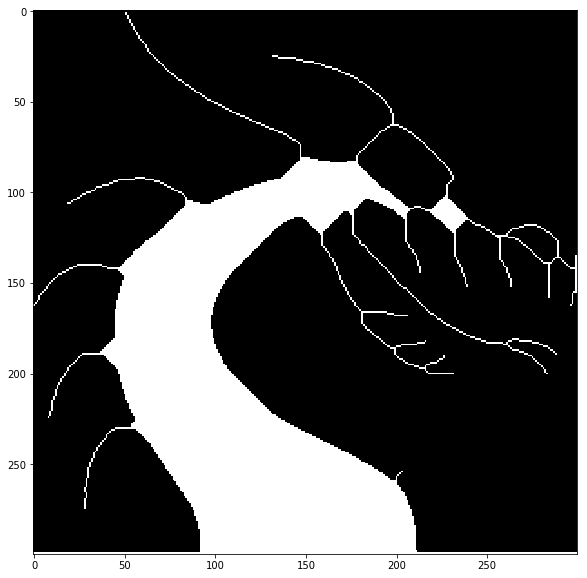

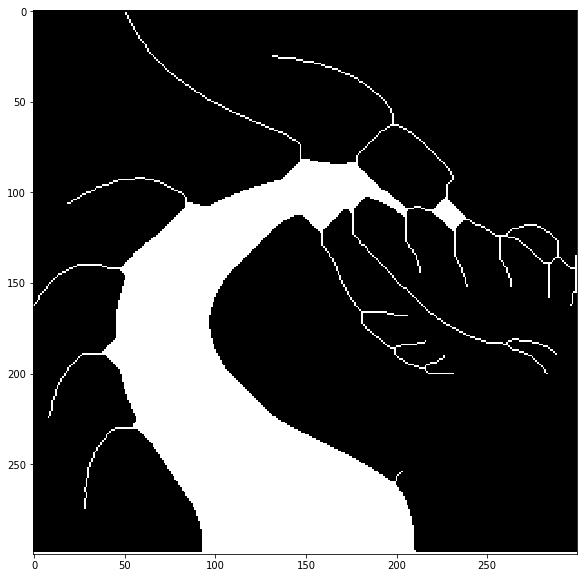

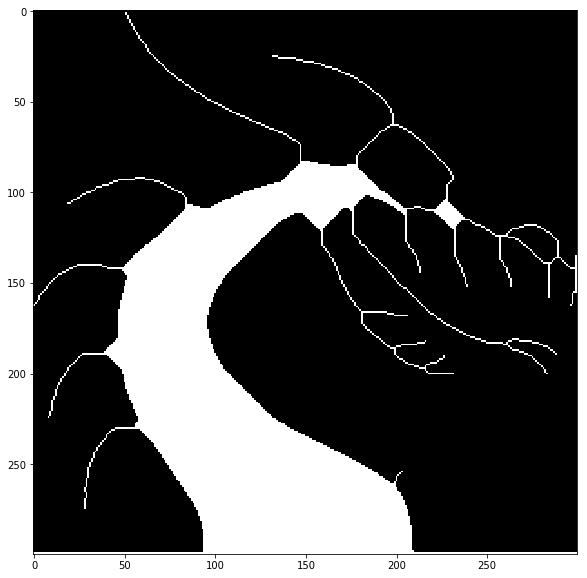

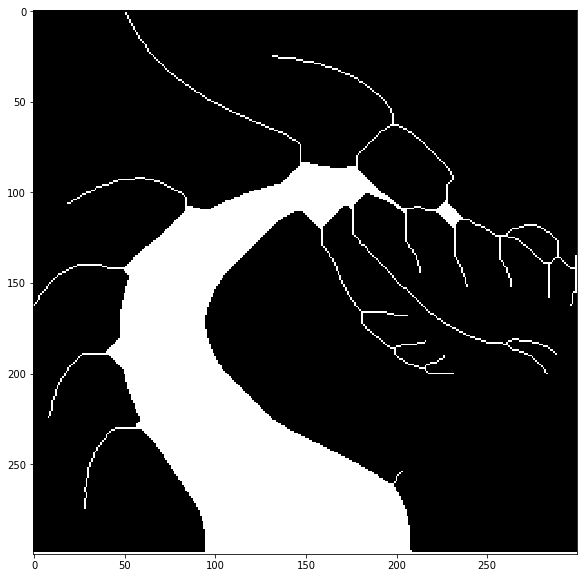

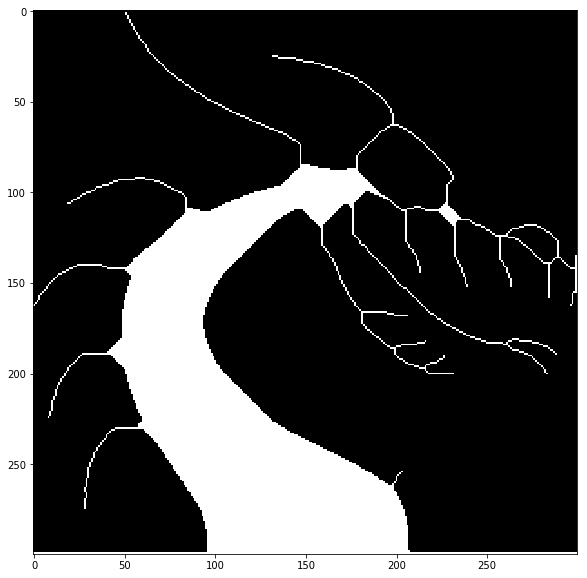

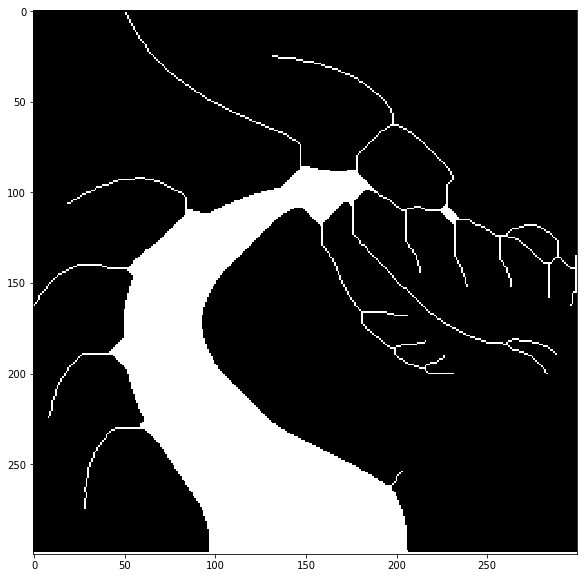

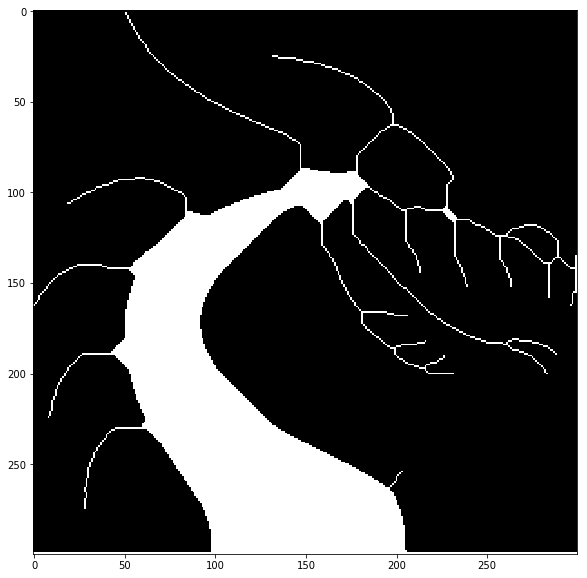

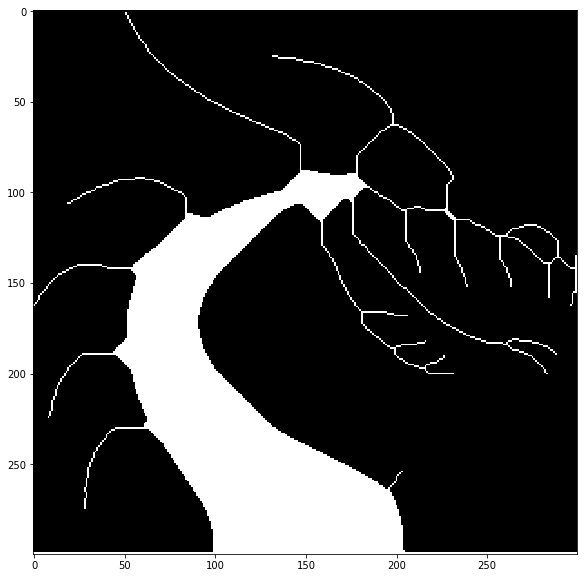

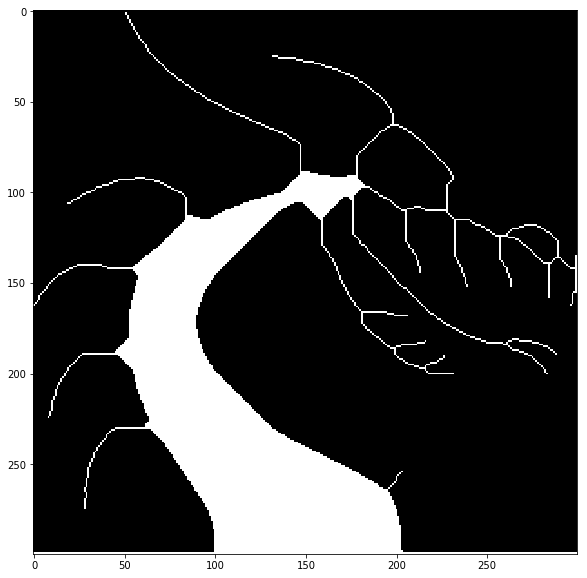

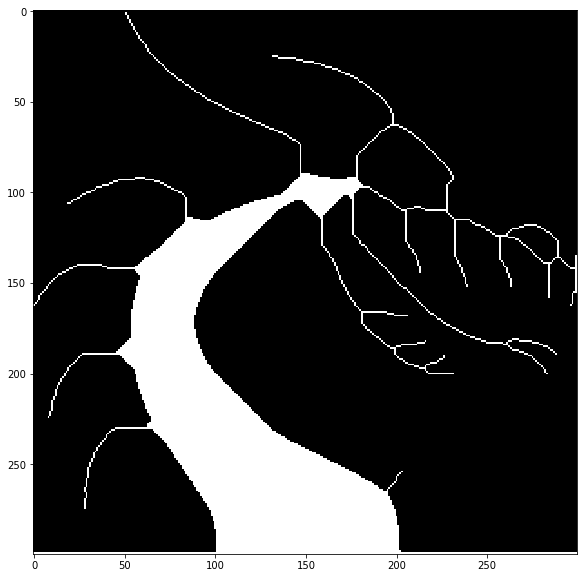

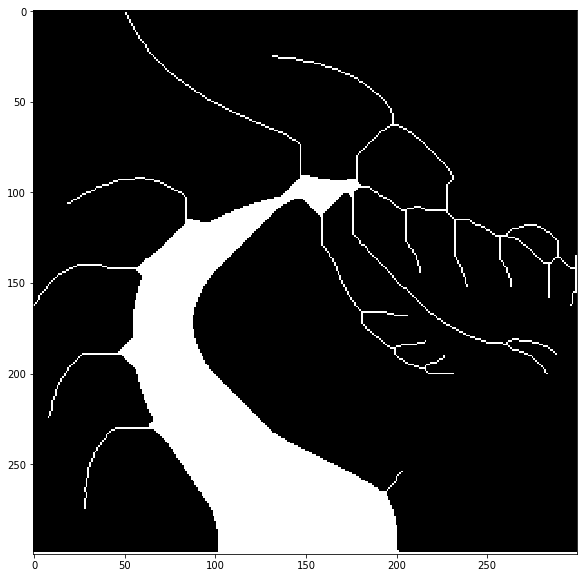

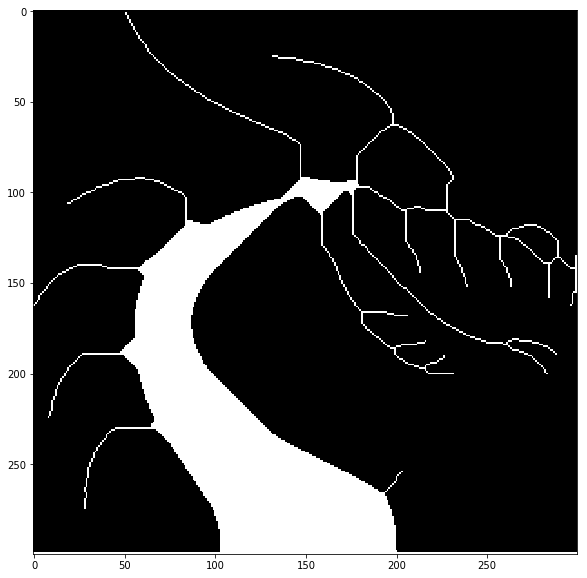

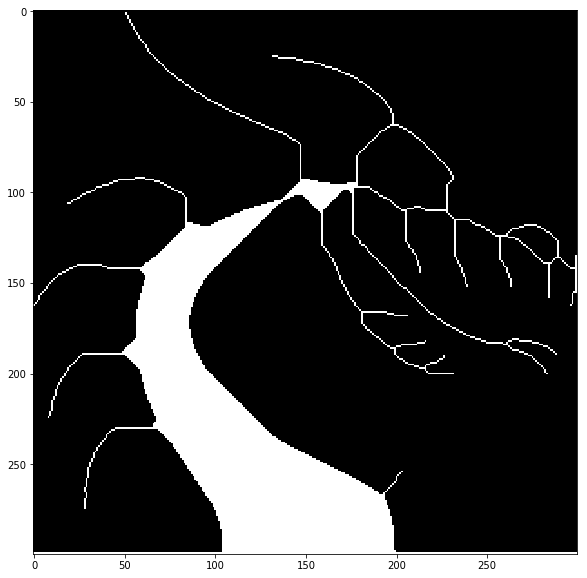

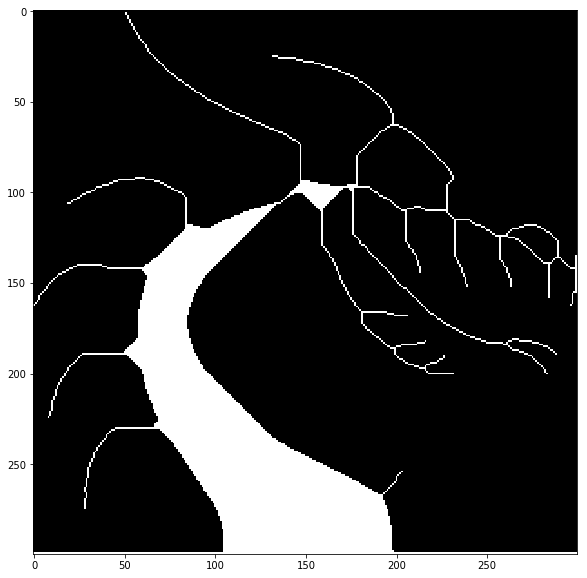

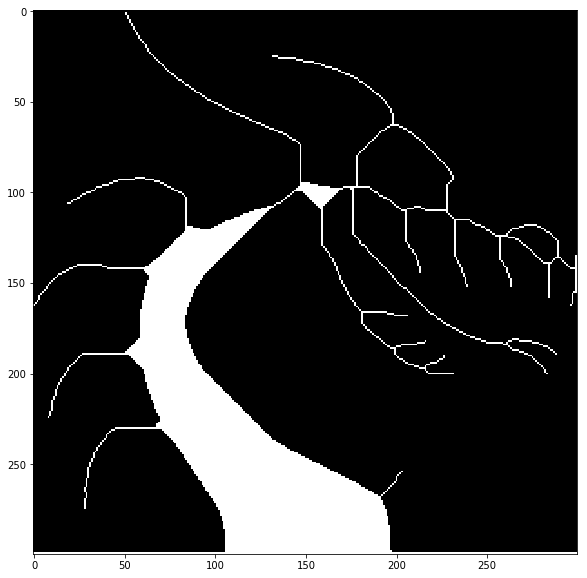

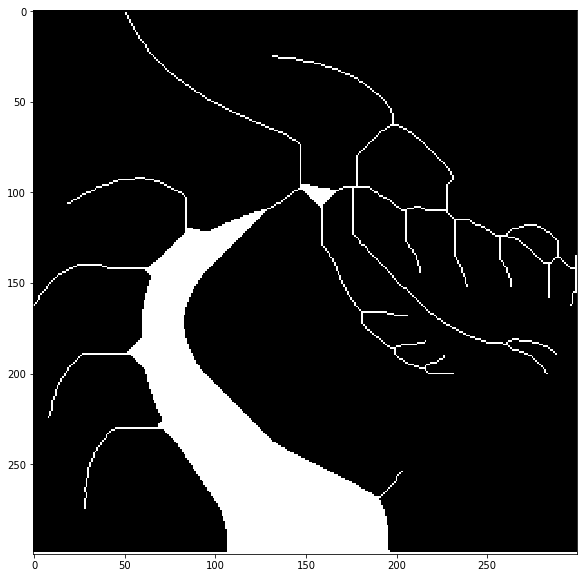

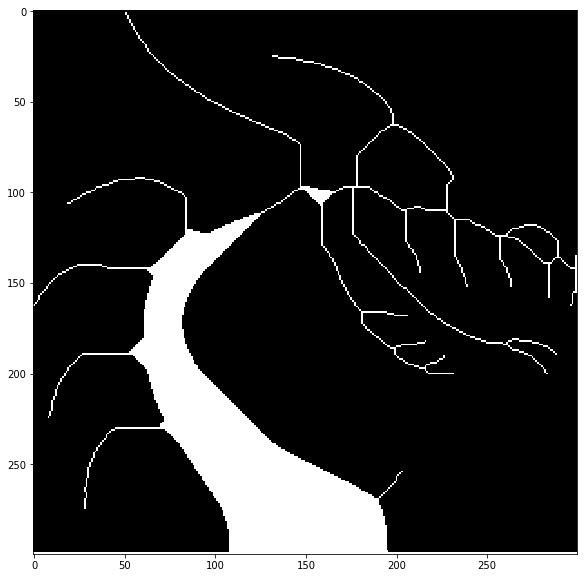

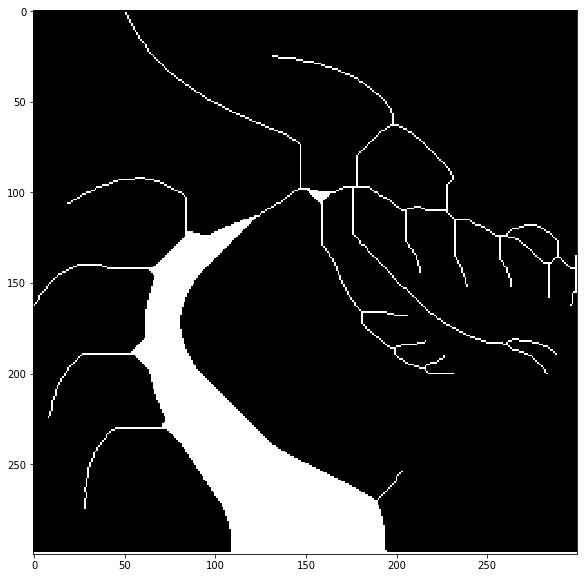

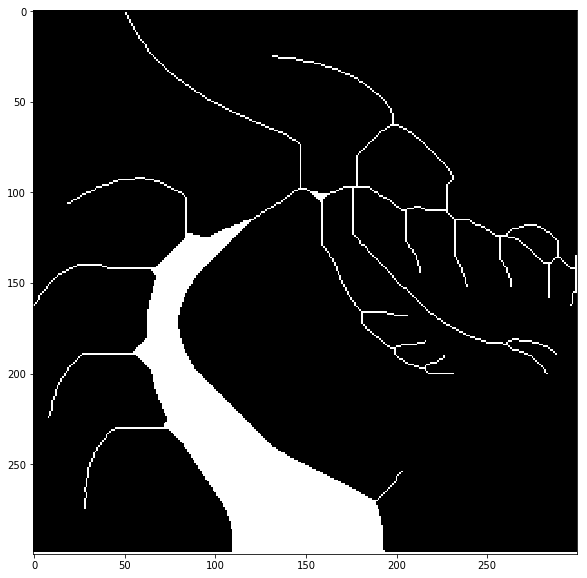

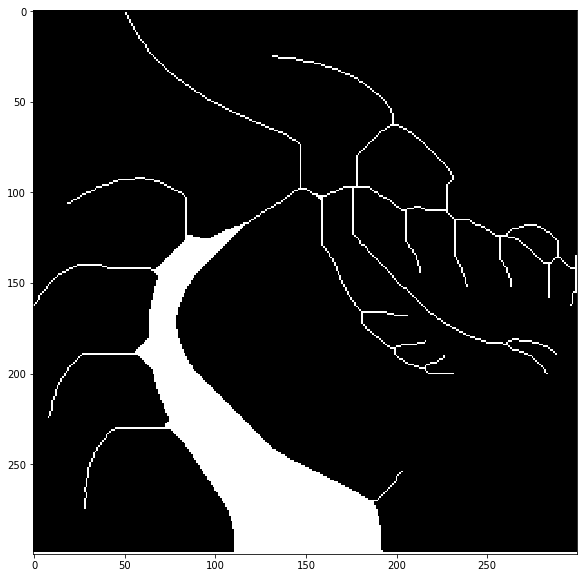

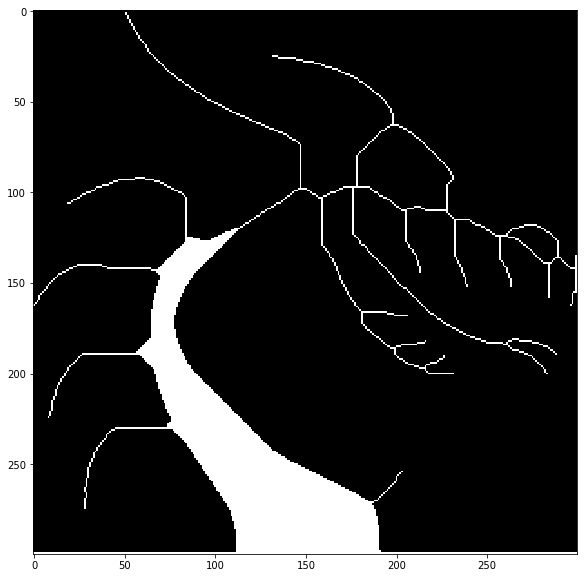

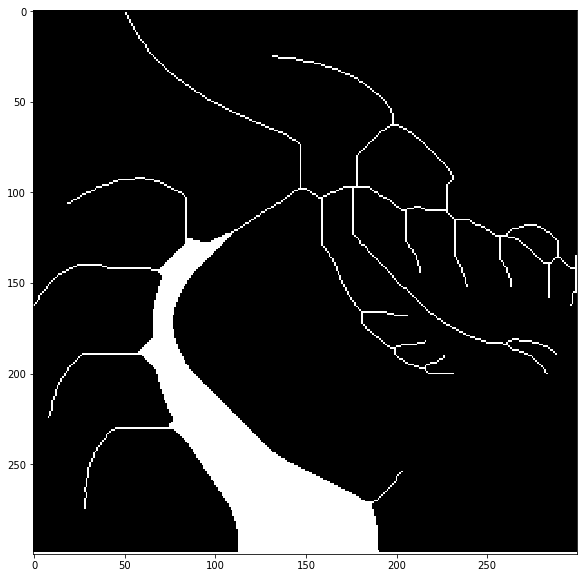

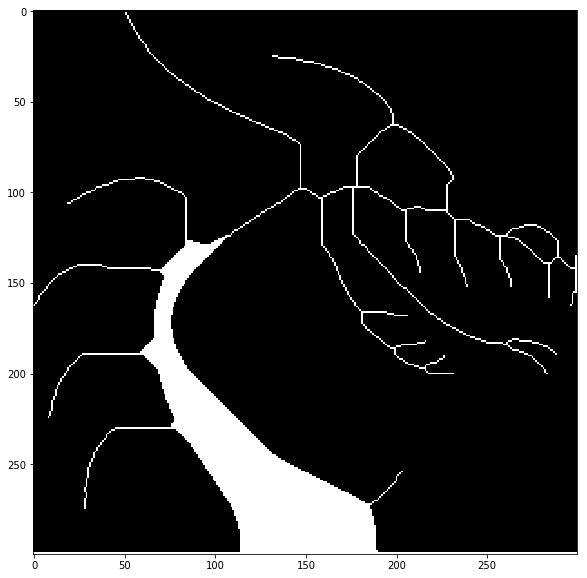

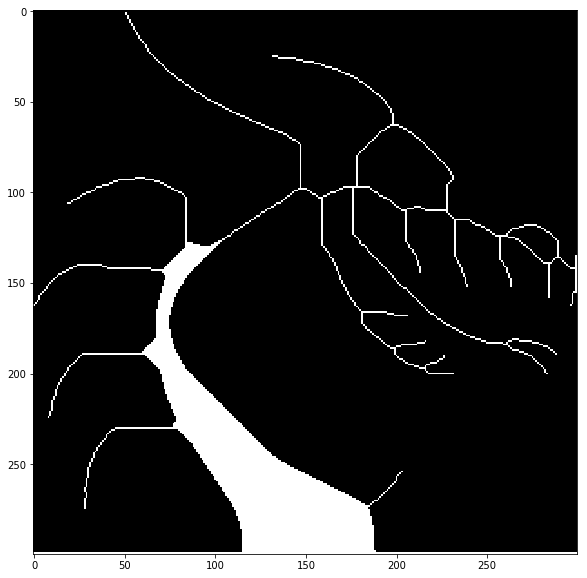

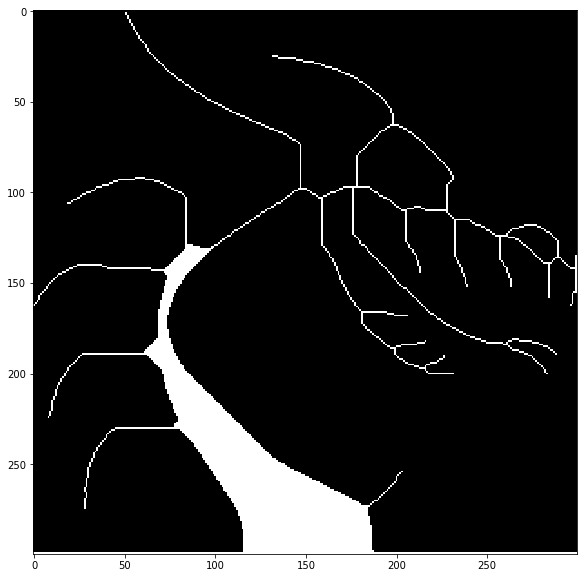

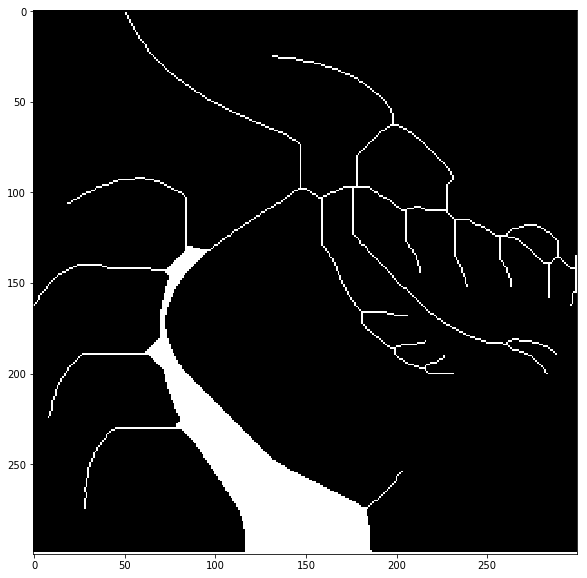

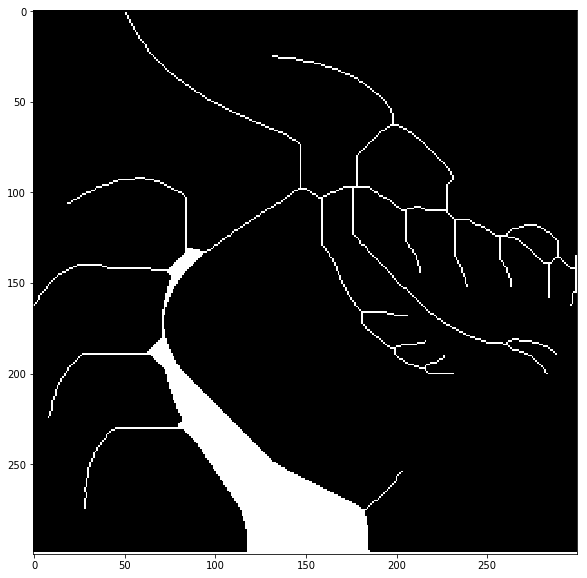

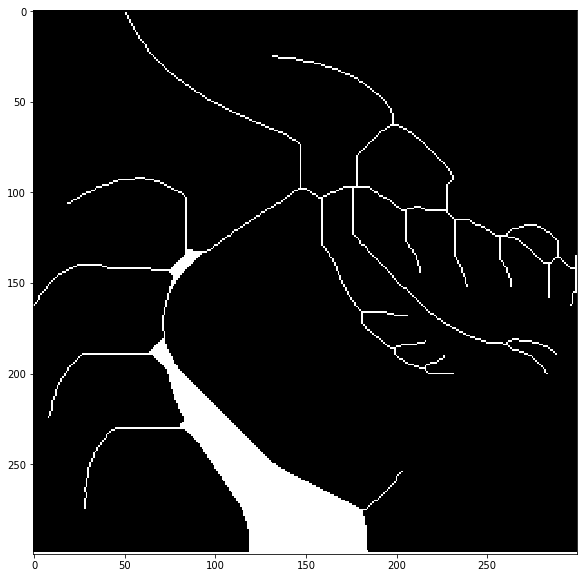

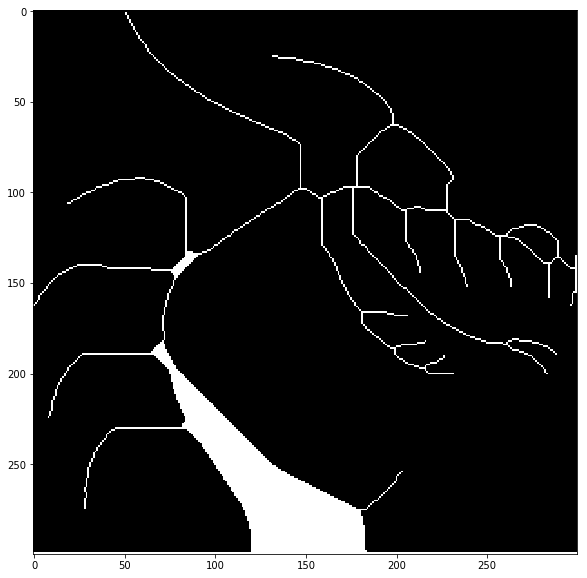

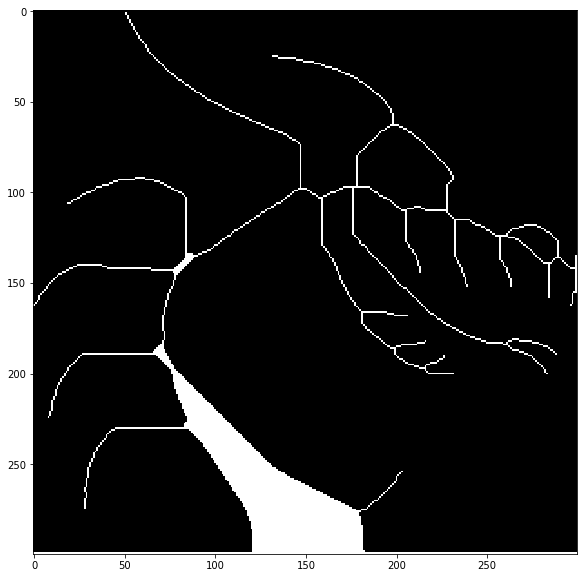

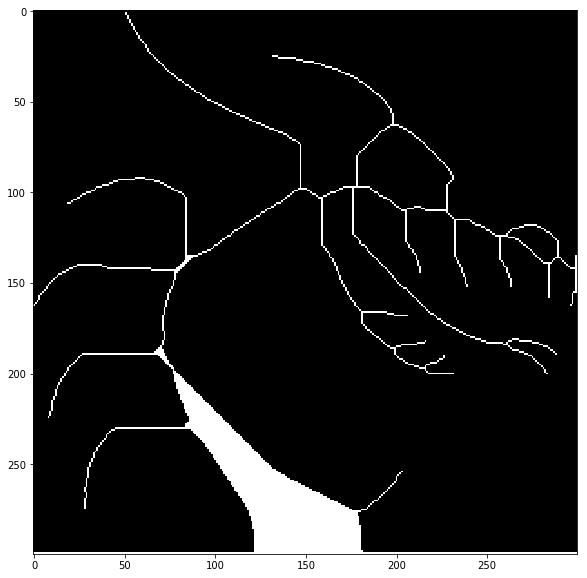

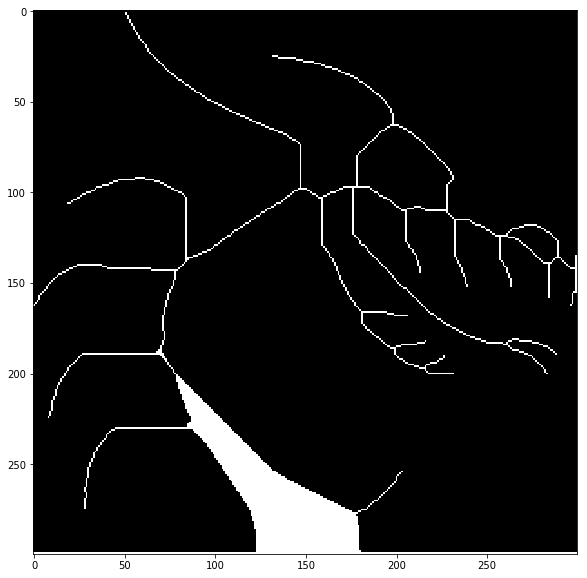

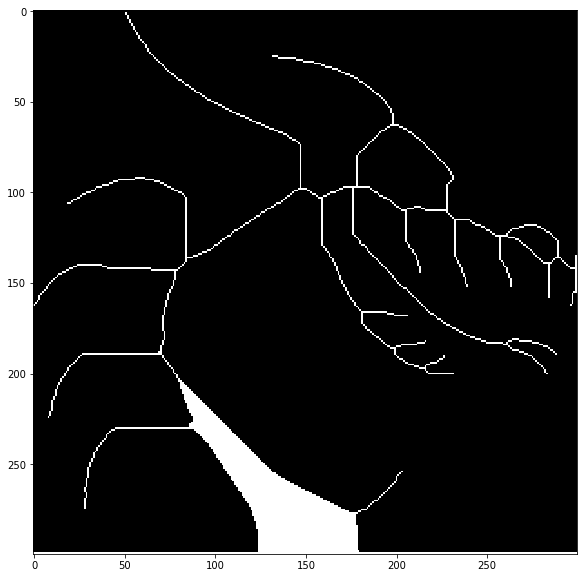

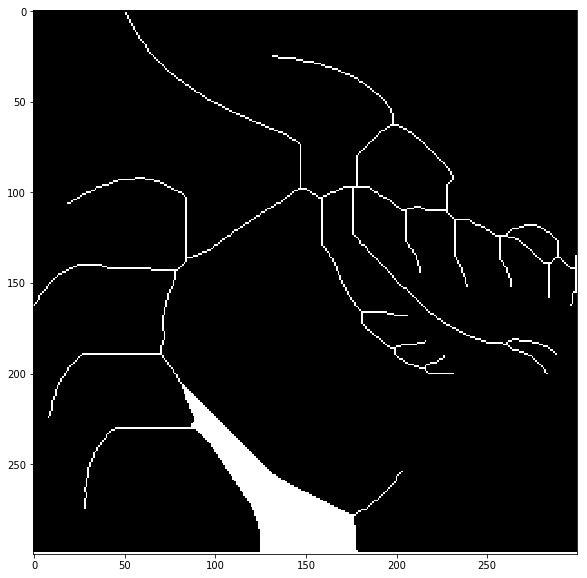

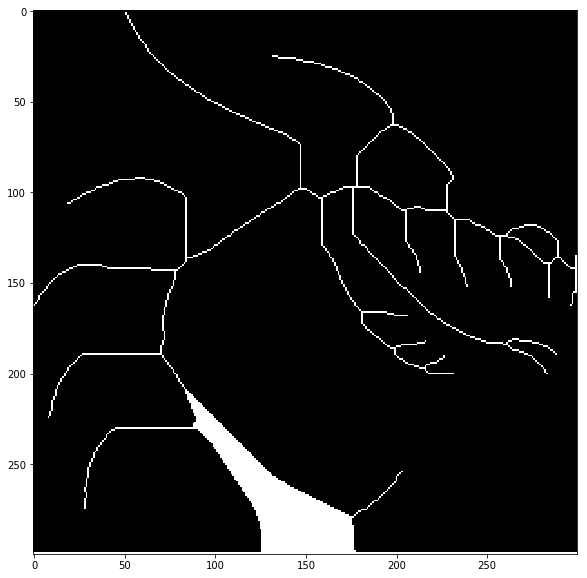

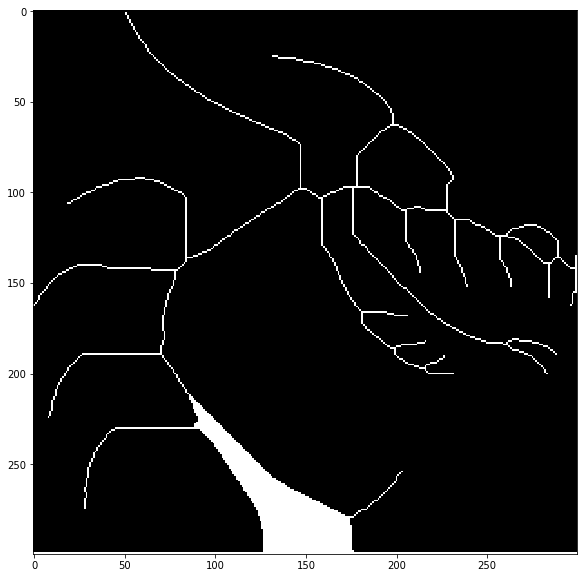

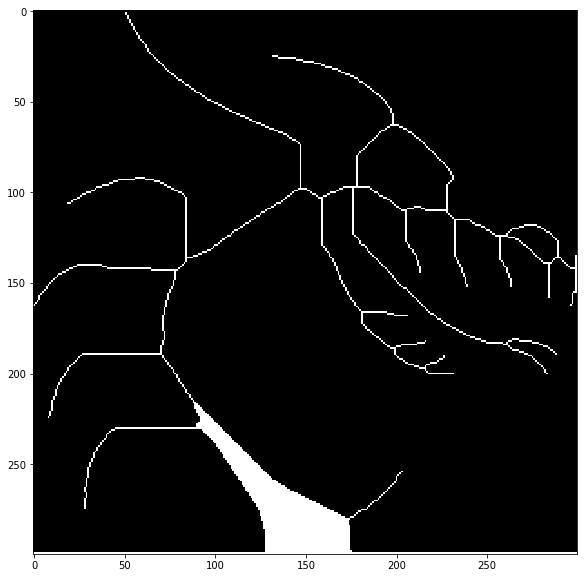

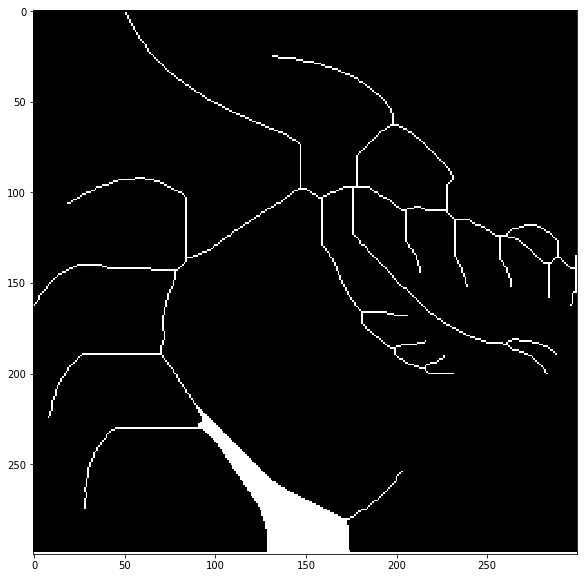

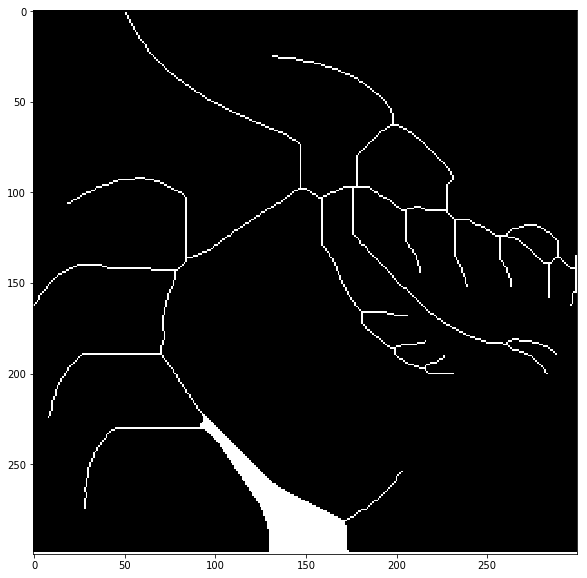

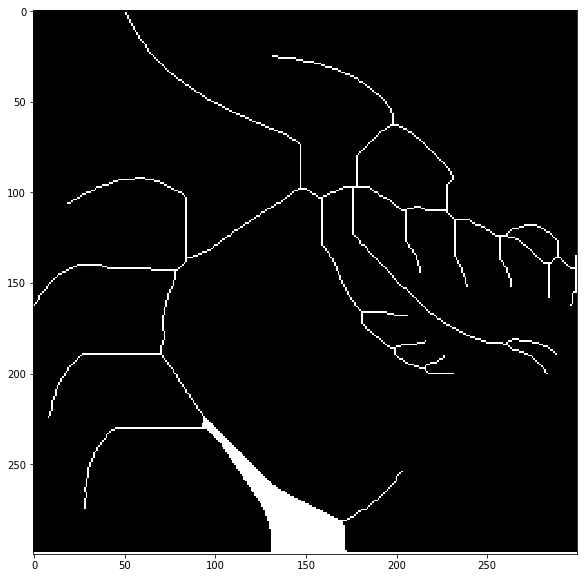

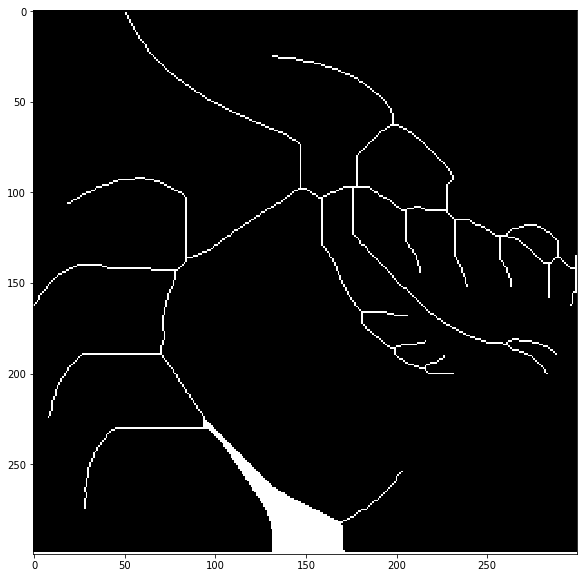

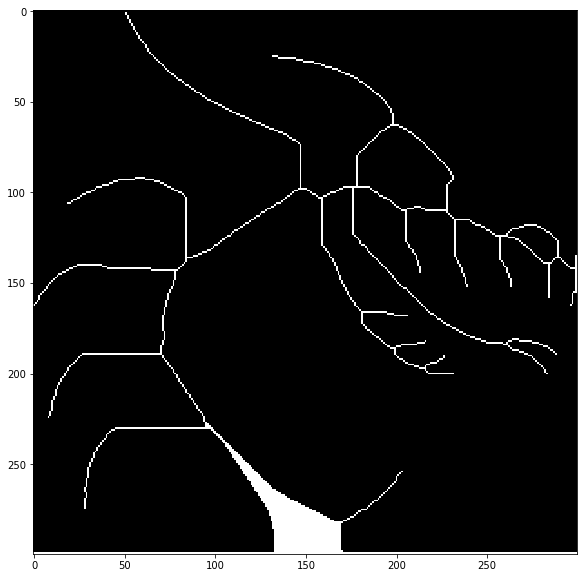

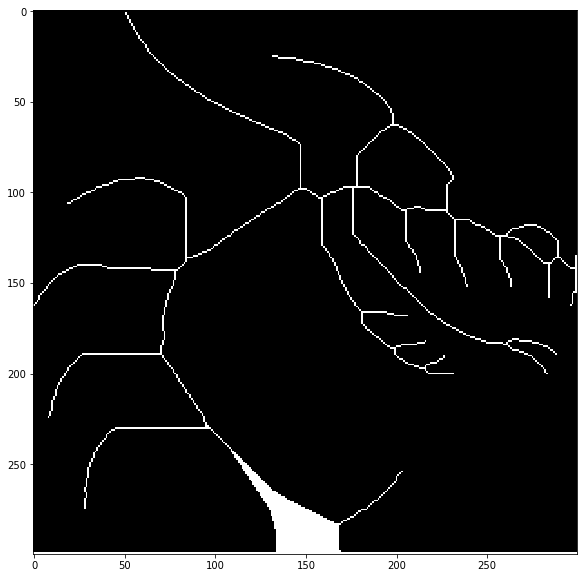

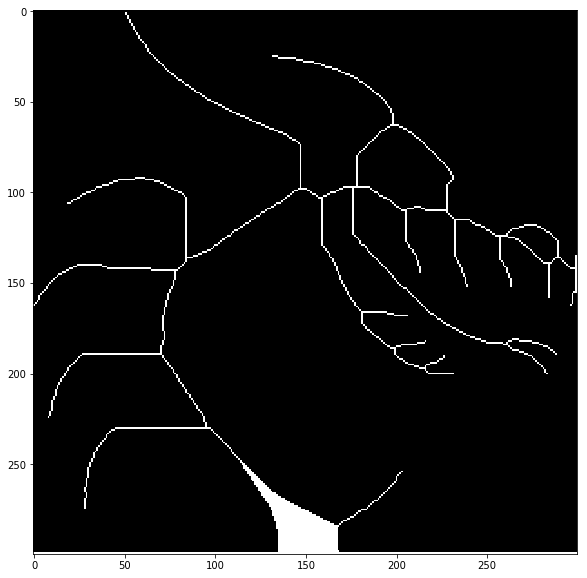

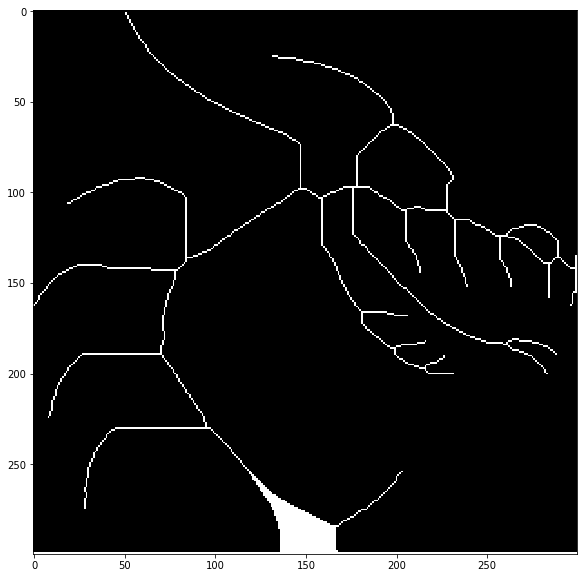

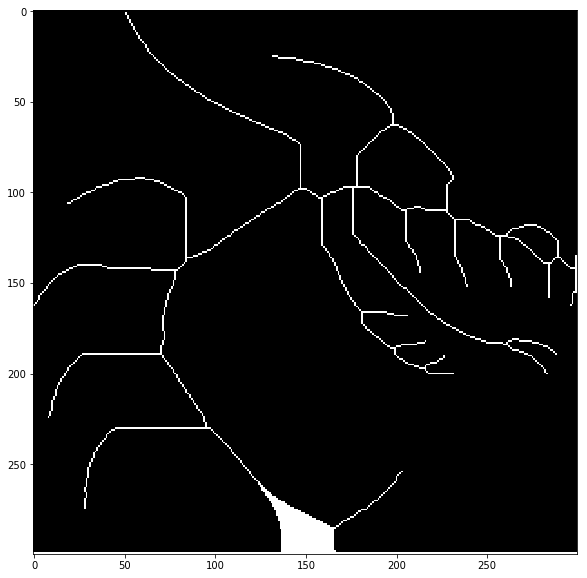

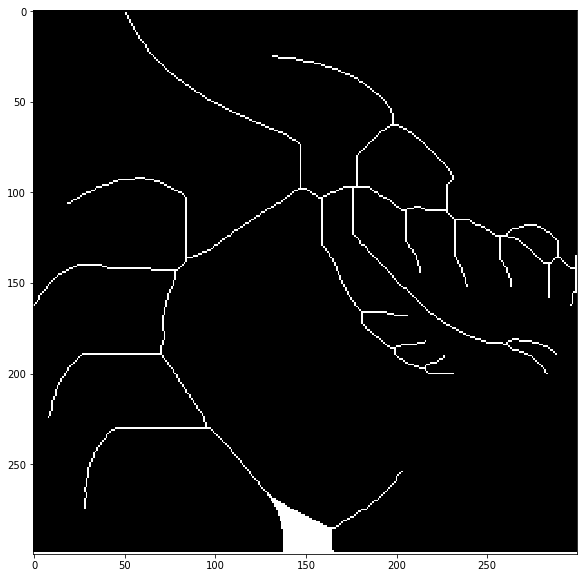

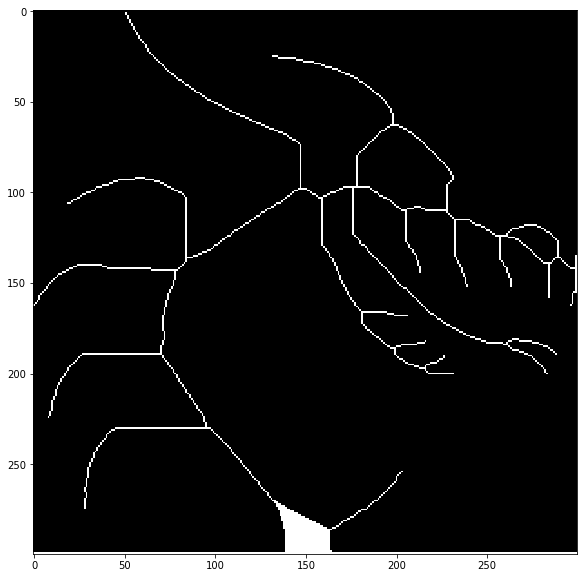

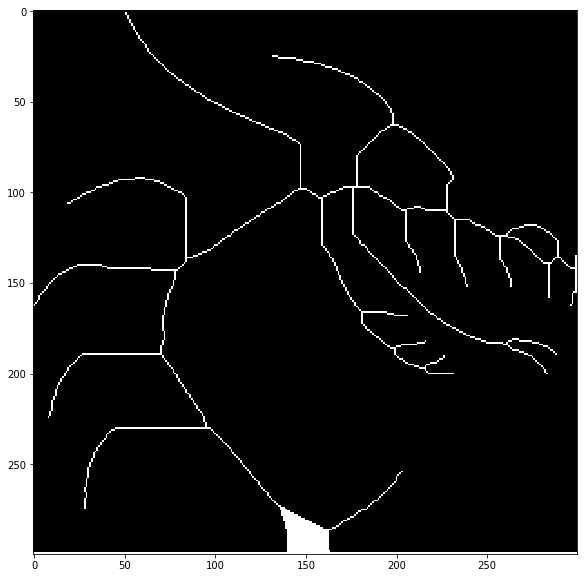

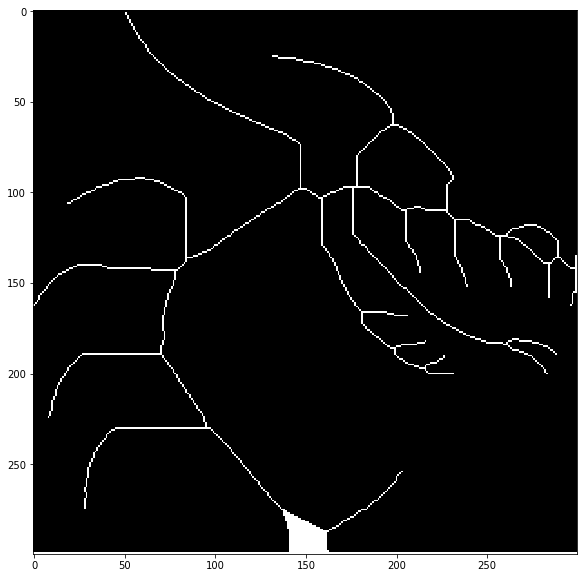

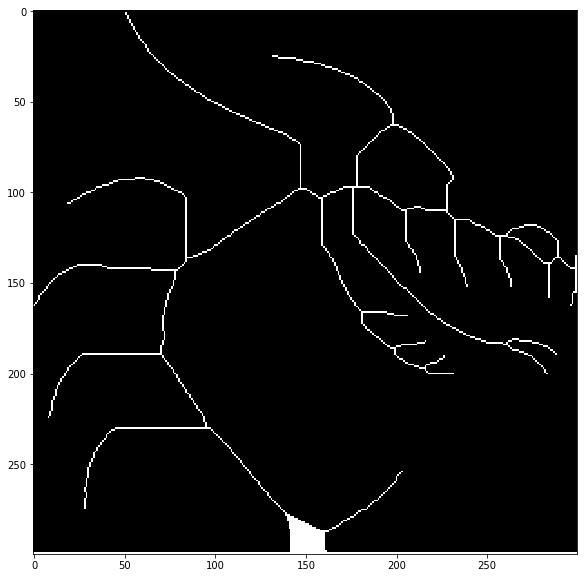

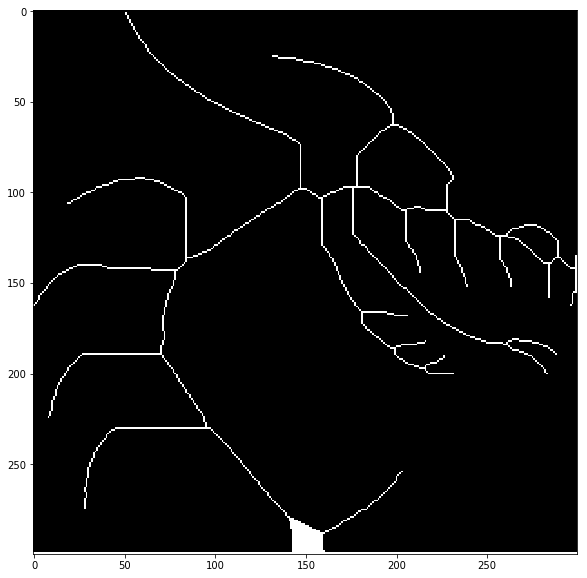

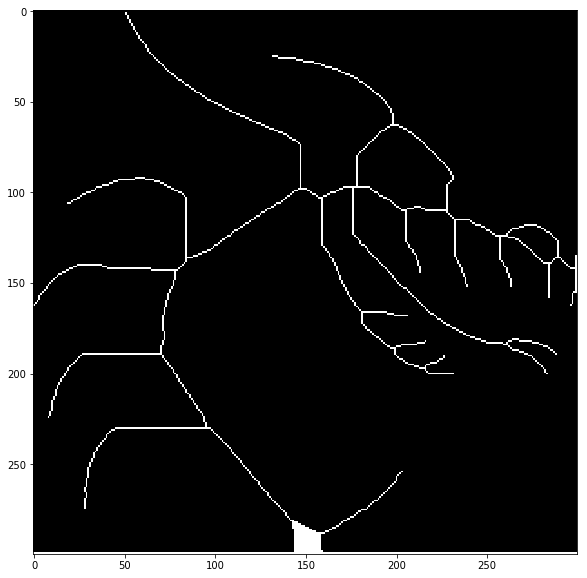

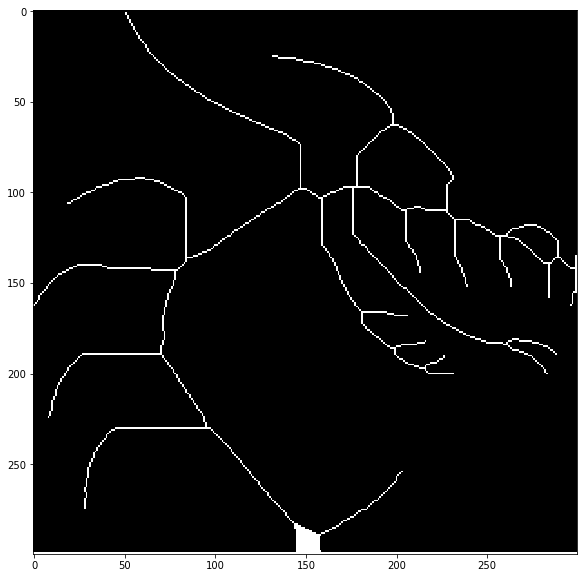

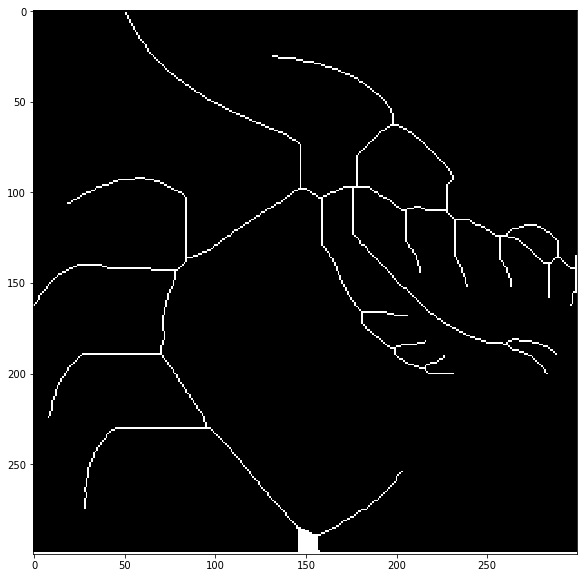

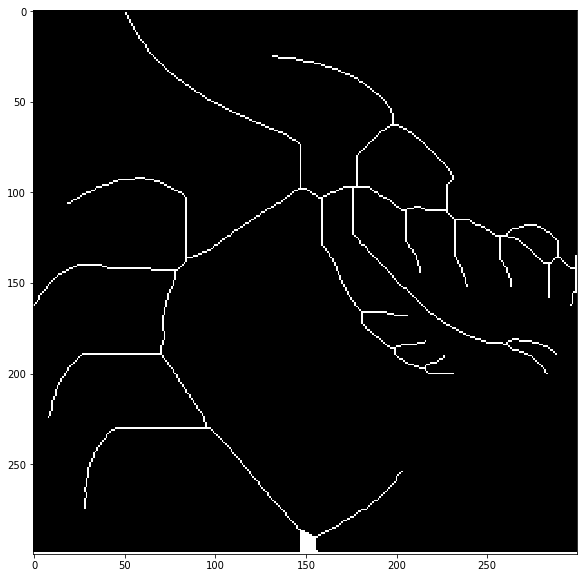

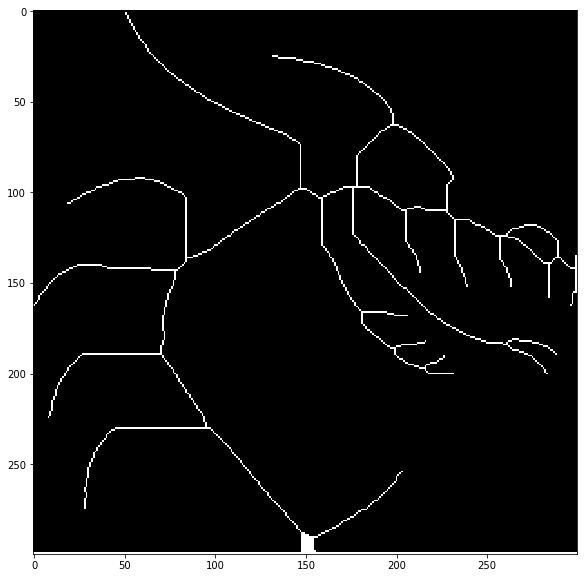

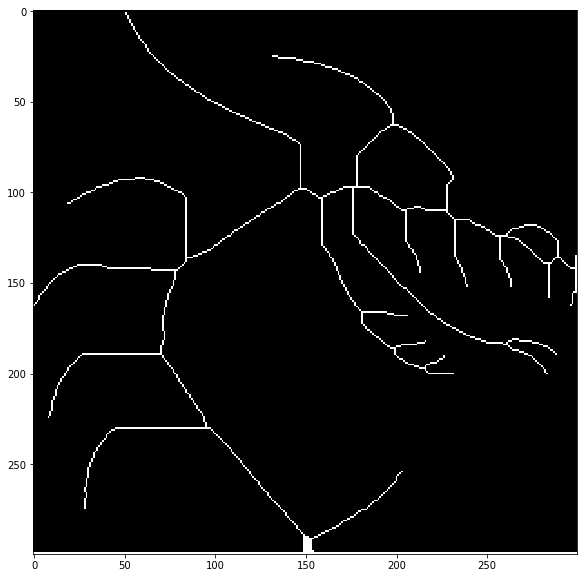

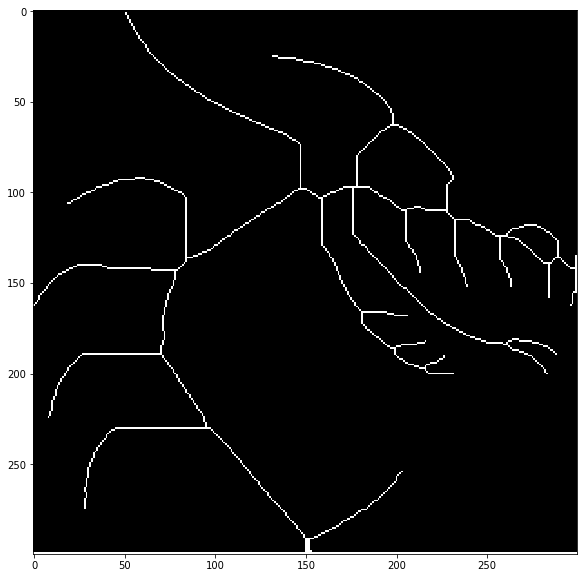

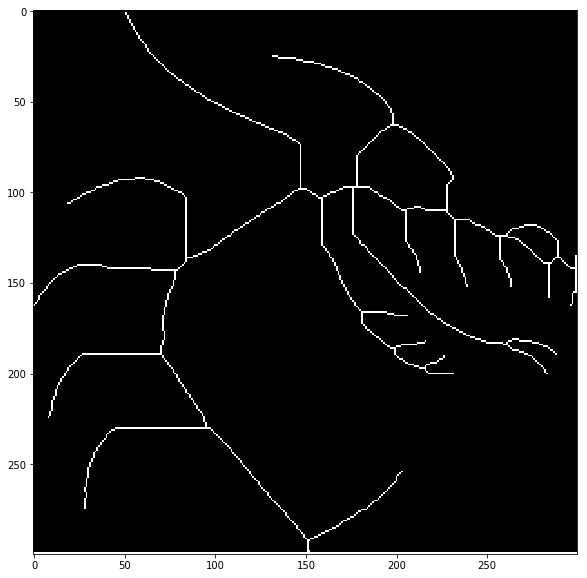

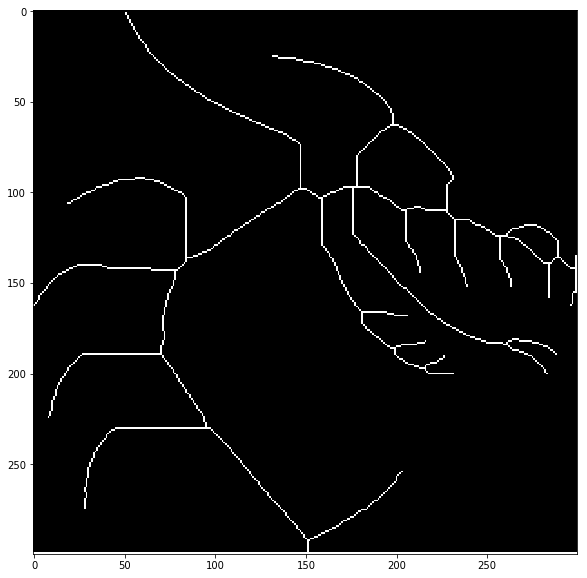

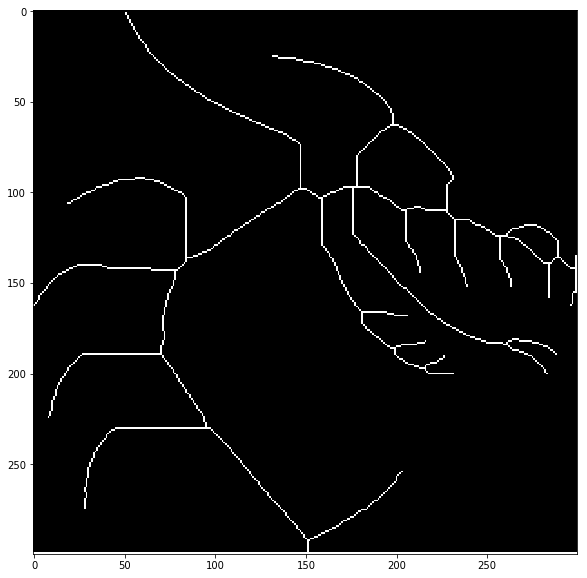

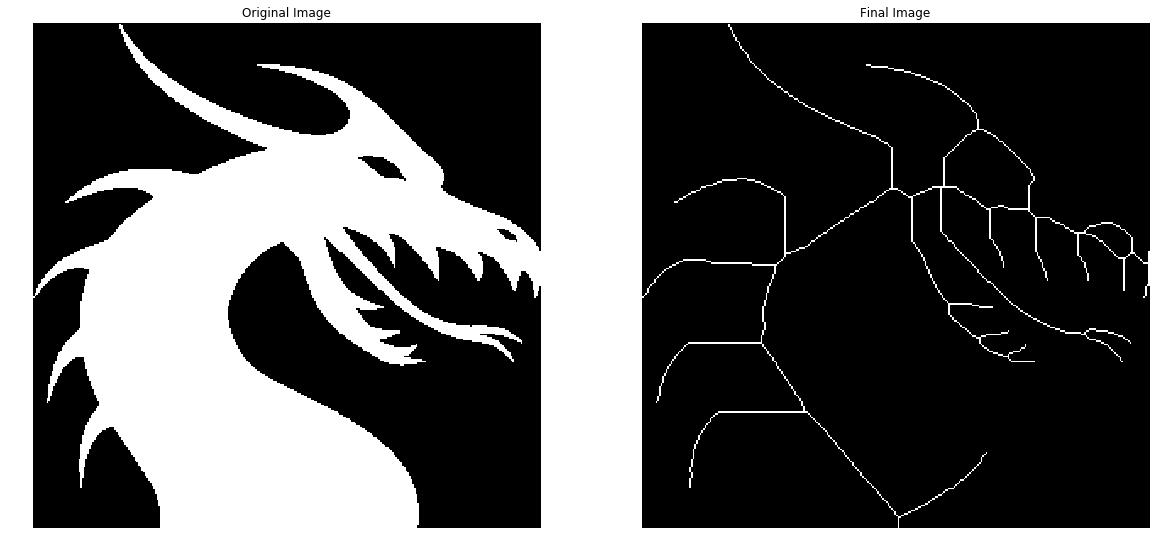

In [8]:
solid = cv2.imread("images/1_3.png",0)
i,ret = cv2.threshold(solid,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret = np.uint8(ret/255)
out = skeletonize(ret, True)
display(ret, out)

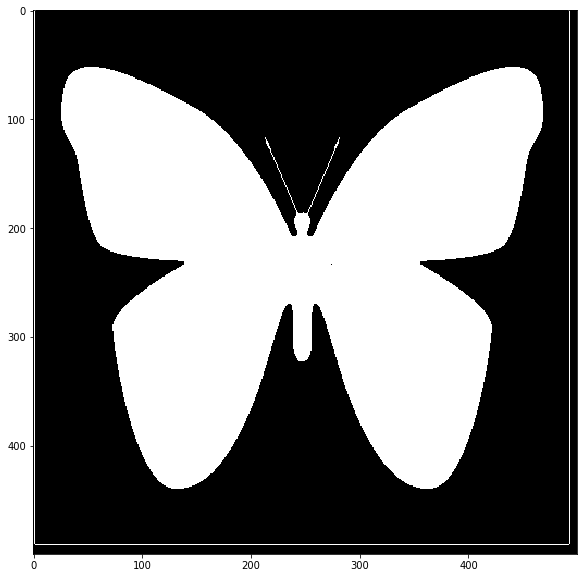

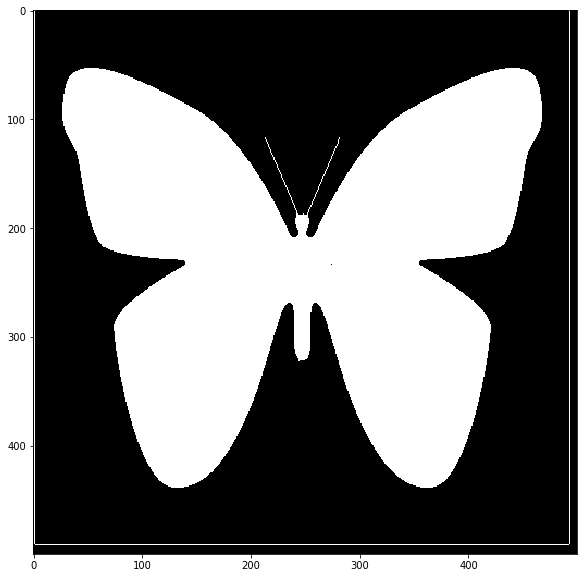

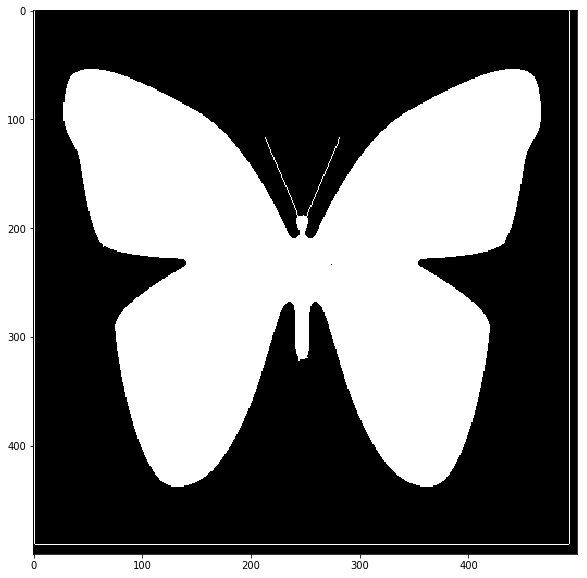

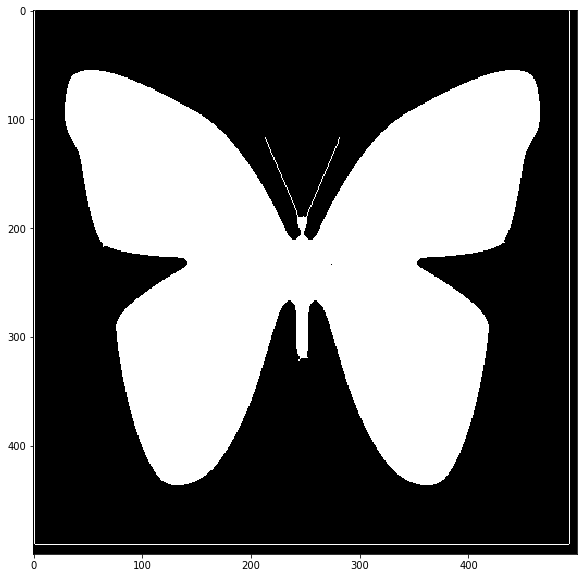

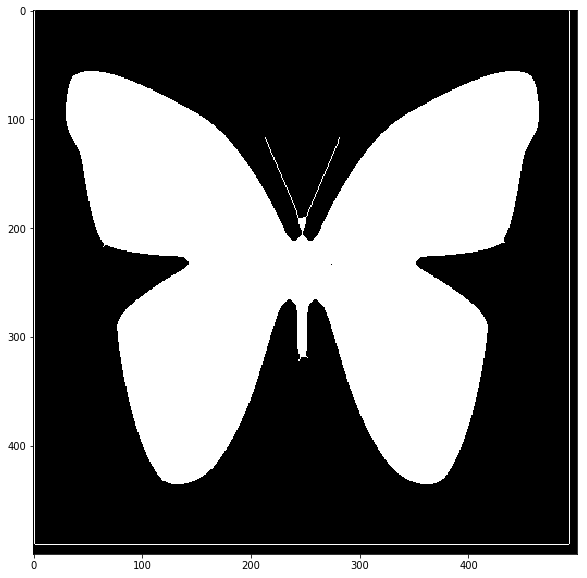

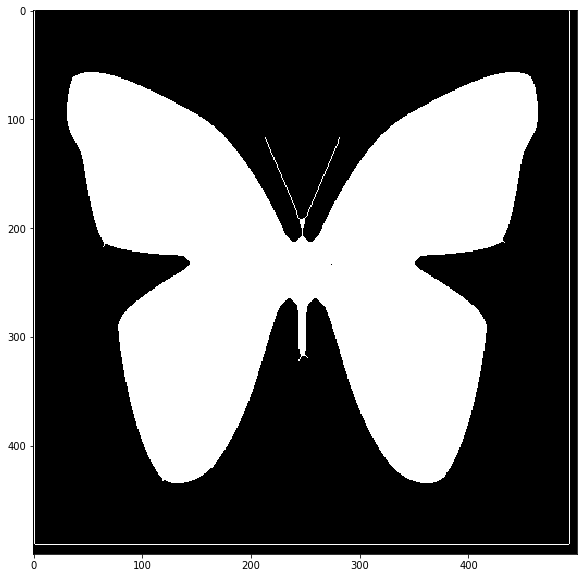

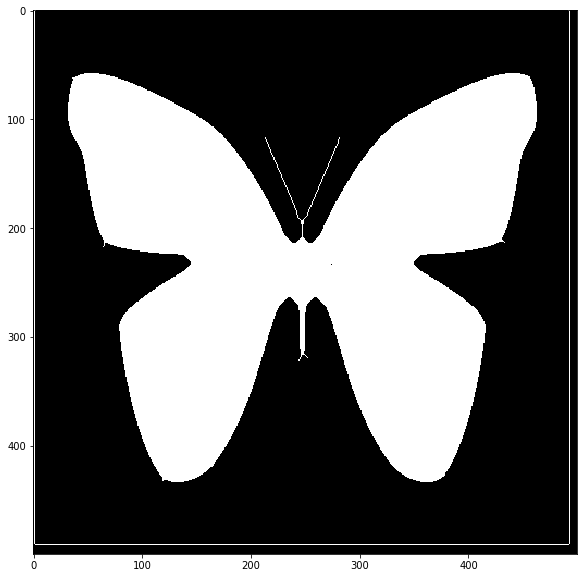

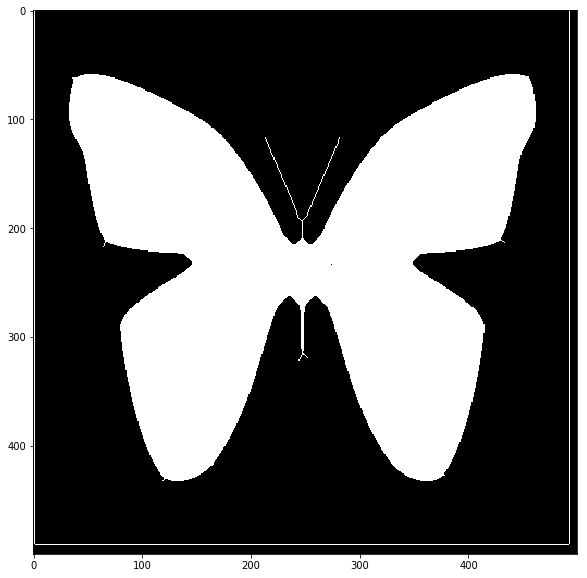

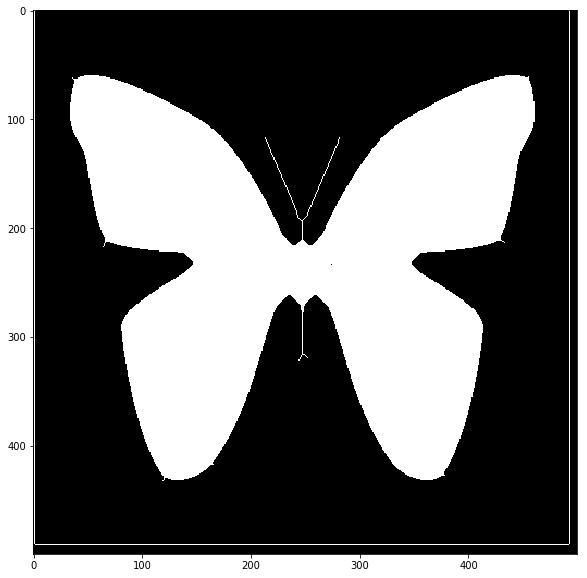

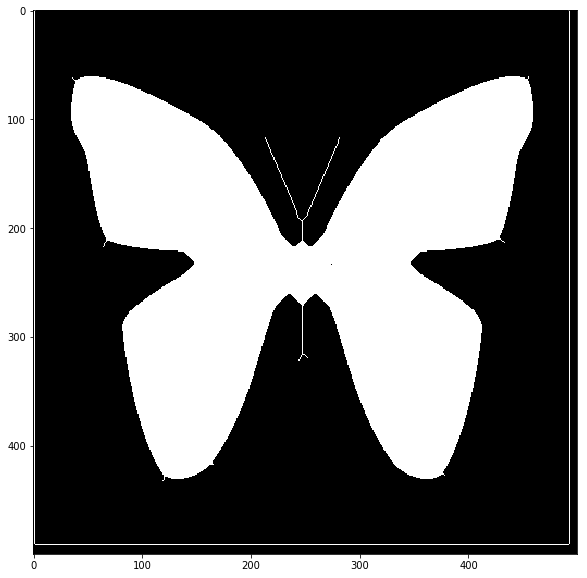

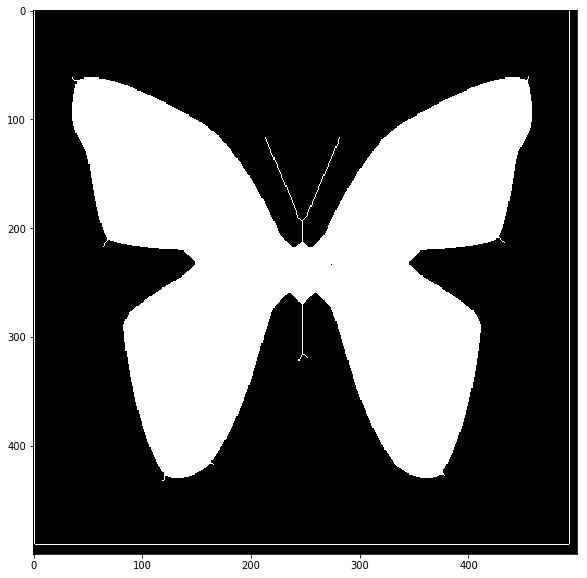

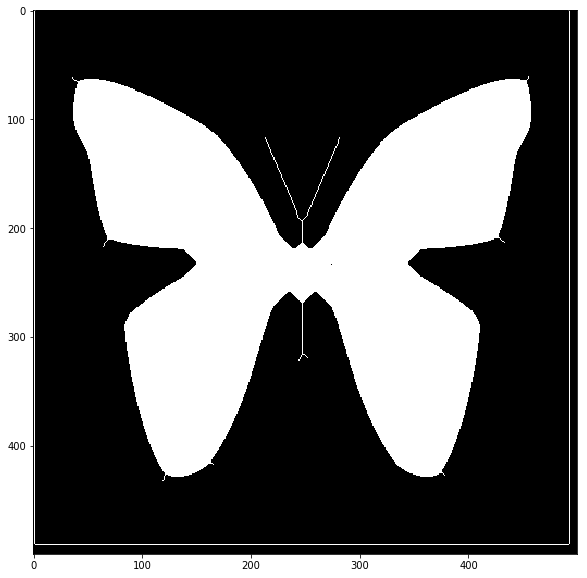

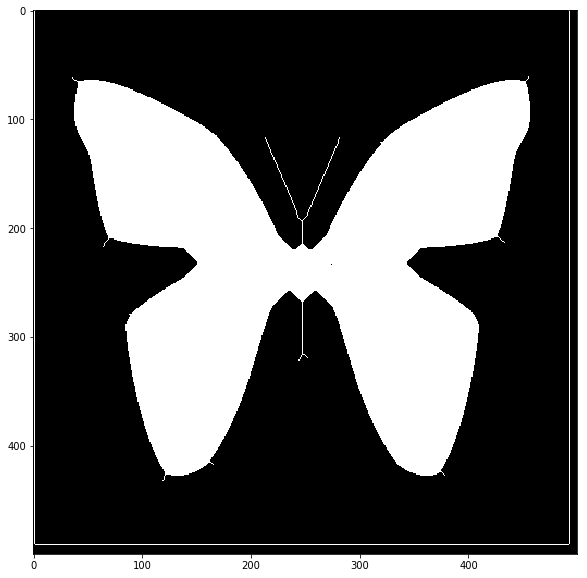

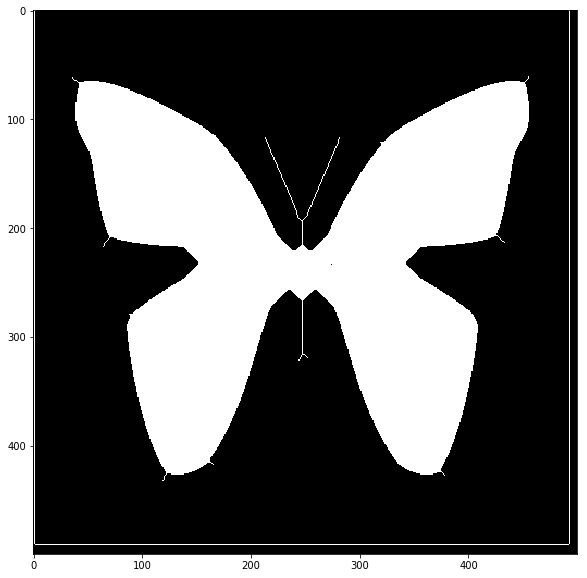

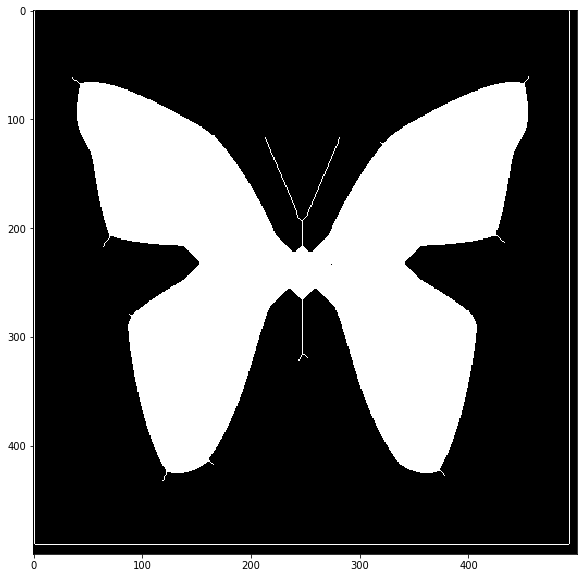

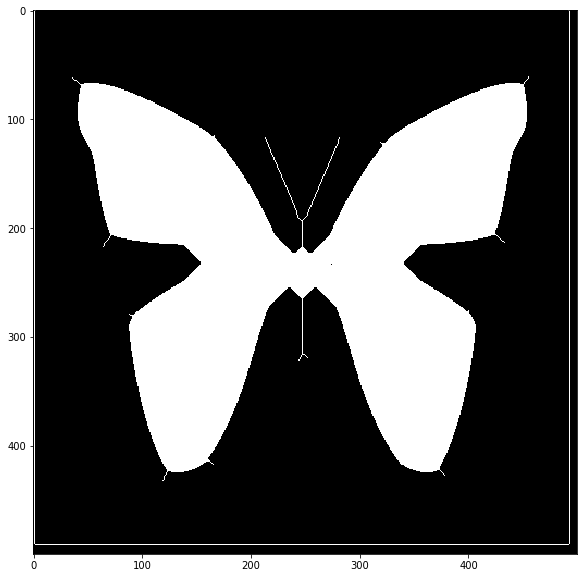

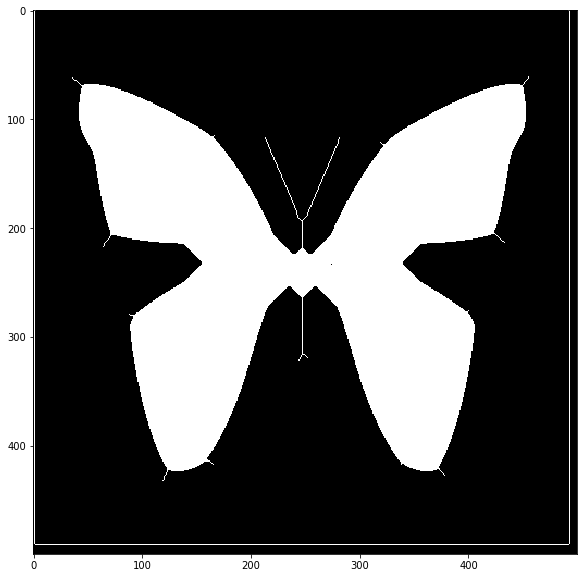

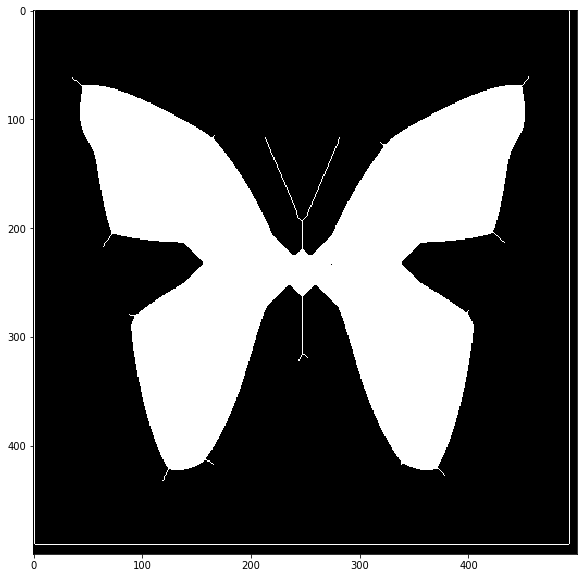

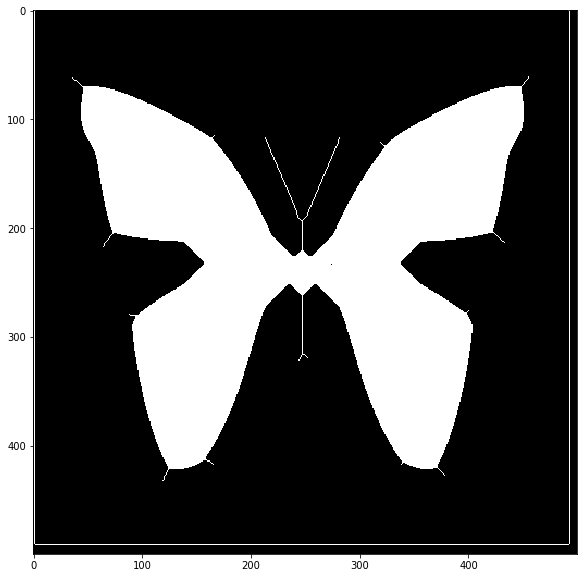

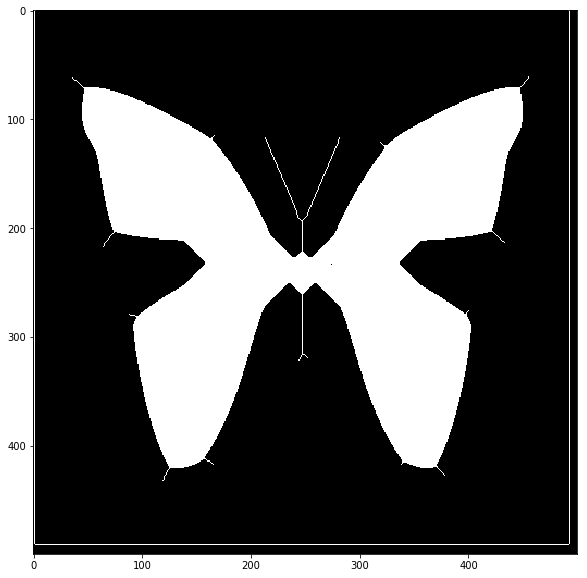

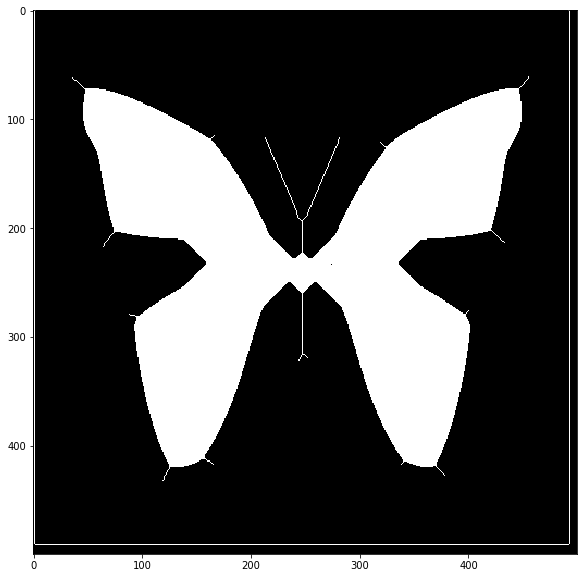

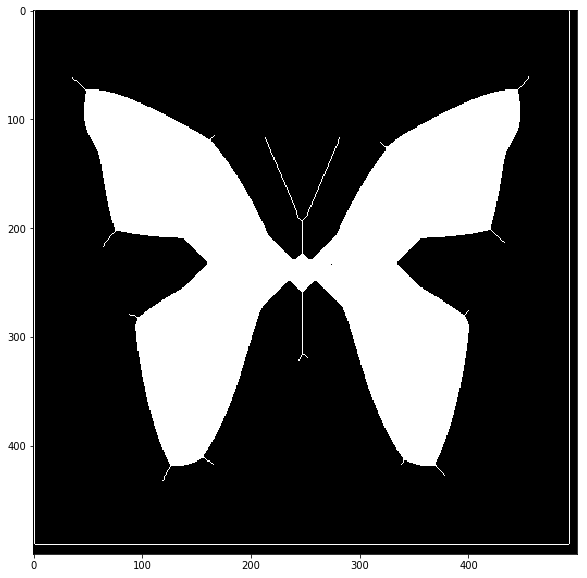

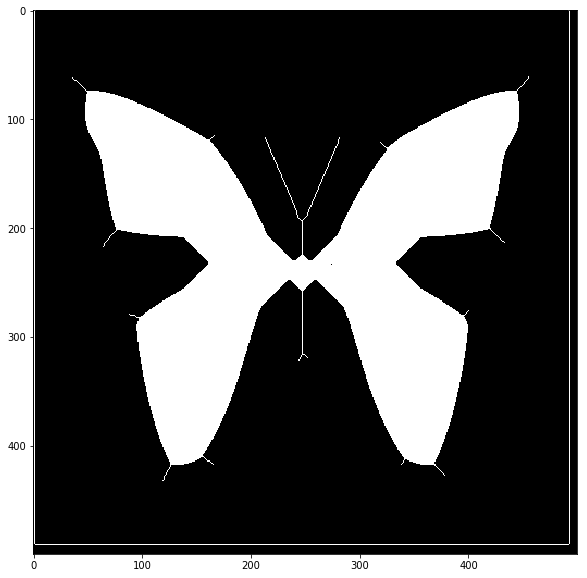

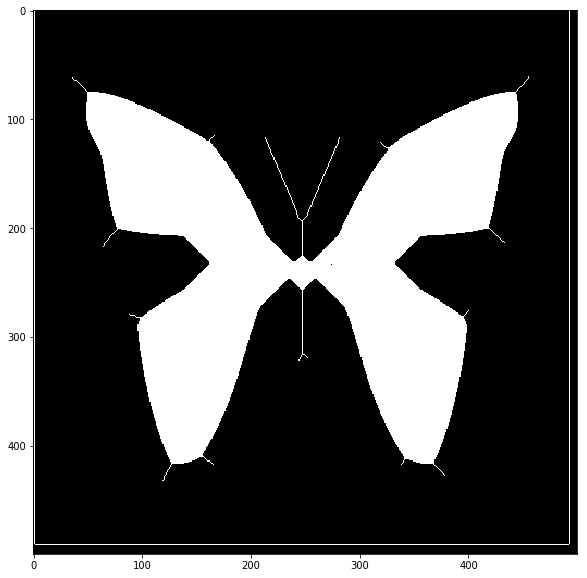

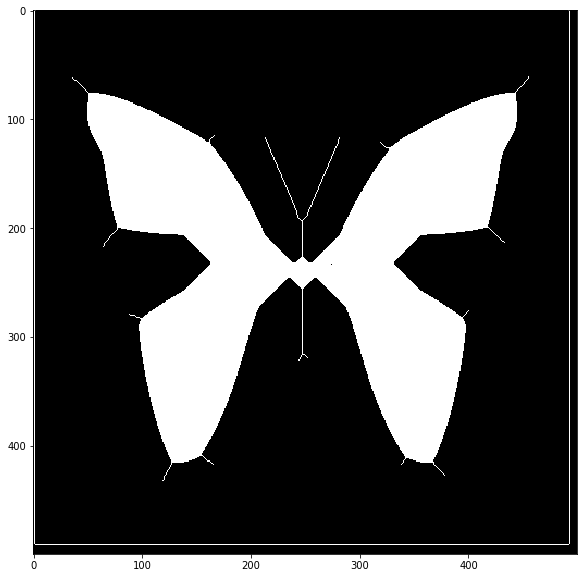

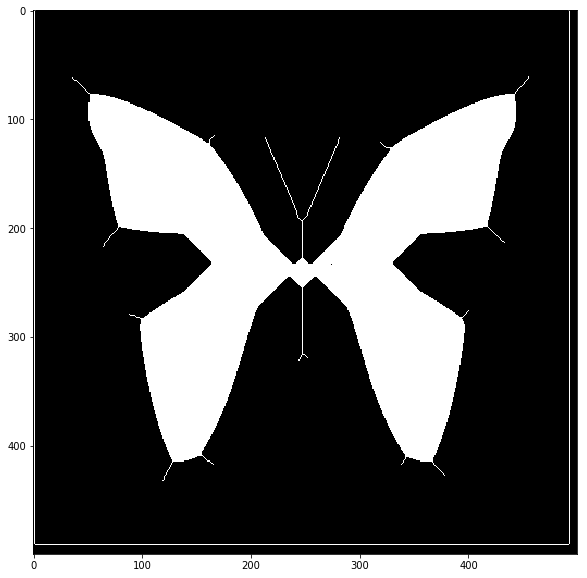

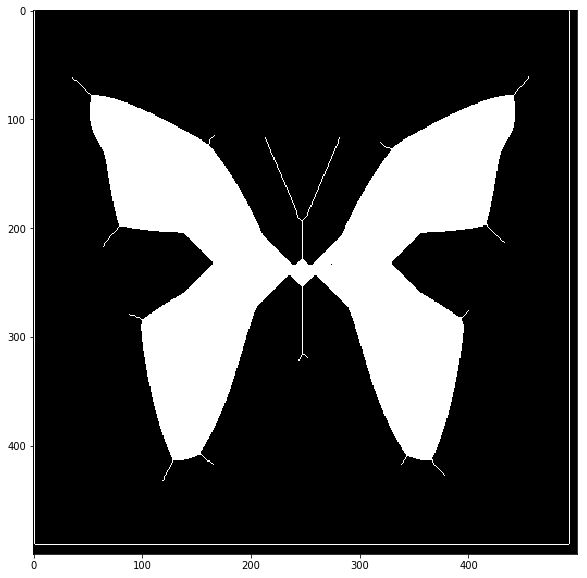

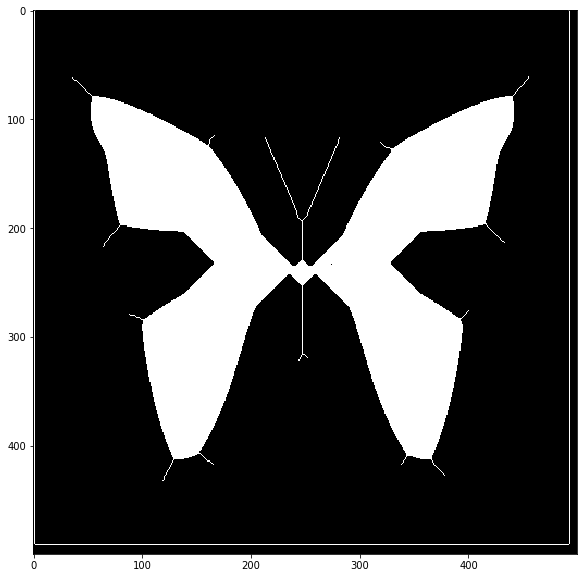

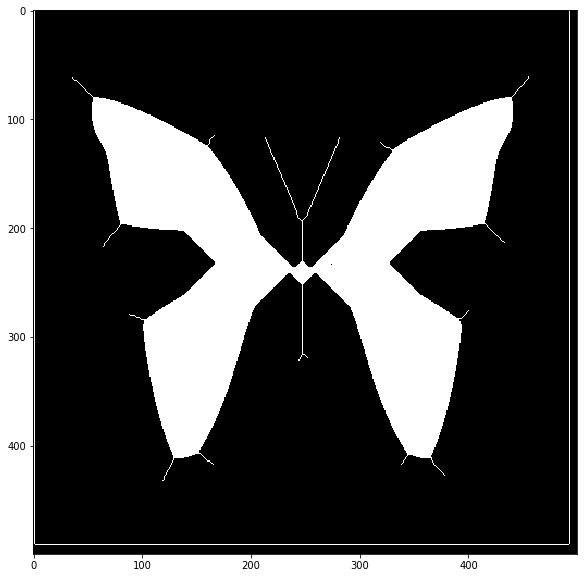

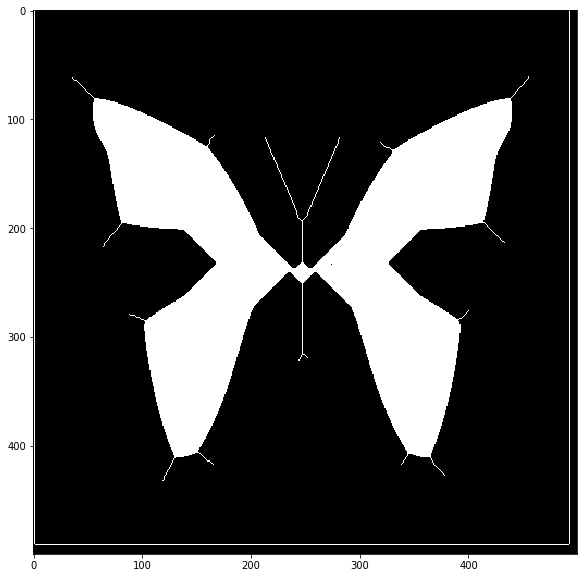

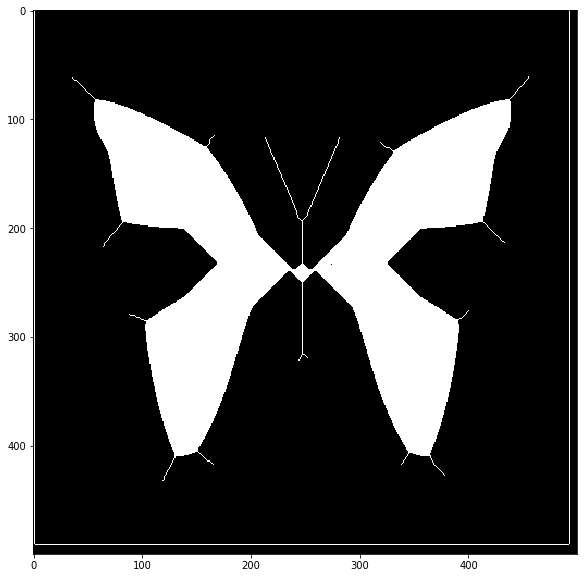

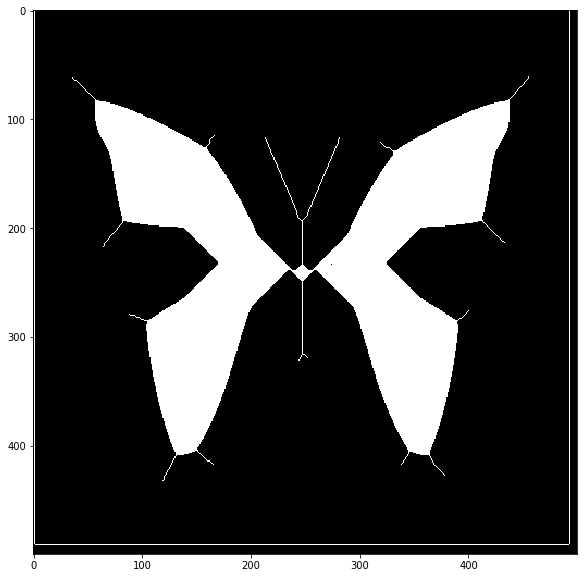

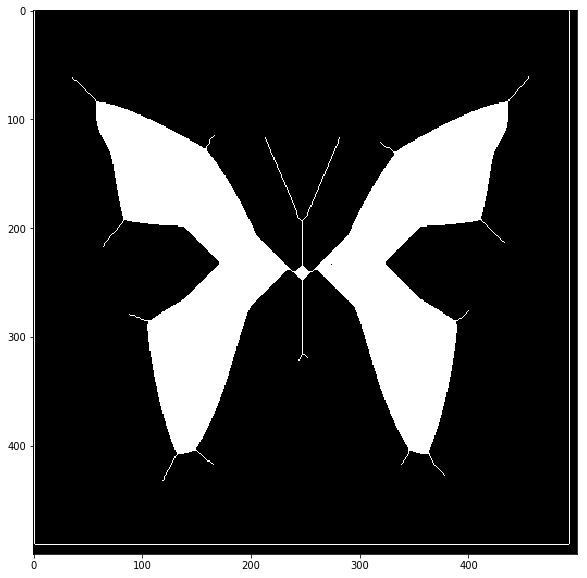

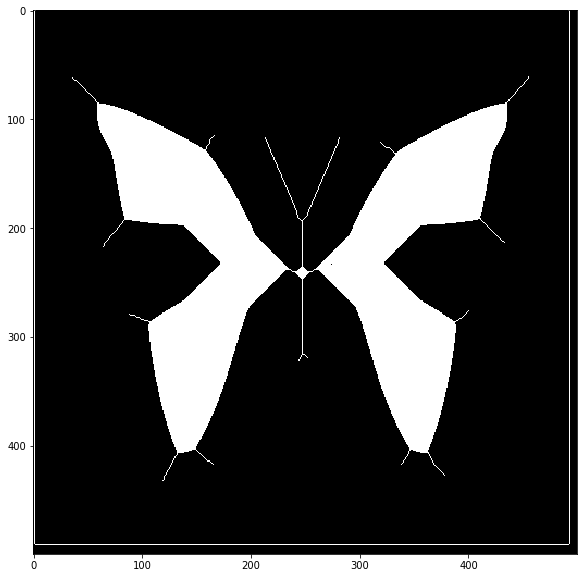

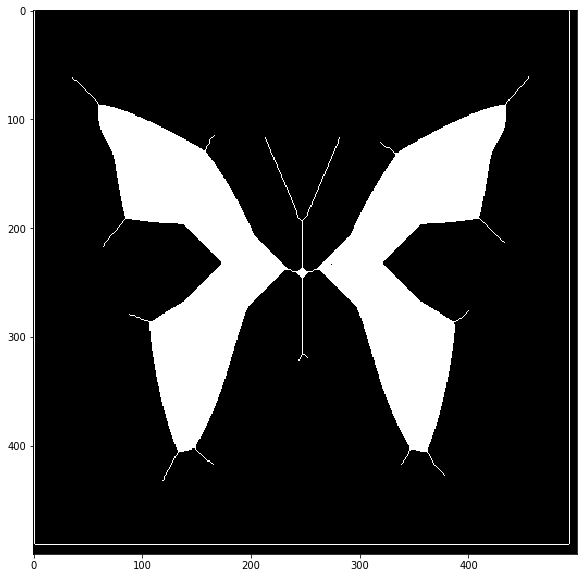

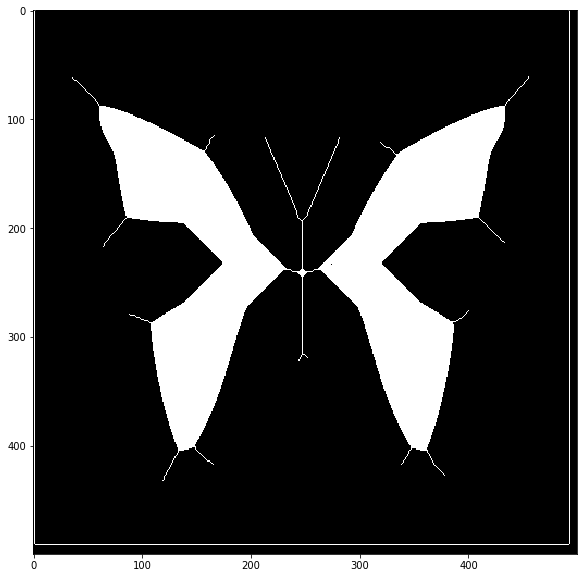

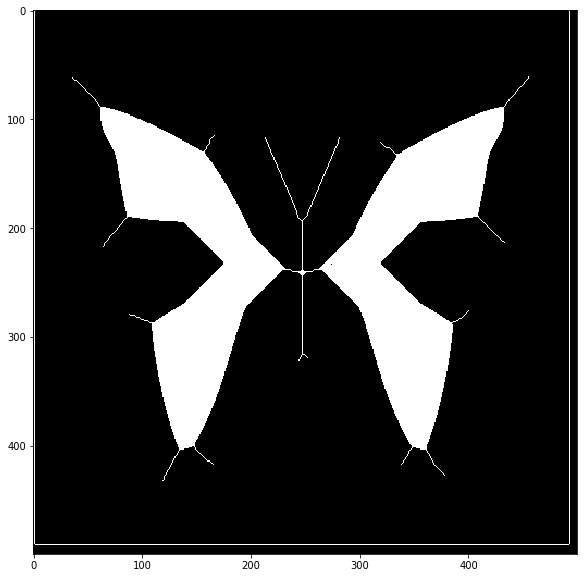

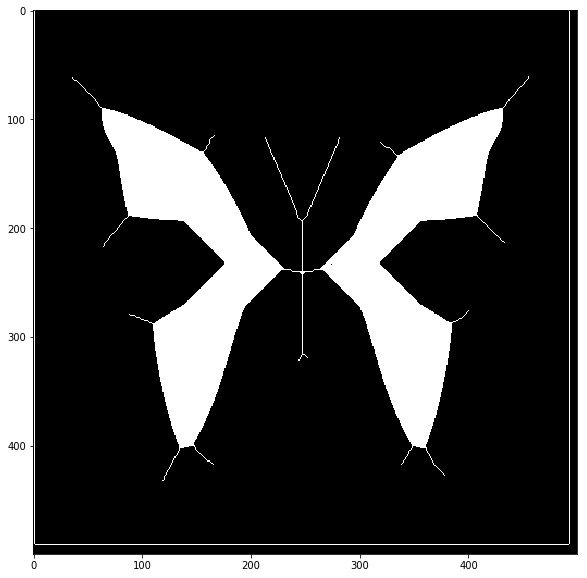

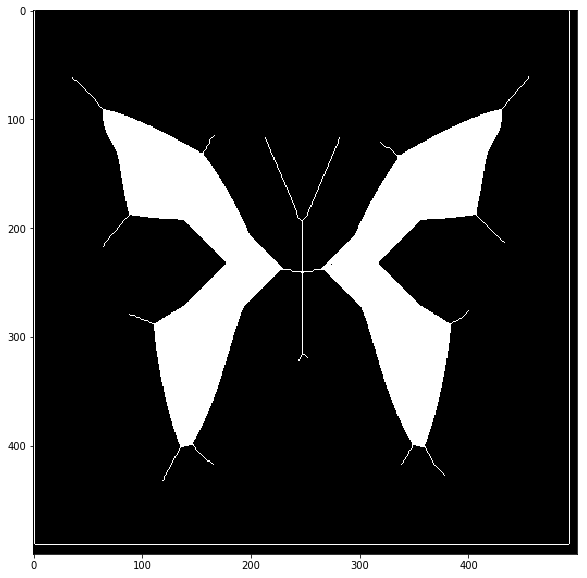

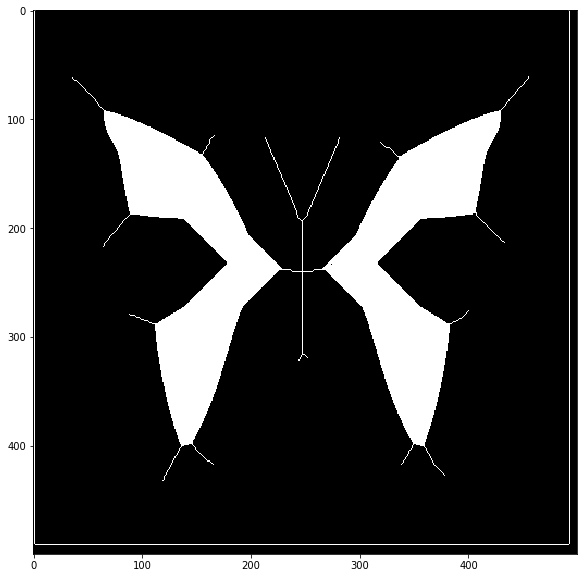

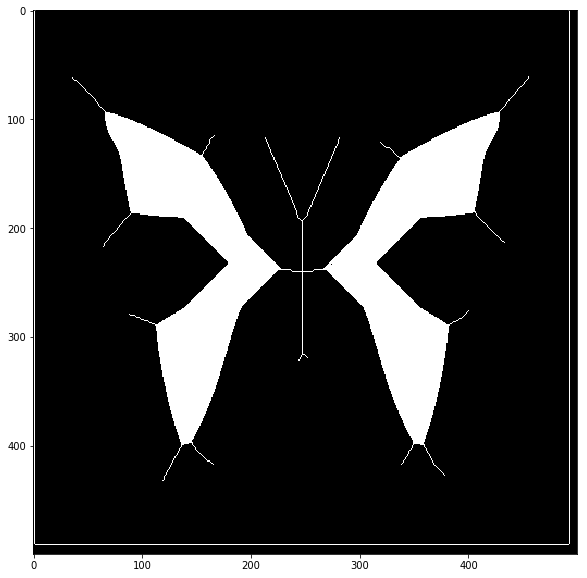

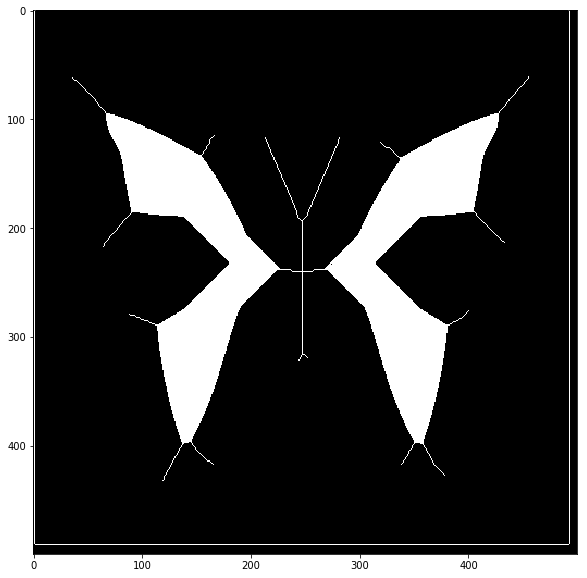

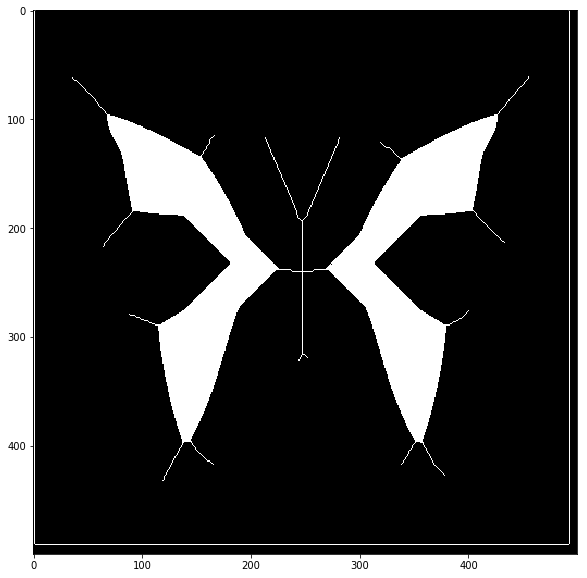

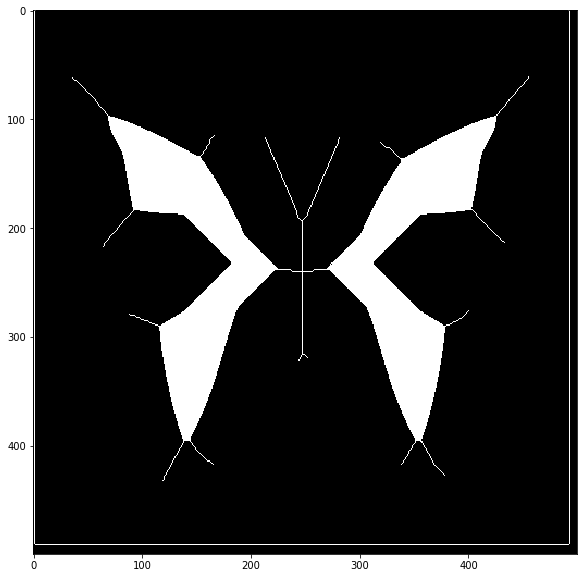

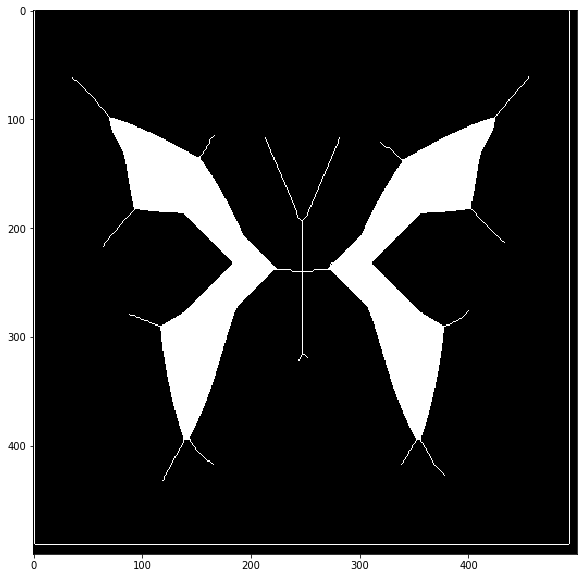

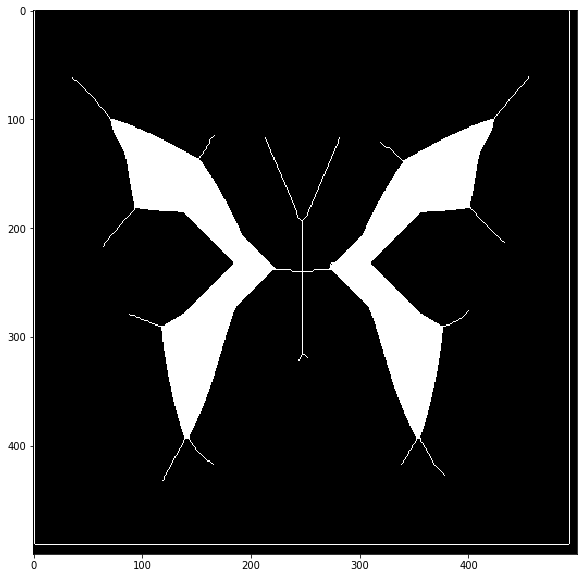

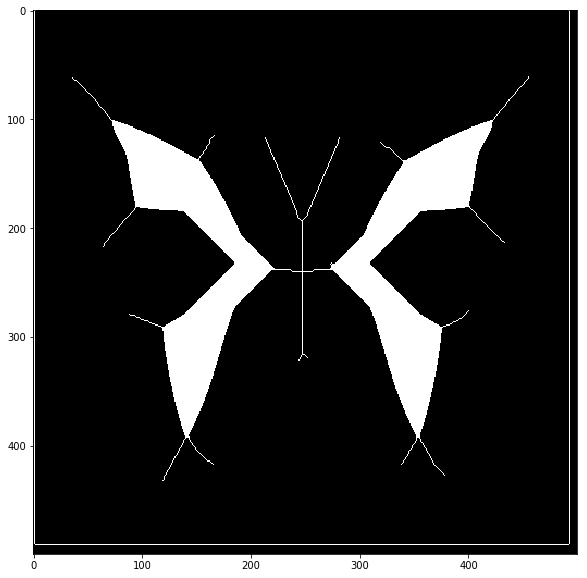

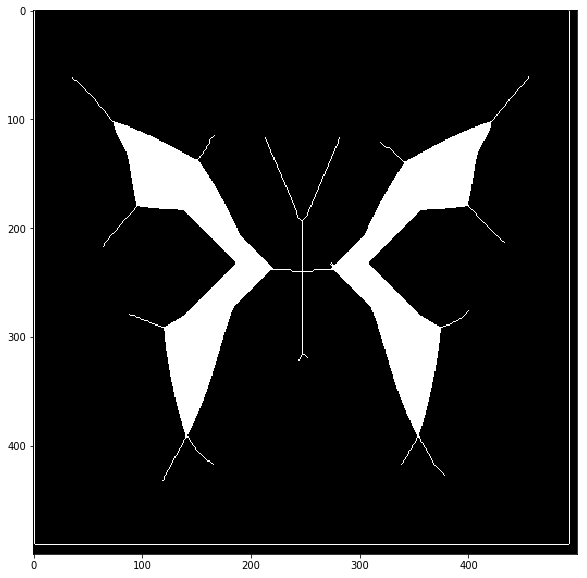

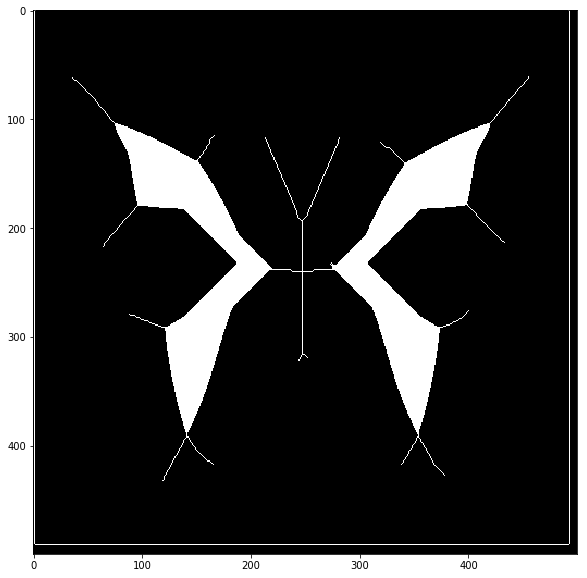

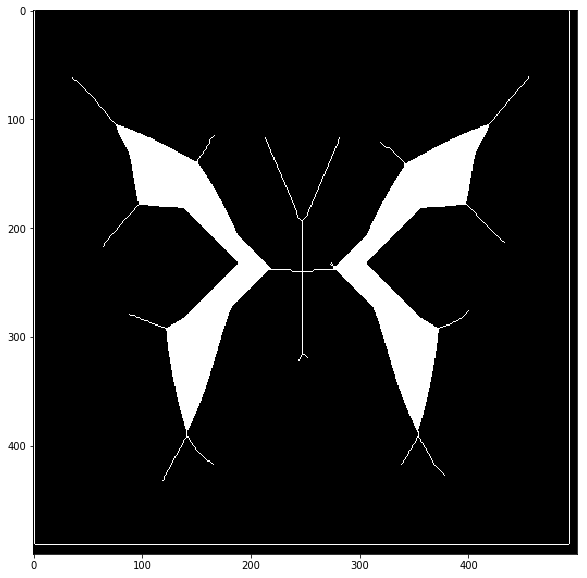

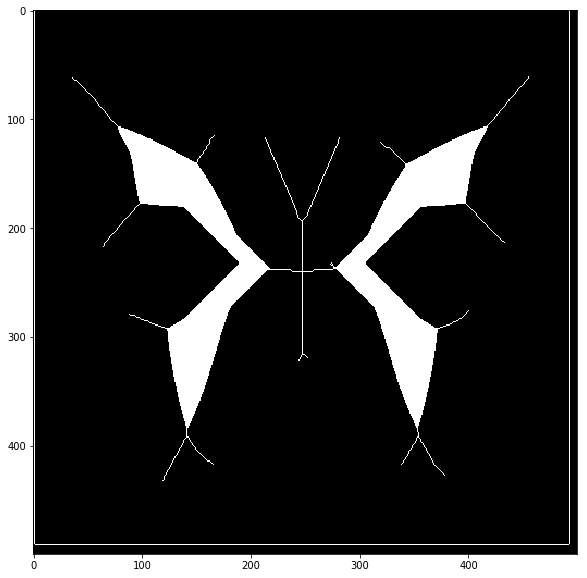

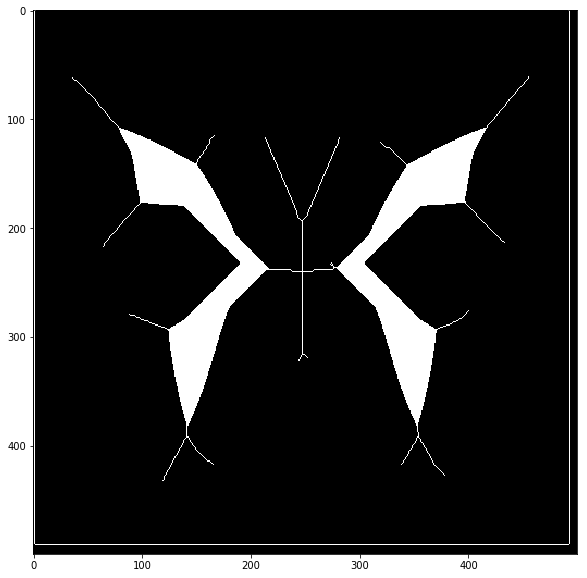

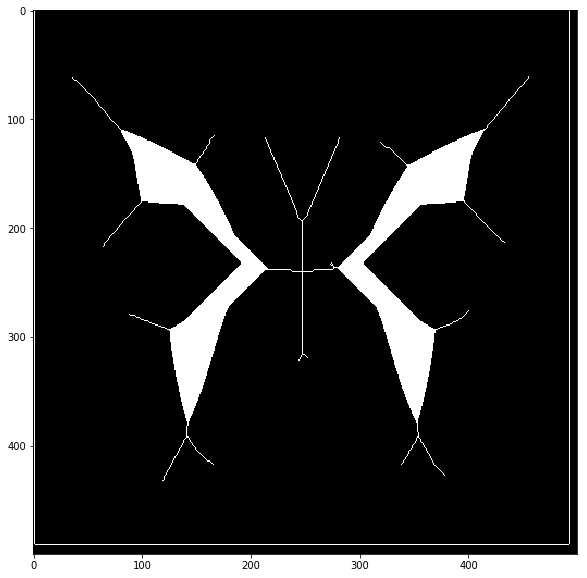

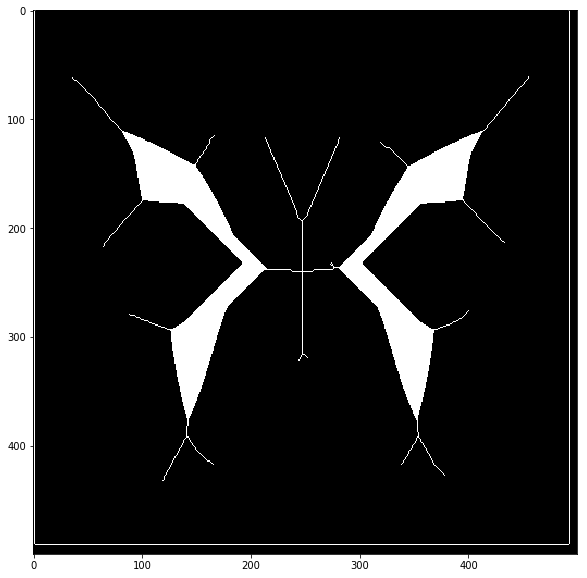

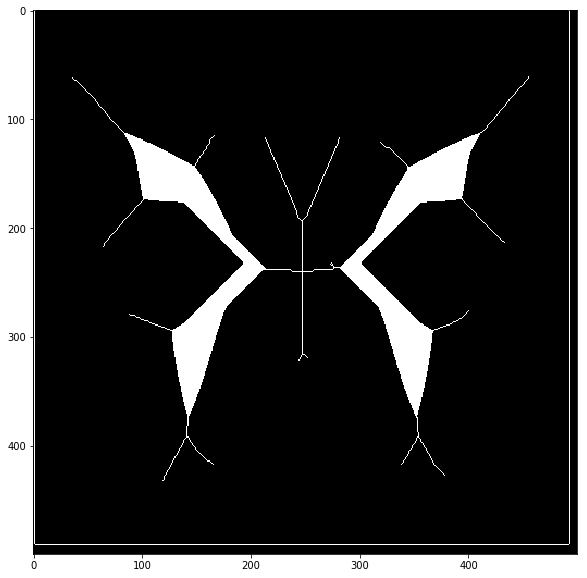

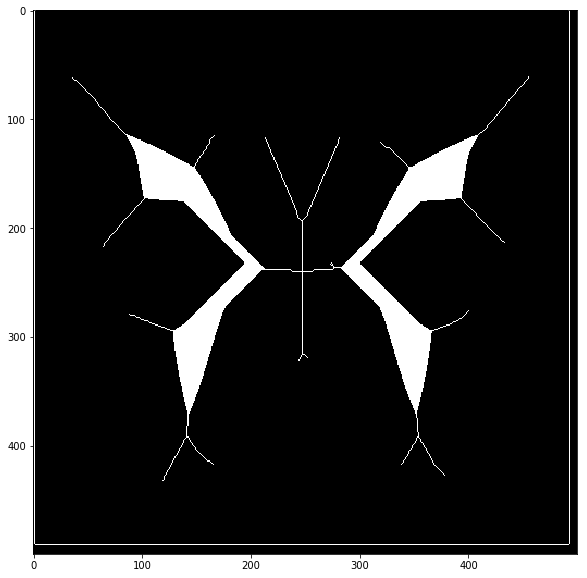

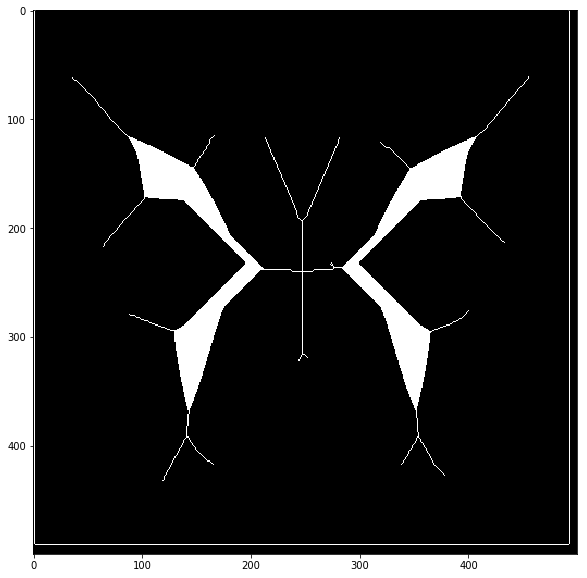

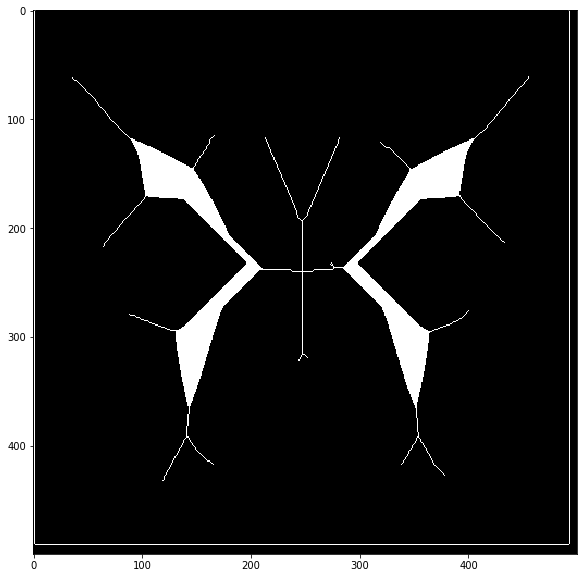

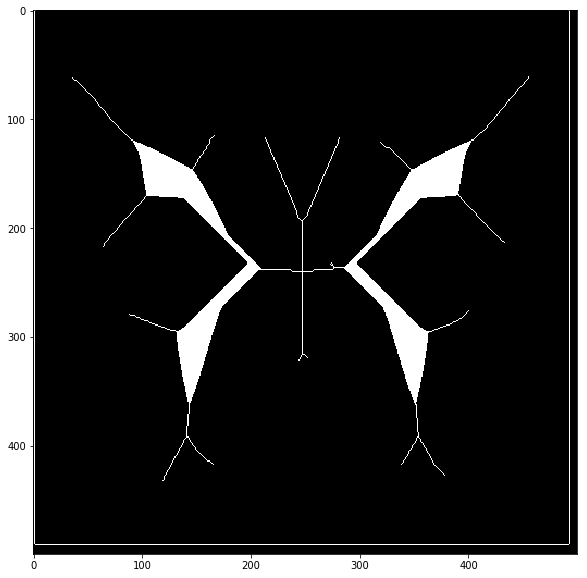

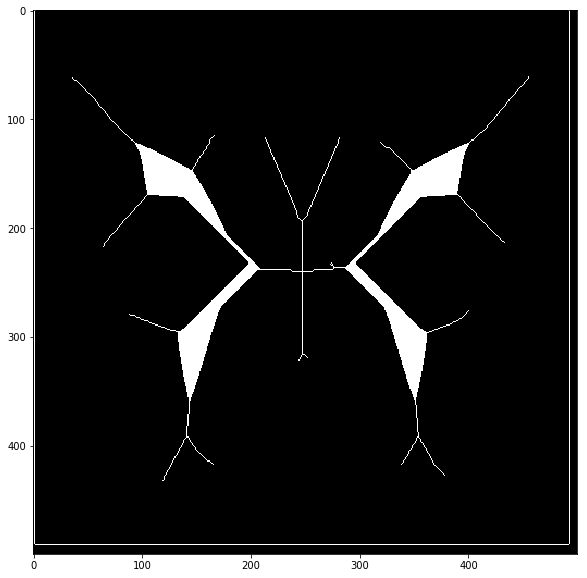

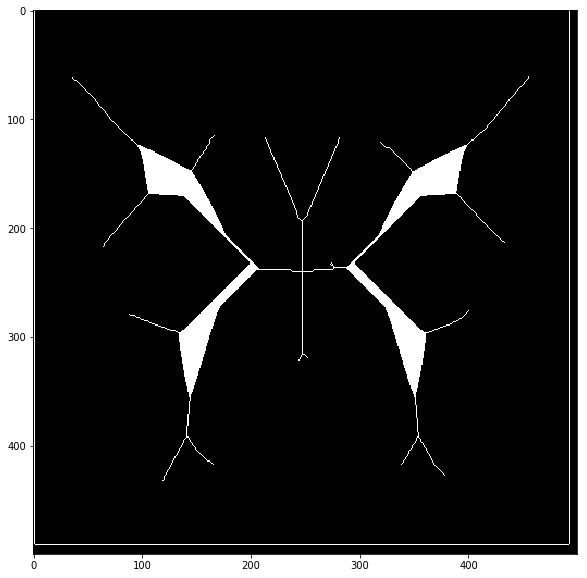

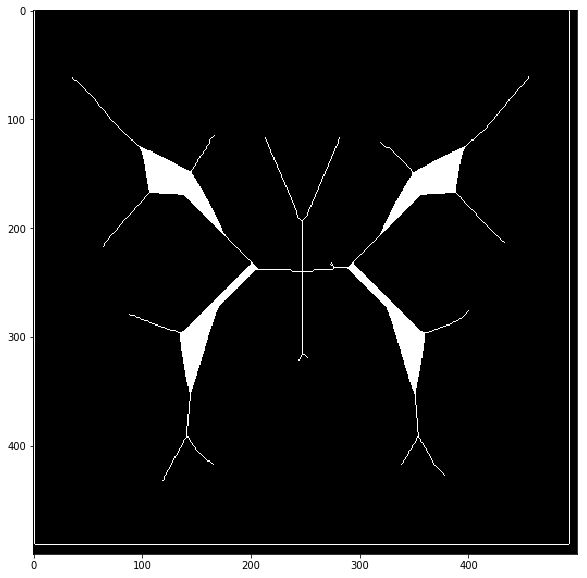

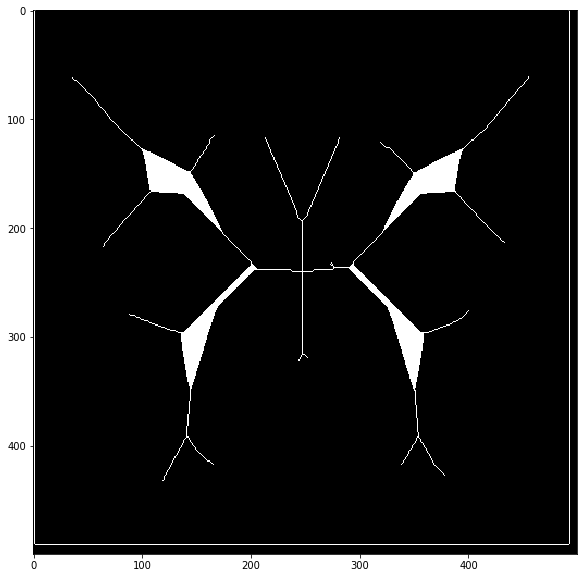

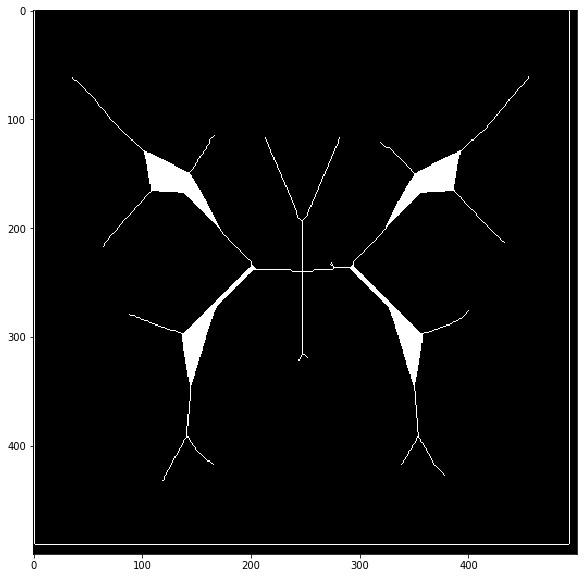

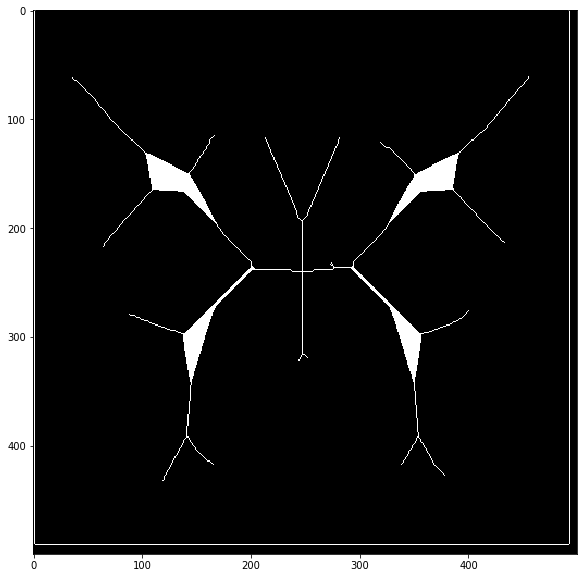

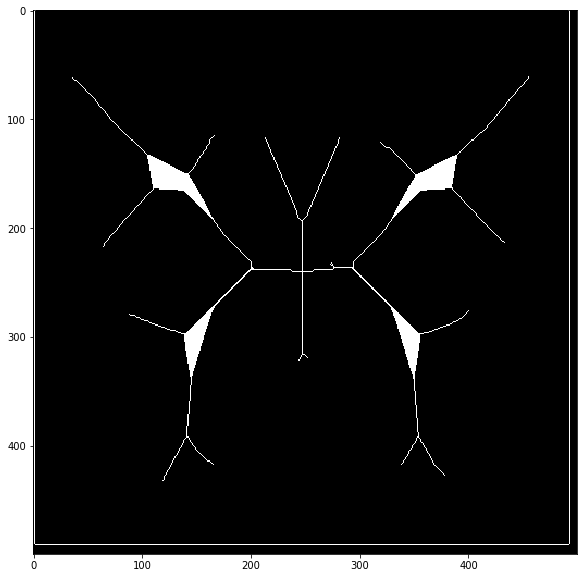

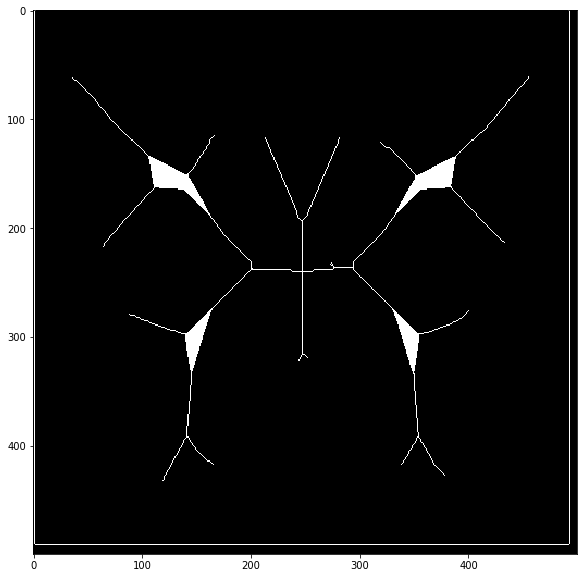

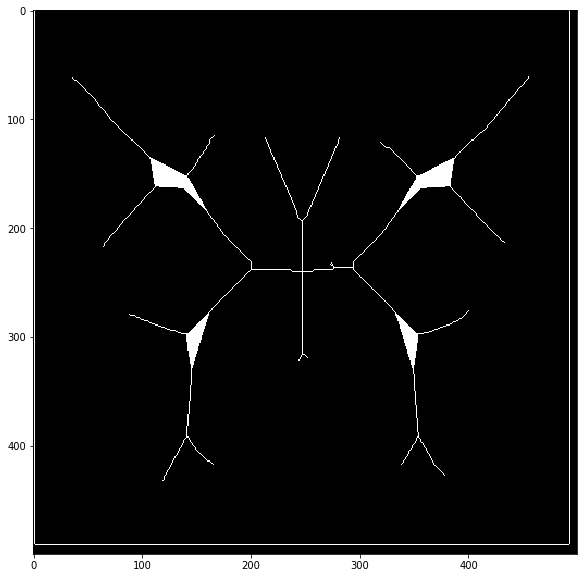

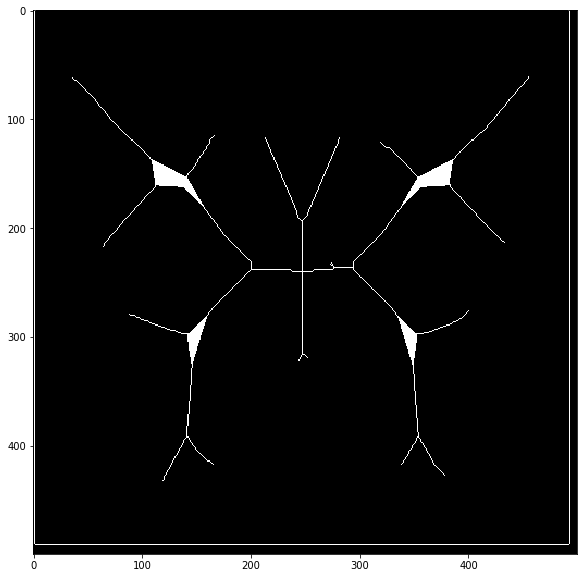

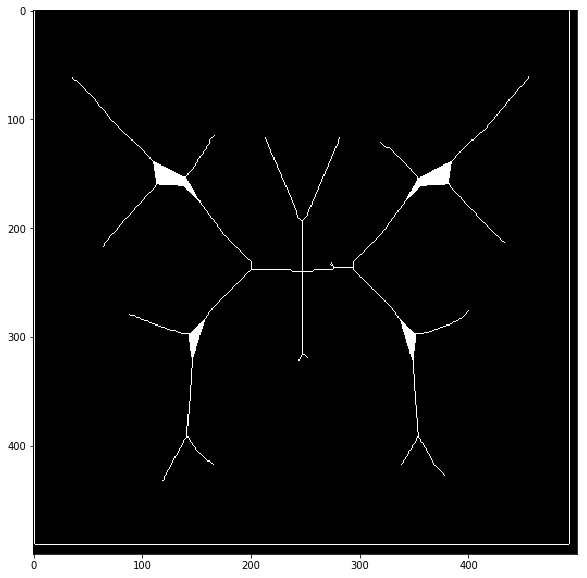

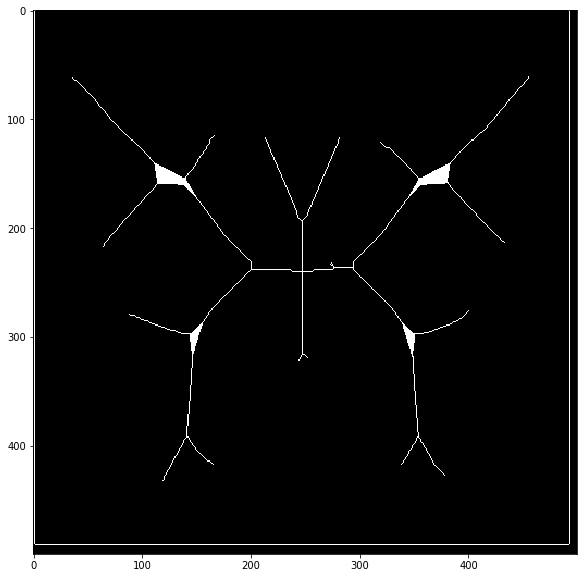

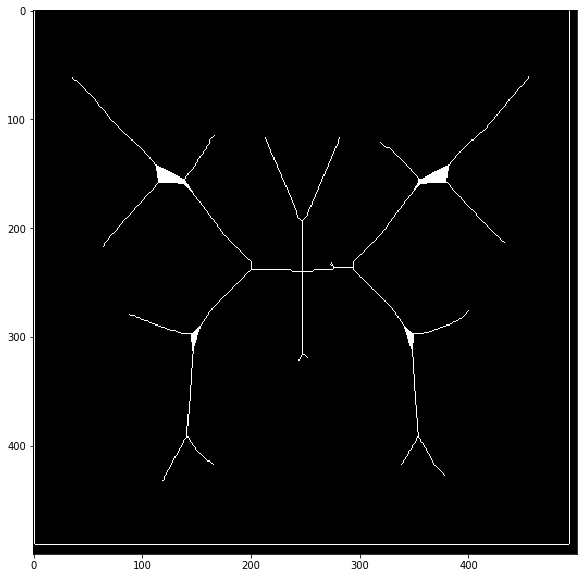

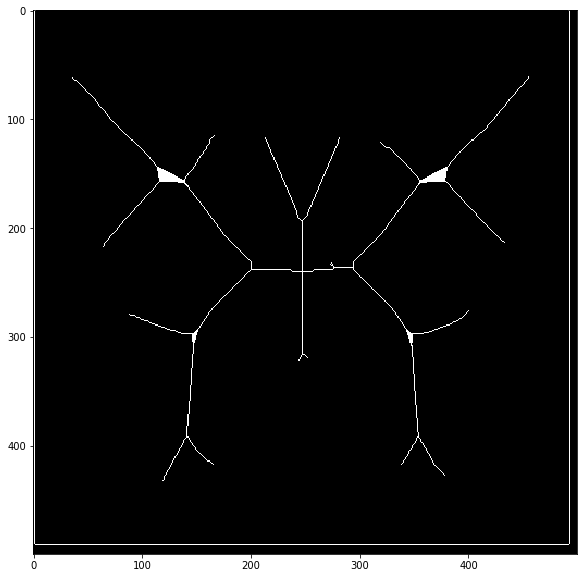

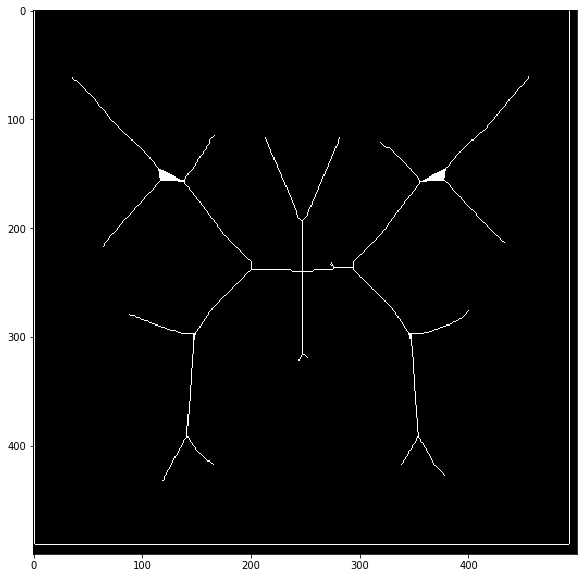

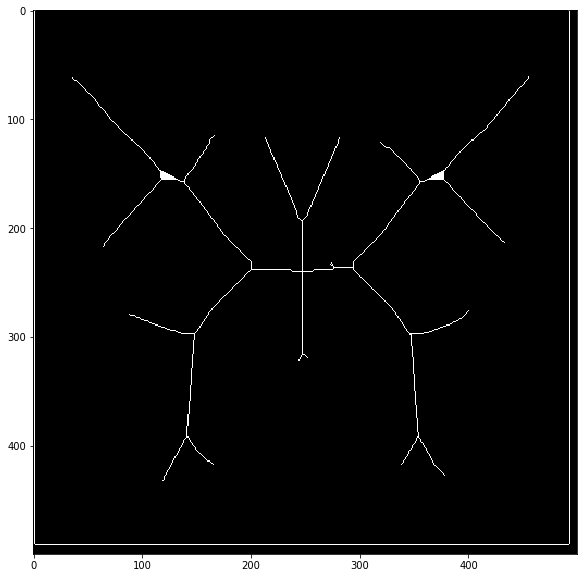

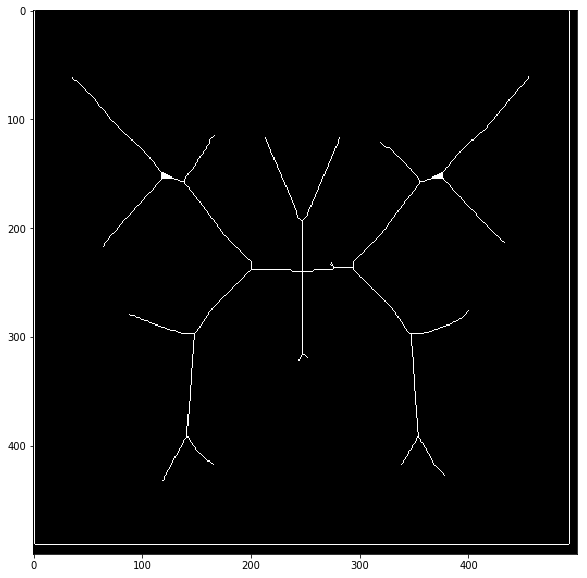

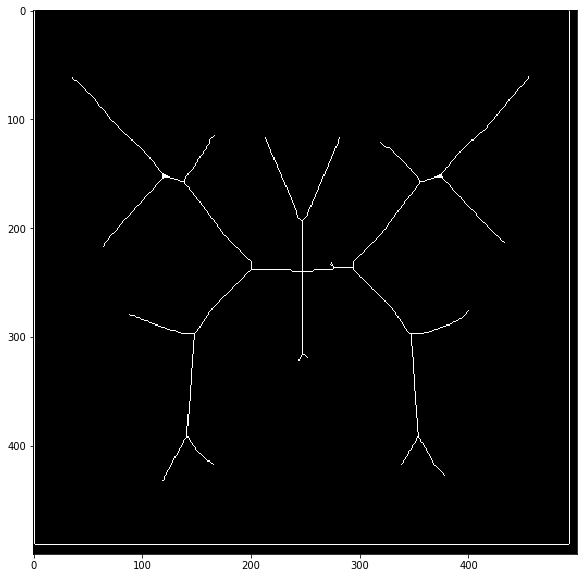

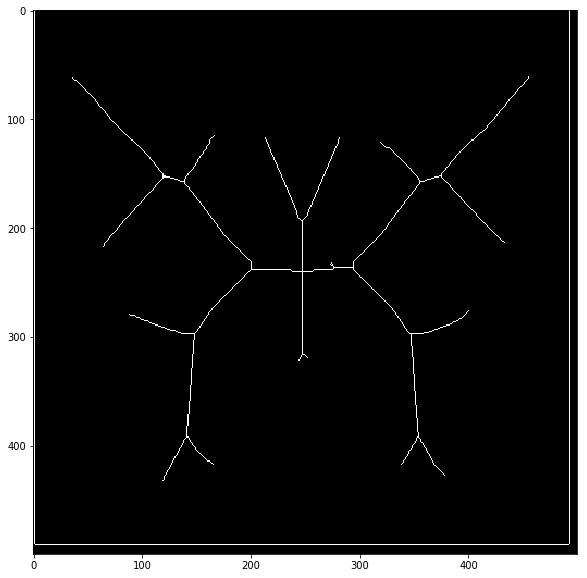

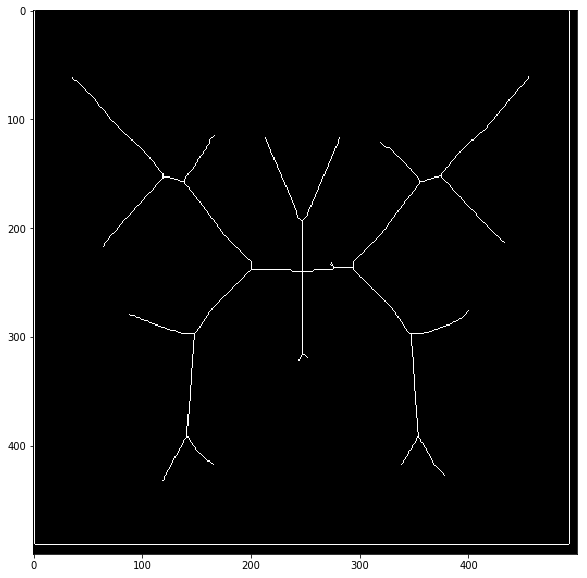

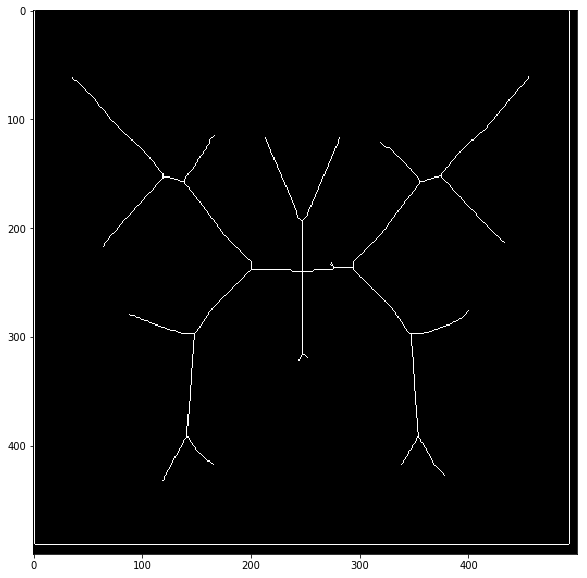

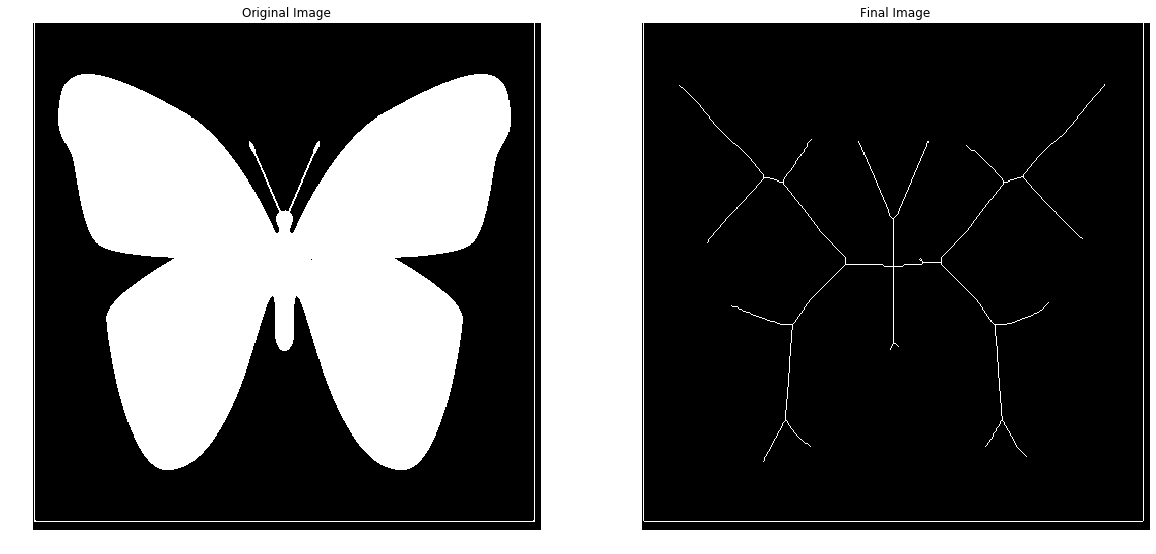

In [9]:
solid = cv2.imread("images/1_4.png",0)
i,ret = cv2.threshold(solid,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret = 255 - ret
ret = np.uint8(ret/255)
out = skeletonize(ret, True)
display(ret, out)

#### Observations :
- The flat edges get removed every time with corners so this will be a figure connecting the vertices of figure.

- For irregular shaped input with a hole, an output connecting the vertices and along the edges is obtained.